# CS 594 / CS 690 - Assignment 03
### September 17, 2018
---

For this assignment, you must work in groups of one or two students. Each person is responsible to write their own code, but the group will (together) discuss their solution.  In this notebook, we provide you with basic functions for completing the assignment.  *Complete the assignment in this notebook.  You will need to modify existing code and write new code to find a solution*.  Each member of the group must upload their own work (i.e., a notebook file) to GitHub.

*Note: Running a cell will not rerun previous cells.  If you edit code in previous cells, you must rerun those cells.  We recommend using* `Run All` *to avoid any errors results from not rerunning previous cells.  You can find this in the menu above:* `Cell -> Run All`

### Data Pre-Processing:
Below is code to process a unicode text file into a string of only upper-case A-Z characters.  We use this code to read the text file (i.e., "The Count of Monte Cristo") and prepare the text for the following three problems.  The output string, which you should use for solving the assignment problems, is named `text_upper`.

In [17]:
# Import regular expressions library
import re

# Read the text file
with open('book_CountOfMonteCristo.txt', 'r') as f:
    text_lines = f.readlines()

# Concatenate the list of strings into a single string
text_all = ''.join(text_lines)

# Remove all non-alphabet characters with a regular expression
text_alpha = re.sub(r'[^a-zA-Z]', ' ', text_all)

# Convert characters to upper-case
text_upper = text_alpha.upper()

# Uncomment the following line if you would like to see the first 100 characters
print(text_upper[:100])

PROJECT GUTENBERG S THE COUNT OF MONTE CRISTO  BY ALEXANDRE DUMAS  P RE  THIS EBOOK IS FOR THE USE O


### Problem 1:
Analyze the text for word length frequency. We might expect short words to be more common than long words. But, are words of length 2 more common than words or length 3? Are words of length 3 more common that words of length 4? **Use the text you parsed in the previous cell to count the frequency of each word length in the text**.  *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [18]:
import operator

# Convert the string of text into a list of words and remove empty words
# HINT: ref [1]
words = [w for w in text_upper.split(' ') if w is not '']

# Uncomment the following line to see the first 100 words
#print(words[:100])

# Define dictionary to store count of word lengths
# HINT: ref [2]
word_count_list = []
for w in words:
    word_count_list.append(len(w))
    
word_len_dict = {}
for w in word_count_list:    
    if w in word_len_dict:
        word_len_dict[w] += 1
    else:
        word_len_dict[w] = 1

# Convert list of words to list of word lengths

# Count the words of each length and store in the dictionary
# HINT: ref [3]


# Sort word length by most common into a list of (word length, count) tuples
# HINT: ref [4,5,6]
word_len_dict_sorted = sorted(word_len_dict.items(), key=operator.itemgetter(1), reverse = True)
print("Word Length : Count")
for i in range (6):
    print(str(word_len_dict_sorted[i][0]) + "\t    : " + str(word_len_dict_sorted[i][1])) #accessing the tuples


# Print the 6 most common word lengths
# HINT: ref [7]


Word Length : Count
3	    : 109798
2	    : 84021
4	    : 81777
5	    : 49101
6	    : 39015
7	    : 30701


#### Expected Output:
```
Word Length : Count
3           : 109798
2           :  84021
4           :  81777
5           :  49101
6           :  39015
7           :  30701
```

**References:**
- [1: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [2: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [3: for loops](https://docs.python.org/3/reference/compound_stmts.html#for)
- [4: sorted](https://docs.python.org/3/library/functions.html#sorted)
- [5: dict.items](https://docs.python.org/3.6/library/stdtypes.html#dict.items)
- [6: lambda expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)
- [7: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 2:
Analyze the text for letter frequency. If you have taken a crypto course and/or have seen substitution ciphers then you are probably aware that ’e’ is the most common letter used in the English language.  **Use the text you parsed above to count the frequency of each letter in the text**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [19]:
# Import string library to help us make a dictionary for this solution
import string

# Concatenate the list of words into a string of characters
# HINT: ref [1]
upper_text_concat = text_upper.replace(" ", "")


# Define a dictionary for counting letter frequency
# HINT: ref [2,3]
char_count_dict = {c:0 for c in string.ascii_uppercase}

for i in range(len(upper_text_concat)):
    char_count_dict[upper_text_concat[i]] += 1

# Count the letters and store in the dictionary

    
# Sort letters by most common into a list of (letter, count) tuples
char_count_dict_sorted = sorted(char_count_dict.items(), key=operator.itemgetter(1), reverse = True)
print("Character : Count")
for i in range (6):
    print(str(char_count_dict_sorted[i][0]) + "\t  : " + str(char_count_dict_sorted[i][1])) #accessing the tuples


# Print the 6 most common characters
# HINT: ref [4]


Character : Count
E	  : 258693
T	  : 180211
A	  : 165306
O	  : 156817
I	  : 142095
N	  : 137343


#### Expected Output:
```
Character : Count
E         : 258693
T         : 180211
A         : 165306
O         : 156817
I         : 142095
N         : 137343
```

**References:**
- [1: str.join](https://docs.python.org/3/library/stdtypes.html#str.join)
- [2: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [3: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [4: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 3:
If we really wanted to crack a substitution cipher (or win on ”Wheel of Fortune”) then we should be aware that, although "e" is the most common letter used in English, it may not be the most common first letter in a word. **Count the positional frequencies of each letter. Specifically, count the number of times each letter appears as the first letter in a word, as the last letter in a word, and as an interior letter in a word (i.e. a letter that is neither first nor last)**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

Below, we define a method which takes in a word (string) and returns a list describing the position of each letter (character).  Each item in the list has the format `(letter, position)`.  The position can have the following values: `0: first letter, 1: interior letter, 2: last letter`

In [20]:
# Define a method to return position of each character in a word
def lettersPosition(word):
    if len(word) == 1:
        # Base case for words of length 1
        return [(word, 0)]
    else:
        # Get first and last letters
        first, last = word[0], word[-1]
        pos_list = [(first, 0), (last, 2)]

        # Get interior letters
        interior = word[1:-1]
        
        for char in interior:
            pos_list.append((char, 1))

    return pos_list





We can call this method for each word in our list of words and sum the values to obtain letter position frequencies.

In [21]:
# Define a dictionary for counting letter position frequency
char_pos_dict = {c:[0,0,0] for c in string.ascii_uppercase}

words = text_upper.split()
for w in words:
    pos_list = lettersPosition(w)
    
    for i in range(len(pos_list)):
        char_pos_dict[pos_list[i][0]][pos_list[i][1]] += 1
        
   
   
        
        
# Apply our letter location method to each word and sum values in our dictionary

        
# Print the position frequency of the first 6 letters in the alphabet
print("Character : First | Interior |  Last")
i = 0
for k, v in char_pos_dict.items():
    if i < 6:
        
        print('{} \t  : {:>5} | {:>8} | {:>5}'.format(k , v [0], v[1], v[2]))
    else:
        break;
    i+=1

ROJEC
UTENBER
H
OUN

ONT
RIST

LEXANDR
UMA

HI
BOO

O
H
S

NYON
NYWHER


OS
N
IT
LMOS

ESTRICTION
HATSOEVE
O
A
OP

IV

WA


S

NDE
H
ERM

H
ROJEC
UTENBER
ICENS
NCLUDE
IT
HI
BOO

NLIN

W
UTENBER
R
ITL
H
OUN

ONT
RIST
UTHO
LEXANDR
UMA

ELEAS
AT
OVEMBE
BOO
AS
PDATE
UN
ANGUAG
NGLIS
HARACTE
E
NCODIN
T
TAR

HI
ROJEC
UTENBER
BOO
H
OUN

ONT
RIST
RODUCE

NONYMOU
ROJEC
UTENBER
OLUNTEER
A
ULLE
N
AVI
IDGE
H
OUN

ONT
RIST

LEXANDR
UMA

ONTENT
OLUM
N
HAPTE
ARSEILLE
H
RRIVA
HAPTE
ATHE
N
O
HAPTE
H
ATALAN
HAPTE
ONSPIRAC
HAPTE
H
ARRIAG
EAS
HAPTE
H
EPUT
ROCUREU

O
HAPTE
H
XAMINATIO
HAPTE
H

EA

HAPTE
H
VENIN

H
ETROTHA
HAPTE
H
IN
LOSE

H
UILERIE
HAPTE
H
ORSICA
GR
HAPTE
ATHE
N
O
HAPTE
H
UNDRE
AY
HAPTE
H
W
RISONER
HAPTE
UMBE
N
UMBE
HAPTE
EARNE
TALIA
HAPTE
H
B
HAMBE
HAPTE
H
REASUR
HAPTE
H
HIR
TTAC
HAPTE
H
EMETER

H

EA

HAPTE
H
SLAN

IBOULE
HAPTE
H
MUGGLER
HAPTE
H
SLAN

ONT
RIST
HAPTE
H
ECRE
AV
HAPTE
H
NKNOW
HAPTE
H
ON

AR
N
HAPTE
H
TOR
OLUM
W
HAPTE
H
RISO
EGISTE
HAPTE
H
OUS

ORRE
O
HAPTE
H
IFT

EPTEMBE
HAP



A
NABL

RIT
I
U
HA
EMIND

HA
US
S
OU
EAV

BSENC
O
OM
AY

E
ARRIE
E
IRS
N
HE



ARI
ER
OO
AV
HA
IM
O
EQUIR
AN

IL
AK
UIT
I
EEK

NLOA
H
ARG
N

ANNO
E
O
EAD
O
E
NTI
HRE
ONTH
FTE
HA
NL

AC
GAI

HRE
ONTH
O
H
HARAO
DDE
H
WNE
ATTIN
H
OUN
AILO

H
AC
ANNO
AI
ITHOU
E
APTAI
ITHOU
E
APTAI
RIE
AN
I
YE
PARKLIN
IT
NIMATIO
RA
IN
HA
O
A
O
O
R
OUCHIN

H
OS
ECRE
ISHE


EAR


EALL
OU
NTENTIO

AK

APTAI

H
HARAO

ER
OL
WNE

HAK
AND


O

EA
AN
N
AL

ETTLE
U
AV
ARTNE
N
O
NO
H
TALIA
ROVER
H

OMPAGN

ADRON

H
A
ARTNE
A
ASTE
U
H
HIN


EAS
AL
ON

O
AV
N
U

W
OTE
EL



ROCUR
O
H
THE
IL


ES

ORRE
XCLAIME
H
OUN
EAMA
IT
EAR

I
YE
N
RASPIN
H
WNE
AN
ORRE
HAN
O

H
AM


ATHE
N

ER
HA
L
IGH
DMON
HER
ROVIDENC
HA
ATCHE
VE
H
ESERVIN


OU
ATHE

N
E
ER
N
FTERWARD
OM


HAL
O
O
SHOR

HAN
O
HAL
EMAI
N
OO
VE
H
CCOUNT
IT
ANGLAR
AV
O
EE
ATISFIE
IT
I
HI
OYAG
HA

CCORDIN

H
ENS
O
TTAC

H
UESTIO
I

O
EA


OO
OMRAD

O
HIN

EVE
IKE

INC
H
A
HE
A
ILL
NOUG
FTE
ITTL
UARRE

A

ROPOS

I

TO
O
E
INUTE

H
SLAN

ONT
RIST

ETTL
H
ISPUT
ROPOSI

O
EDDIN
AV
NSWERE
O
UNDRE
IME
ERNAN
N
EALL
O
US

ER
TUPI

S

GAI
EL
EPEA

EPEA

E

O
HA
A

AS
ELIEV

EL

O
H
UNDREDT
IM
HA
O
EFUS

OV
HIC
A
OU
OTHE
ANCTIO
AK

NDERSTAN
NC
O
L
HA
O
R
RIFLIN
IT

APPINES
HA

IF

EAT
R
OTHIN

O


AV
REAME
O
E
EAR

EIN
OU
USBAN
ER
N

OS
HA
OP
HIC
A
H
NL
TA


XISTENC

EAS

A
O
H
VE
NCOURAGE
O

HA
OP
ERNAN
EPLIE
ER
O
ANNO
EPROAC

IT
H
LIGHTES
OQUETR
AV
LWAY
AI

O
OV
O

ROTHE
U

O
S
RO

OR
HA
ISTERL
FFECTIO
O

EAR

NOTHE

O
HI
RU
ERNAN
E
HA

ER
RU
ER
EPLIE
H
OUN
A
E
O
AV
EE
RUELL
RAN
IT

U

O
ORGE
HA


MON
H
ATALAN
ACRE
A

NTERMARR
O
ISTAK
ERNAN


O
A
U
EREL
USTO
N
RA

O

O
IT
HI
USTO

OU
AVO
O
R
NCLUDE

H
ONSCRIPTIO
ERNAN
N
R
NL

IBERT

UFFERANC
IABL

N
OMEN


ALLE
PO

AK

RM
NC
OLDIE
HA
OUL
O

IT

OO
RPHA
ORLOR
ITHOU
ORTUN
IT
OTHIN
U
AL
UINE
U
N
E
AGGE
ET
H
ISERABL
NHERITANC
EF


ATHE


OTHE
N


OTHE


H
A
EE
EA
EA
N
O
NO
ERNAN
AV
UBSISTE
LMOS
NTIREL

UBLI
HARIT
OMETIME
O
RETEN

SEFU

O
N
HA


XCUS

HAR
IT

H
RODUC

OU
ISHIN
N
CCEP

ERNAN
ECAUS
O
R
H
O


ATH

ATTE
ROVIDE
AN

O
APTAI
EFOR
ER
HOUL
I
EPLIE
ERNAN
IT
H
CCENT

NSHAKE
ESOLUTIO
OUL
I
YSEL
HA
HA
AL
OV
AI
ADEROUSS
IT
OIC
OR
IPS
HA
VE
HA
OV

O
NO
HA
OV

OM
AI
ANGLAR
O
PPEA


OO
OR

ELLO
N
AN

HOUL
IK

EL
O
U
E
AI
ADEROUSS
U
O

EA
ELLO
EPLIE
ANGLAR
O
R
HRE
ART
RUN
INIS
H
OTTL
N
O
IL

OMPLETEL

RIN
HE
N

O
EDDL
IT
HA

R
ISCUSSIN
O
HA
EQUIRE
L
N
I
N
OO
UDGMEN
RUN
AI
ADEROUSS
EL
HA
OO
N
OUL
RIN
OU
OR
UC
OTTLE
HE
R

IGGE
HA
OLOGN
LASK

AMPHIL
OR
IN
N
ADEROUSS
ATTLE
I
LAS
PO
H
ABL
O
ER
AYIN
I
AI
ERNAN
WAITIN
IT
REA
NXIET
H
N

HI
NTERRUPTE
EMAR
HA
A
AYIN
ORGE
HI
RUNKE
ADEROUSS
A
AD

OS
H
HREA


ENTENC
RUN

O
IK

UC
H
ORS
O
HOS
H
EA
IN
O


ECAUS
HE
AV
A
HOUGHT
HIC
HE
R
FRAI
H
IQUO
IL
XTRAC
RO
HEI
EART
N
ADEROUSS
EGA

IN
H
W
AS
INE

ON
ER
OPULA

H
IM
OU
E
HANT
ON
EUVEUR
A
S
IE
ROU
A

UG
H
ICKE
R
REA
RINKER

ATE

H
LOO
ROVE
NC
O
L
O
AI
I
O
OUL
IK

EL

U
E
U
DDE

EL
O

OUL

UFFICIEN
HA
AN
I
O
ARR
E
O
OV
N
H
ARRIAG
A
ASIL

HWARTE
ETHINK
N
E
AN
EE
O
I
EAT
LON
A
EPARAT
HE
EMARKE
ERNAN
O
AL
IK
OODL


OS
ONORE
UEST
ORRE
A
EATE

I
IGH
AN
ANGLAR

I
EF
HIL

IG
RO
DMON
H
ES

H
OMPAN
ANGE
HEMSELVE

HE
OUN

OS
GREEABL
HE
HE
EGA

AS
ROUN
H
USK
IQUAN
RLESIA
AUSAGE
N
OBSTER

HEI
AZZLIN
E
UIRASSE
RAWN

ARG
IZ
N
RILLIAN
OLO
H
CHINU
IT
T
RICKL
UTSID
N
AINT
ORSE
ITHI
H
LOVI
STEEME

H
PICURE

H
OUT

OR
HA
IVALLIN
H
XQUISIT
LAVO

H
YSTE
L
H
ELICACIE

AC
HA
R
AS


H
AS

ATER

H
AND
EAC
N
TYLE

H
RATEFU
ISHERME
RUIT

H
E
RETT
ILENC
RUL
AI
H
L
ATHE

H
RIDEGROO


ARRIE

I
IP
LAS

IN

H
U
N
RIGHTNES

H
OPA
N
HIC
A
US
EE
LACE
EFOR
ER
ERSEL
O
OUL
NYBOD
HIN
HA
HI
OO
ONTAINE
APP
ERR
ART
H
ESIR
OTHIN
ETTE
HA

AUG
N
ANC
H
OUR
WA

IGHE
ADEROUSS
A
ANNO
LWAY
EE
APP
ECAUS


BOU


ARRIE
H
RUT

EPLIE
AN
HA

O
APP
O
OIS
IRT

HA

HA
O
EAN

OU
BSERVATIO

ORTH
RIEN
O
R
IGH
O
AKE
TRANG
FFEC

IME

EEM

PPRES

LMOS
H
AM

ORRO
ANGLAR
OOKE
OWARD
ERNAN
HOS
XCITABL
ATUR
ECEIVE
N
ETRAYE
AC
RES
MPRESSIO
H
HA
IL
O
SKE


DMON

O
EA
N
PPROACHIN
VI
HOUL
A
HA
O
ER
H
APPIES
A
LIV

HI
NSTAN
N
HA

H
ER
HIN
HA
LARM

ETURNE
AN
A
OE
O
PP

YPOCRIT
URMURE
ANGLAR
OO
AN
AI
ADEROUSS

N
A
EN
I
EIN
OBL
EARTE
OUN
ELLO
U
EANWHIL
ONTINUE
ORRE
ER

H
HARAO
ITHOU
APTAI

EPLIE
ANGLAR
INC

ANNO
EAV
HI
OR
O
H
EX
HRE
ONTH
E

OP
HA
R
H
XPIRATIO

HA
ERIO
AN
IL

E

IBERT

OUB
U

H
EANTIM

NTIREL

OU
ERVIC
ORRE
NSWERE
ANGLAR
O
NO
HA


APABL

ANAGIN
HI

H
OS
XPERIENCE
APTAI

H
ERVIC
N

IL


A
DVANTAGEOU

O

CCEP

ERVICE
HA
PO
DMON
ELEAS
RO
RISO

URTHE
HANG
IL

EQUISIT

OAR
H
HARAO
HA
O
AN
N
YSEL
AC

ESUM
U
ESPECTIV
OST
HANK
ANGLAR
HA
IL
MOOT
VE
L
IFFICULTIE
ULL
UTHORIZ
O

NC

SSUM
H
OMMAN

H
HARAO
N
OO
AREFULL

H
NLOADIN

E
REIGH
RIVAT
ISFORTUNE
US
EVE

LLOWE

NTERFER
IT
USINES

AS

HA
COR
ORRE
U

O
HIN

HAL

ERMITTE

E
U
OO
DMON
IL
E
O
NO
HA
IRECTL
AV
EE

ILLEFOR
HO
HAL
NDEAVO

NTERES

DMON
AVO

WAR


URIOU
OYALIS
U

PIT

HA
N

I
EIN
IN
TTORNE


A
IK
URSELVE
N
ANC
O
A
OR

N
ERHAP
O
EPLIE
ANGLAR
U
EA
HA


MBITIOU
N
HA
ATHE
GAINS
I
EL
EL
ETURNE
ORRE

HAL
E
U
O
ASTE

OAR
IL
OI
O
HER
R
ON

AYIN
H
ORTH
HIPOWNE
UITTE
H
W
LLIE
N
ROCEEDE

H
IRECTIO


H
ER
AYONET

I
O
IL
CRUPL
OR

RIV
TILETT
NT
H
EAR

N

NOW


I
ERSONA
NEM
HA

LAUGHTE
I
ELLO
REATURE
EREL
ECAUS
IDDE




N


OUN

BE
ESIDE
N
EQUIRE
H
XCITEMEN

EIN
ATEFU

H
YE

H
CCUSE

RDE

AS
N
EL
NT
TAT

UFFICIEN
EHEMENC
N
OWE
OUL
O
HOOS

E
H
A
GAINS
HO
LEADE
MIL

HOUG

OCKER


ORD


RID


E
H
CCUSE
AL
GITATE
N

HOUG
EATE
U

L
OMPOSUR

H
IR


LOQUENC
E
TTERE
MOTHERE
XCLAMATIO
RAV
RIE
N

H
UEST
HA

HA
AL
ALKIN

OM
URPOS
US
H
ERSO

EQUIR

IM
IK
H
RESEN
AI
ECON
HA
PLENDI
USINES
HA
AS
AS

OUR
A

EA
ILLEFOR
EMARKE
HIR
EA
H
RIA

H
A
O
URDERIN
I
ATHE
PO

OR
O
ILLE
I
R
H
XECUTIONE
A
AI
I
AN
PO
I


O
ARRICIDE
N
UC
READFU
EOPL

HA
NTERPOSE
E

ATTER
ER
ITTL
HA

ON

HE
U

EGARD
OO
NFORTUNAT
REATURE
HOS
NL
RIM
ONSIST

AVIN
IXE
HEMSELVE


OLITICA
NTRIGUE
H
HA

H
ER
ORS
FFENC
HE
OUL
OSSIBL
OMMI
O
O
O
E
E
H
IN

H
ATHE

I
EOPL
N

H
HAL
LO

ONTRIV
UGH
GAINS
H
IF
N
AFET

H
AREN

HIRT
W
ILLION

OUL

ARRICID
PO
EARFULL
REA
CAL
O
NO
NYTHIN
BOU
HA
EPLIE
E
U

ILLEFOR
O
AV
ROMISE

AV
O
O
LWAY

HO
ERC

HOS
L

O
R
RON
O
HOUL
LWAY
TRIV

E
LEARL
ROUN
O
O
EE
ORTH
OUN
A
IL
EPAR
RO
H
TRIC
IN


UT

I
O

ISCOVERIN
H
UTHO

HI
CCUSATIO
ER

H
APE

O
NO
H
RITIN


POK
ILLEFOR
RE
H
ETTE
RO
I
OCKE
N
RESENTE


AN
AN
EA

LOU
ASSE
VE
I
RO


AI

ONSIEU

O
NO
H
RITIN
N
E


OLERABL
LAI
HOEVE
I

RITE
EL

ER
ORTUNAT
DDE

OOKIN
RATEFULL

ILLEFOR


XAMINE

UC
A

O
O
HI
NVIOU
ERSO

EA
NEM
N

H
API
LANC
HA
H
OUN
A
YE
HO
ORT
ILLEFOR
A
O
UC
NERG
A
I
ENEAT
HI
ILDNES
O
AI
H
EPUT
NSWE

RANKL
O

RISONE

UDG
U

N
A

NOTHE
H
AKE

NTERES

I
HA
RUT

HER

H
CCUSATIO
ONTAINE

HI
NONYMOU
ETTE
N
ILLEFOR
HRE
ISDAINFULL

I
ES
H
ETTE
AN
A
US
IVE
AC

I
ON

L
IL
EL
O
H
EA
ACT
WEA


ONO

AILO


OV
O
ER

H
IF


ATHE
PEA
ONSIEU
AI
ILLEFOR
HE
NTERNALL

E
OUL
E

OP
H
OUL

ATISFIE
N
OUL

ONGE
AL

ECAPITATO
EL
HE

UITTE
APLE
APTAI
ECLER
A
TTACKE
IT
RAI
EVE


A

OCTO

OAR
N

A

NXIOU

RRIV

LB
HA

OUL
O
OUC

N
THE
OR
I
ISORDE
OS

UC
EIGH
HA

H
N

H
HIR
A
EELIN

A
YIN

ALLE


I

EA
AN
AI

WEA

ERFOR
HA

OIN

EL
O
O


ATTE

H
EEPES
MPORTANC
WEA


ORWAR
H
RISONE
OLLOWE
I
UID
H
E
I
NT
OO
LMOS
NDE
ROUN
HOS
AR
N
EEKIN
ALL
EEME

HOUG
MPREGNATE
IT
EAR
AM
LACE

TOO
LLUMINE
H
PARTMEN
AINTL
N
HOWE
AN
H
EATURE

I
ONDUCTO

NDE
AILE
L
LOTHE
N

ULLE
PPEARANC
ER

OU
HAMBE
O
ONIGH
AI



AT
N
H
OVERNO

SLEE
OMORRO
ERHAP

A
HANG
O

H
EANTIM
HER

REA
ATE
N
RES
TRA
N
HA

L
RISONE
A
IS
O
OODNIGH
N
EFOR
AN
OUL
PE
I
OUT
EFOR

A
OTICE
HER
H
AILE
LACE
I
REA

H
ATE
EFOR

A
LANCE
OWARD
H
ORNE
HER
H
TRA
A
H
AILE
ISAPPEARE
AKIN
IT
I
H
AM
N
LOSIN
H
OO
EAVIN
TAMPE
PO
H
RISONE
IN
H
I
EFLECTIO

H
RIPPIN
ALL

I
UNGEO
AN
A
LON

ARKNES
N

ILENC
OL

H
HADOW
HA

EL
REATH

I
URNIN
OREHEA
IT
H
IRS
AW

A
H
AILE
ETURNE
IT
RDER

EAV
AN
HER

A

OUN
H
RISONE

H
AM
OSITIO


IXE
HER
I
YE
WOLLE
IT
EEPIN

A
ASSE
H
IGH
TANDIN
N
ITHOU
LEE
H
AILE
DVANCE
AN
PPEARE
O

ERCEIV
I

OUCHE
I

H
HOULDE
DMON
TARTE
AV
O
O
LEP
AI
H
AILE

O
NO
EPLIE
AN
H
AILE
TARE
R
O
UNGR
ONTINUE


O
NO

O
IS
O
NYTHIN
IS

E
H
OVERNO
H
AILE
HRUGGE
I
HOULDER
N
EF
H
HAMBE
AN
OLLOWE
I
IT
I
YE
N
TRETCHE
ORT
I
A

E
HER
O
IL
IN
ESTERDA
EPOR

H
INISTE

OLIC
U
ER

AND
IMSEL
N
AND
NNOUNCE

H
HAMBERLAI

AITIN
NTERE
OM

AI
OUI
VII
IT
EPRESSE
MIL
OM

ARO
N
EL
H
UK
L
O
NO
H
ATES
EW


ONAPART

O
ONCEA
NYTHIN
OWEVE
ERIOU
E

E
H
SLAN

LB

OLCAN
N

A
XPEC

AV
SSUIN
HENC
LAMIN
N
RISTLIN
A
ELL
ORRID
ELL
AND
EANE
ER
ESPECTFULL

H
AC

HAI
IT
I
W
AND
N
AI
A
OU
AJEST
ERUSE
ESTERDA
EPOR
E
E
U
EL
H
UK
IMSEL
H
ANNO
IN
NYTHIN
HA
H
EPOR
ONTAIN
IV
I
H
ARTICULAR

HA
H
SURPE

OIN

I
SLE
ONSIEU
AI
H
ARO

H
UK
L
H
ERVANT

I
AJEST
US
PPROV

H
ATES
NTELLIGENC
HIC

AV
RO
H
SLAN

LB
ONAPART
AND
OOKE

OUI
VII
H
MPLOYE

RITIN
OT
I
O
VE
AIS
I
EA
ONAPART
ONTINUE
H
ARO

ORTALL
EARIE
N
ASSE
HOL
AY

ATCHIN
I
INER

OR

ORT
ONGON
N
CRATCHE
IMSEL
O
MUSEMEN
DDE
H
IN
CRATCHE
IMSEL
NQUIRE
H
UK
HA
OE
OU
AJEST
EA
E
NDEE

EA
UK
I
O
ORGE
HA
HI
REA
A
HI
ER
HI
EMIGO

TTACKE
IT
ALAD

H
KI
HIC
ORRIE
I

EAT
RURIG
N
OREOVE

EA
UK
ONTINUE
H
INISTE

OLIC

R
LMOS
SSURE
HA

ER
HOR
IM
H
SURPE
IL

NSAN
NSAN
AVIN
A
I
EA
ECOME
EAKE
OMETIME

EEP
ITTERL
OMET

RMCHAI
O

H
INISTE

OLIC
EN

PEAKIN

EL
I
EG
EN
NDE
I
U
HE

EARNE
HA
H
NKNOW
A
SCAPE
H
IGILANC

H
GEN
H
OLLOWE
I

REATHE
GAI
ONTINU

EE
O
HI
A
I
AI
H
IN

H
INISTE

OLIC
O



L
U
ONVINCE
ENERA
UESNE
H
OUL
AV
EE

SEFU



HI
OMEN
A
EE
URDERE
I
SSASSIN
ONAPARTIST

O
HAL

RUELL
UNISHE

EQUIRE
L
ILLEFOR
OOLNES
O

ETRA
H
ERRO
IT
HIC
HI
ECLARATIO

H
IN
NSPIRE
I
O
TRANG
ONTINUE
H
IN
IT
OM
SPERIT
H
OLIC
HIN
HA
HE
AV
ISPOSE

H
HOL
ATTE
HE
HE
A
URDE
A
EE
OMMITTE
N
SPECIALL

HE
HE
A
D
N

R

H
RAC

H
UILT
ERSON
IR
OU
AJEST
IL
RUS

MPL
ATISFIE

HI
OIN

EAS

HAL
E
IL

ONGE
ETAI
O

ILLEFOR
O
O
US

ATIGUE
FTE

ON
OURNE

N
ES

OURS
O
TOPPE

OU
ATHE
EELIN

AINTNES
AM
VE
ILLEFOR

IR

EPLIE
LIGHTE

H
OTE

ADRI

H
U

OURNO
U
O
AV
EE
I
IR
EN
TRAIGH

H
U

LACA
U
O
IL
E
I
HE
HIN
O
IR

ORGO
AI
OUI
MILIN

ANNE
HIC
ROVE
HA
L
HES
UESTION
ER
O
AD
ITHOU
OTIV
ORGO
O
N
OIRTIE
R
O

H
ES
ERM
OSSIBL
N
HA

NOTHE
ACRIFIC
AD

H
OYA
AUS
N
O
HIC
O
HOUL

ECOMPENSE
IR
H
INDNES
OU
AJEST
EIGN

VINC
OWARD


ECOMPENS
HIC

A
URPASSE



ELIGHTE
VERYTHIN
EPEND

O
XPLAI
OURSEL
RA
ONSIEU
AI
ORRE
ECOVERIN
I
SSURANC


ROCEEDE

O
ECOLLEC
HA
E
AY
EFOR
H
ANDIN

I
AJEST
H
MPERO
AM

NTERCED
O
OUN
A
H
AT


HI
H
A
CCUSE

EIN
ONCERNE

ORRESPONDENC
IT
H
SLAN

LB
HA
A
H
THE
A
RIM

ODA
ITL

AVO
O
HE
ERVE
OUI
VII
N
O
I
O
HO
N
AVO

A
OU
UT
ODA
O
ERV
APOLEO
N
O
UGH

ROTEC
I


QUALL
OU
UT
OM
HEREFOR

S
HA
A
ECOM

I
ILLEFOR

TRON
FFOR
OUGH

ONTRO
IMSEL
HA

I
AM
AI

EL

I
AM
DMON
AN
ILLEFOR
OUL
ROBABL
AV
ATHE
TOO
PPOSIT
H
UZZL

ISTO

IV
N
WENT
ACE
HA
AV
EAR
HI
AM
POKE
U

I
O
LANC
AN
EPEATE

DMON
AN
E
ONSIEU
ILLEFOR
PENE
ARG
EGISTE
HE
EN

ABL
RO
H
ABL
URNE

I
EGISTER
N
HE
URNIN

ORRE
R
O
UIT
UR
O
R
O
ISTAKE
ONSIEU
AI


H
OS
ATURA
ON

H
ORL
A
ORRE
EE
OR
UIC
IGHTE
A

ETTE
ERSE

HES
ATTER

OUL
AV
EE
URPRISE

H
IN
ROCUREU
NSWERIN
I

UC
UBJEC
NSTEA

EFERRIN
I

H
OVERNOR

H
RISO

H
REFEC

H
EPARTMEN
U
ORRE
ISAPPOINTE

I
XPECTATION

XCITIN
EA
A
ONSCIOU
NL

H
THE
ONDESCENSIO
ILLEFOR
A
ALCULATE
IGHTL

AI
ORRE

O
ISTAKE
AV
NOW
I
O
E
EAR
H
AS
OU

HIC

H
B
ARI
N

H
MPERO
A
REATE
H
INGDO

OM
O
I
NFAN
O
RESUM
HA

A
EALIZE
H
REA

ACHIAVELL
N
A
ORGI
HIC
A

AK
TAL
NITE
INGDO
ONSIEU
ETURNE
H
NSPECTO
ROVIDENC
A
HANGE
HI
IGANTI
LA
O
DVOCAT

ARML


H
NL
EAN

ENDERIN
TAL
TRON
APP
N
NDEPENDEN
ER
OSSIBL
NL

O
OM

ISCUS
OLITIC
U

NQUIR

O
AV
NYTHIN

S


OMPLAI

H
OO

H
AM


THE
RISON
HA

ER
A
H
ODGIN

ER
NHEALTHFU
U

H
HOL
ASSABL
O
UNGEO
U


O
HA
HIC
IS

PEA

U
ECRE
AV

EVEA

H
REATES
MPORTANC

R
OMIN

H
OIN
HISPERE
H
OVERNO


O
HA
EASO

ELIGHTE

E
O
ONTINUE
H
B
LTHOUG
O
AV
ISTURBE


OS
MPORTAN
ALCULATIO
HIC


UCCEEDE
OUL
OSSIBL
HANG
EWTO
YSTE
OUL
O
LLO

E
ORD

RIVAT
HA
I
EL
O
AI
H
OVERNO
O
NE
I
ETURNE
H
NSPECTO
IT
MIL
HA
O
S

MPOSSIBL
ONSIEU
ONTINUE

DDRESSIN
ARI
U
AI
H
B
OUL
PEA

O

ARG
U
MOUNTIN

IV
ILLION
H
ER
U
O
AME
HISPERE
H
NSPECTO

I
UR
OWEVE
ONTINUE
ARI
EEIN
HA
H
NSPECTO
A
BOU

EPAR


O
BSOLUTEL
ECESSAR
O



LON
H
OVERNO
A

RESEN
NFORTUNATEL
AI
H
OVERNO
NO
EFOREHAN
HA
O
R
BOU

A

ONCERN
OU
REASURE
OE

O
ARI
IXE
I
YE

I
IT

XPRESSIO
HA
O

E
A
RO
LAMP
U
HE
ER
CREWE

H
OO
N

OUL
AV
EQUIRE
CRE
RIVE

AK
HE
F
H
ABL
N
HAI
A
OTHIN
H
AI
A
NC
OSSESSE
ANDL
U
HA
A
EE
EMOVE
AN
A
U
N
ESOURC
HIC
A

REA
H
U
N
IT
N

H
HAR
RAGMENT
TTAC
H
AL

E
H
U
AL

H
LOO
N

ROK

IECE
AN
ONCEALE
W

HRE

H
HARPES
RAGMENT

I
E
EAVIN
H
ES

H
LOO
H
REAKIN

I
U
A
O
ATURA

CCIDEN

XCIT
USPICIO
DMON
A
L
H
IGH

OR

U

H
ARKNES

OUL
O

UC
N

OO
EL
HA

A
ORKIN
GAINS
OMETHIN
ER
AR

USHE
AC
I
E
N
AITE
O
A
L
IGH

EAR
H
UBTERRANEA
ORKMA
H
ONTINUE

IN
I
A
A
AM
H
AILE
NTERE
AN
OL
I
HA
H
U
A
ALLE
RO
I
AND
HIL

A
RINKIN
N
H
AILE
EN
RUMBLINGL

ETC
NOTHE
ITHOU
IVIN
IMSEL
H
ROUBL

EMOV
H
RAGMENT

H
ROKE
N

ETURNE
PEEDIL
DVISE
H
RISONE


OR
AREFU
N
EPARTE
AN
EAR
OYFULL
H
E
RAT

H
OC

ISTENE
NTI
H
OUN

TEP
IE
WA
N
HE
ASTIL
ISPLACIN
I
E
A

H
AIN
IGH
HA
ENETRATE
NT
I
EL
HA

A
ABORE
SELESSL
H
REVIOU
VENIN

TTACKIN
H
TON
NSTEA

EMOVIN
H
LASTE
HA
URROUNDE

H
AM
A
ENDERE

RIABL
N
AN
A
BL

REA

F

MAL
ORSEL


RU
U

H
N

AL

OU

A
CRAPE
F
ANDFU
ATHEMATICIA
IGH
AV
ALCULATE
HA

W
EAR

OPE

ON
N
RDENTL
OURISHE
IT

STONISHMEN
INGLE
IT
DMIRATIO
EL

NTREA

O
H
N
HA
O
R
AI


ENGT
EVE
AV
E
IT

EMARKABL
ERSO

OURSEL
ILLINGL
NSWERE
H
TRANGE

NDEE
O
EE
N
URIOSIT
ESPECTIN
N
O
LA
OWERLES

I
O

N
A
A
O

O
A
ONSOL
N
UPPOR


H
TRENGT

OU
W
OWERFU
IN
RA
E

NO
H
O
EALL
R
H
TRANGE
MILE
ELANCHOL
MIL
HE
ISTE
AI


H
B
ARI
N
AV
EE
MPRISONE

O
NO

HI

EA

INC
H
EA
REVIOUSL

HIC
A
EE
ONFINE
O
HRE
EAR

H
ORTRES

ENESTRELL

H
EA
A
RANSFERRE

IEDMON

RANC

A

HI
ERIO
EARNE
HA
H
ESTIN
HIC
EEME
UBSERVIEN

VER
IS
ORME

APOLEO
A
ESTOWE

I
O
AME
IN

OM
VE

I
RADL
A
ER
A
HE
RO
XPECTIN
H
HANG
O
AV
US
NFORME


AMEL
HA
OU
EAR
FTERWARD
HI
OLOSSU

OWE
OUL

VERTHROW
HE
H
EIGN

RANC

HI
OMEN
APOLEO


OUI
VII
H
ROTHE

OUI
V
O
NSCRUTABL
R
H
AY

ROVIDENC
O
HA
REA
N
YSTERIOU
URPOS
A

LEASE
EAVE

BAS
H
A
NC

LEVATE
N
AIS

I
H
A

BASE
AN
HOL
TTENTIO
A
IVETE

A
H
OUL
HU
ORGE
I
W
ISFORTUNE
HIL
CCUPYIN
IMSEL
IT
H
ESTINIE

THER
E
E
ONTINUE

WIL

H
AM


A

NGLAN
FTE
HARLE
ROMWEL
FTE
ROMWEL
HARLE

N
HE
AME

N
HE
OM


N
UC
ESEMBLIN
H
IZ

H
ANDL

IN
AINTIN
RUS

H
N

HIC
A
IE

IEC

HREA
N

HOS
ARTILAGE

HIC
H
B
A
EFOR
POKE

AN

A
OINTE
N
IVIDE

H
I
IK

RDINAR
E
AN
XAMINE

IT
NTENS
DMIRATIO
HE
OOKE
ROUN

E
H
NSTRUMEN
IT
HIC

A
EE
HAPE

ORRECTL
NT
OR

E
AI
ARI
H
ENKNIF
HA

ASTERPIEC
AD


EL

HI
ARGE
NIF
U


L
RO
ANDLESTIC
H
ENKNIF
A
HAR
N
EE

AZO

O
H
THE
NIF

OUL
ERV
OUBL
URPOS
N
IT

N
OUL
U
N
HRUS
AN
XAMINE
H
ARIOU
RTICLE
HOW

I
IT
H
AM
TTENTIO
HA

A
ESTOWE

H
URIOSITIE
N
TRANG
OOL
XHIBITE

H
HOP

ARSEILLE

H
ORK

H
AVAGE

H
OUT
EA
RO
HENC
HE
A
EE
ROUGH

H
IFFEREN
RADIN
ESSEL

O
H
N
AI
ARI
OL
O
O
ANAGE

BTAI
HA
N
NL
US
AK

RO
IM

IM

EQUIR

N
HIN
TIL
UZZLE

BSERVE
AN
N
HA

O
O
ANAGE


L
HI

AYLIGH
ORKE

IGH
LS
EPLIE
ARI
IGH
H
O
EAVE
AK
R
OU
YE
IK
AT
HA
O
A
E

OR

H
AR
NDEE
HE
R
O
U
O
A
UPPLIE
A
IT
H
NTELLIGENC
HA
NABLE
I

VERCOM
H
IMITATION

ATURA
ONDITION
URNISHE
YSEL
IT
IGH
O
I
RA
EL

O
EPARATE
H
A
RO
H
EA
ERVE


ELTE

N

AD
I
ER


AM

AYIN
H
B
XHIBITE
OR

ORC
ER
IMILA

HOS
SE

UBLI
LLUMINATION
U
IG

B
NUSUA
RIVILEGE

A
UPPLIE
IT
REA

INE
HITE
UALIT
HA
H
SUA
RISO
AR
N
VE
EGALE
AC
UNDA
IT
MAL
UANTIT

IN
O
HI
A
UNDA
N
H
B
A
OM

S
I
OUN
OMPANIO

HAR
H
UXURIE
IT
I
AN
OLLOWE
I
EATURE
ER

ONGE
ONTRACTE
N
O
OR
HEI
SUA
XPRESSIO
U
HER
A
HA

I
HOL
PPEARANC
HA
ESPOK
N
H
A
OM

IXE
N
ESPERAT
ESOLV
ARI
EN

I
I
ENETRATIN
Y
EGRE
O
AI

AVIN
ELPE
O

OU
AT
NQUIRIE

AVIN
IVE
O
H
NFORMATIO
I
H

NQUIRE
AN
ECAUS

A
NSTILLE
E
ASSIO

OU
EAR
HA

ENGEANC
AN
MILE
E

AL

OMETHIN
LS
AI

GAI
H
B
OOKE

I
HE
OURNFULL
HOO
I
EA
U

CCORDANC
IT
AN
EQUES

EGA

PEA

THE
ATTER
H
LDE
RISONE
A
N

HOS
ERSON
HOS
ONVERSATIO
IK
HA

L
H
AV
XPERIENCE
AN
RIAL
ONTAINE
AN
SEFU
N
MPORTAN
INT

EL

OUN
NFORMATIO
U

A
EVE
GOTISTICA
O
H
NFORTUNAT
A
EVE
LLUDE

I
W
ORROW
AN
ISTENE
IT
DMIRIN
TTENTIO

L

AI
OM

I
EMARK
ORRESPONDE
IT
HA

LREAD
NE

PPLIE

H
OR

NOWLEDG
I
AUTICA
IF
A
NABLE
I

CQUIR
AR

H
OO
B
ORD
OWEVE
ER
HOLL
NCOMPREHENSIBL

I
U
IK
H
UROR
HIC
UIDE
H
AVIGATO

ORTHER
ATITUDE
PENE
E
ISTA

H
NQUIRIN
IN

H
ISTENE
N
AV
ANTASTI
LIMP

IN

N
HI
APE

RIEN
AI
ARI
A
O
VO

O
INC
AV
H
ROO

OU
IDELIT
HI
APE


REASUR

HIC
RO
HI
A
ORT
N
AL
ELONG

O
H
WEA
TARTE
ORT

AN
RO
NTI
HI
A
N
O
O
ON
IM

A
EFRAINE
RO
ALKIN

H
REASUR
HIC
A
ROUGH
PO
H
B
H
CCUSATIO

ADNES
IT
I
NSTINCTIV
ELICAC
DMON
A
REFERRE
VOIDIN
N
OUC

HI
AINFU
HOR
N
ARI
A
EE
QUALL
ILEN

A
AKE
H
ILENC

H
L
A
O
ETUR

EASO
N
O
HES
E
ORD
TTERE

ARI
FTE

AINFU
RISI
EEME

NDICAT
ERIOU
ELAPS
NT
ENTA
LIENATIO
OU
REASUR
TAMMERE
AN
ARI
MILE
E
AI

O
AV
NDEE
OBL
ATUR
DMON
N
E

OU
ALENES
N
GITATIO
HA

ASSIN

OU
EAR

HI
OMEN


SSURE

O
A
HI
REASUR
XIST
AN
N

AV
O
EE
LLOWE

OSSES

O
IL
E
O

N
OUL
ISTE

ELIEV

ECAUS
VERYON
HOUGH

A
U
O
H
US
NO
HA

O
ISTE


N
ELIEV


FTERWARD

O
IL
LA
URMURE
DMON

IMSEL
HI

ERRIBL
ELAPS
HER
A
NL
HI
LO
ANTIN
HE

AI
LOU

EA
RIEN
OU
TTAC
A
ERHAP
ATIGUE
O
A
O
O
ETTE
EPOS
WHIL
OMORRO

O
IL
IL
EA
OU
ARRATIV
U
ODA
IS

URS
O
AREFULL
ESIDE

AI
REASUR

O
HIN

EE
URR
BOU

H
ONTRAR


ATTE

H
TMOS
MPORTANC
DMON
EPLIE
H
L
A
H
NOW

OMORRO

H
EX
A
FTE
H
HIR
TTAC
A
O
O


ONTAINE


AK
OU
IN
ATISFIE

HA
OIN


A
AND

HI
ORTUN

A
NJO

ITHOU
EMORS
N
O
A
HI
REASUR
MOUNT

W
ILLION

OMA
ROWN
EARL
HIRTEE
ILLION

U
ONE

MPOSSIBL
AI
AN
TAGGERE

H
NORMOU
MOUN
MPOSSIBL
N
H
SKE
H
L
A
H
PAD
AMIL
A
N

H
LDES
N
OS
OWERFU
AMILIE

H
IFTEENT
ENTUR
N

HOS
IME
HE
THE
PPORTUNITIE
O
NVESTMEN
ER
ANTIN
UC
CCUMULATION

OL
N
EWEL
ER


EAN
AR
HER
R

HI
A
OMA
AMILIE
ERISHIN

UNGE
HOUG
OSSESSE

EARL
ILLIO

IAMOND
N
EWEL
ANDE
OW

NTAI
N
HIC
HE
ANNO
OUC
DMON
HOUGH

A

REA

AVERE
ETWEE
NCREDULIT
N
O
AV
NL
EP
HI
ECRE

ON
RO
O
ONTINUE
ARI
HA
IGH
ES
OU
HARACTE
N
HE
URPRIS
O
A

SCAPE
EFOR

TTAC

ATALEPS
HOUL
AV
ONDUCTE
O

ONT
RIST
O

DDE
IT
IG


O
H
IL
ONDUC

HITHE
EL
AN
O

O
HAN

HI
REASUR
ELONG

O

EA
RIEN
EPLIE
AN
N

O
NL
AV

IGH




ELATIO

OUR
O
R

O
AN
XCLAIME
H
L
A
O
R
H
HIL


APTIVIT

ROFESSIO
ONDEMN


ELIBAC
O
A
EN
O



ONSOL

N
N
H
AM
IM
H
A
H
OUL
O

ATHE
N
H
RISONE
H
OUL
O
E
RE
N
ARI
XTENDE
H
R

HIC
LON
H
S
EMAINE

I

H
OUN
A
H
HRE
IMSEL
PO
I
EC
N
EP
HAPTE
H
HIR
TTAC
O
HA
HI
RE


HI
VENIN
AI
H
OVERNO
HE
H
AS
A
NDE

HA
OU
NQUIRE
URNKE
H
BOU
E

LEVE
LOC
HAL

ATC

H
ORPS

HA
S
OUL


HU
H
UNGEO



ER
LIV
HA

L
HE
H
TEP
ETREATE
N
H
OICE
IE
WA

H
ISTANC
H
OIS

H
OO
IT
T
REAKIN
INGE
N
OLT
EASE
N
ILENC
OR
OMBR
HA
HA

OLITUD
NSUE
H
ILENC

EAT
HIC
A
L
ERVASIV
N
TRUC
T
C
HIL

H
ER
OU

AN
HE

AISE
H
LA
TON
AUTIOUSL
IT
I
EA
N
OOKE
AREFULL
ROUN
H
HAMBE

A
MPT
N
AN
MERGE
RO
H
UNNE
HAPTE
H
EMETER

H

EA


H
E

UL
ENGT
N
AINTL
LLUMINATE

H
AL
IGH
HA
AM
RO
H
INDO
A
AC

ANVA
N
NDE
T
UD
OLD
A
TRETCHE
ON
N
TIFFENE
OR

A
ARI
AS
INDIN
HEE
INDIN
HEE
HIC

H
URNKE
AI
OS

ITTL
VERYTHIN
A

EADINES
ARRIE
A
EE
LACE
ETWEE
AN
N
I
L
RIEN

ONGE
OUL
DMON
OO
NT
HOS
ID
PE
YE
HIC
A
EEME


ENETRATIN
H
YSTERIE

EAT

ONGE
OUL

LAS
H
AN
HIC
A
ON

UC

AK
I
XISTENC
LESSE
ARI
H
ENEFICEN
N
HEERFU
OMPANIO
IT
HO

A
CCUSTOME

IV

NTIMATEL

ONGE
REATHE

EATE
IMSEL

H
DG

HA
ERRIBL
E
N
EL
NT
ELANCHOL
N
LOOM
EVERI
LON

A
LON
GAI
GAI
ONDEMNE

ILENC
GAI
AC

AC
IT
OTHINGNES
LON
EVE
GAI

E
H
AC
EVE
GAI

EA
H
OIC

H

TAL
ETWEE
H
SLAND

ARO
N
ALASERAIGN
OWEVE
H
ESSE
N
H
WIMME
NSENSIBL
EARE
N
NOTHE
N

N

T
ACK
H
ARTA
OR
OW
ITHI
UARTE

IL

I

OS

H
AVE
AKIN
IGN

ISTRES
U

N

OAR
A
I
N
H
ESSE
TOO

NOTHE
AC
AN
OUL
AV
HOUTE
U

NE
HA
H
IN
OUL
ROW
I
OIC

A
HE

EJOICE

I
RECAUTIO

AKIN
H
IMBE
O
ITHOU


OUL
AV
EE
NABL
ERHAP

EAC
H
ESSE
ERTAINL

ETUR

HOR
HOUL


NSUCCESSFU

TTRACTIN
TTENTIO
AN
HOUG
LMOS
UR


HA
OURS
H
ESSE
OUL
AK
A
E
ATCHE

NXIOUSL
NTI

ACKE
N
TOO
OWARD
I
HE

DVANCE
U
EFOR
HE
OUL
EE
H
ESSE
GAI
HANGE
E
OURS

IOLEN
FFOR

OS
AL
U

H
ATE
AVIN
I
A
N
TTERIN
OU
HOU
ECULIA

AILOR
HI
IM

A
OT
EE
N
EAR
N
H
ARTA
NSTANTL
TEERE
OWARD
I

H
AM
IM

A
HE
ER
BOU

OWE
H
OA

NSTAN
FTE
H
OA
OWE

W
E
DVANCE
APIDL
OWARD
I
AN
E


H
IMBE
HIC

O
HOUGH


SELES
N
WA
IGOROUSL

EE
HE
U

A
ECKONE
O
UC
PO
I
TRENGT
N
HE

EALIZE
O
ERVICEABL
H
IMBE
A
EE

I
I
RM
ECAM
TIF
I
EG
OS
HEI
LEXIBILIT
N

A
LMOS
REATHLES

HOUTE
GAI
H
W
AILOR
EDOUBLE
HEI
FFORT
N
N

HE
RIE

TALIA
OURAG
H
OR
EACHE
I
A

AV
HIC


ONGE
A
H
TRENGT

URMOUN
ASSE


N
HE
OUNDE
A
XCLAIME
IT
H
REA
HILOSOPHE
AI
HO
R
O

VI

A
OREOVE
OOKE
PO
H
USTOM
FFICE
OUNDE

EAT
N
HETHE
RO
EA

LOO
RODUCE

H
NCOUNTE

H
HIL

UMA
ENTIMEN
HI
IGH
A
AD
U
LIGH
MPRESSIO
PO
I
AN
A

H
A

ESIRE

OLLO
N
A
OVIN
OWARD
H
N

ISHE

CHIEV
I
EAR
A

AI
A

ETRIFYIN

I
OSO
ACOP
EEIN
I
AL
A
ELIEVE
I
ILLE
N
USHIN
OWARD
I
AISE
I

N
HE
TTENDE

I
IT
L
H
INDNES

EVOTE
OMRAD
HI
ORL
A
O
HE

OO

OCTO
ANGLOS
ELIEVE

EITHE
A


ICKE

AN
HOUGH

INC
HI
A
H
A
OTHIN

XPEC
RO
I
OMRAD
U
H
NHERITANC

I
HAR

H
RIZ
ONE
ANIFESTE

UC
ORRO
HE

A
I
AL
ORTUNATEL


AV
AI
DMON
A
NL
OUNDE
N
IT
ERTAI
ERB
ATHERE

ERTAI
EASON
N
OL

H
MUGGLER

H
L
ARDINIA
OME
H
OUN
OO
LOSE
DMON
HE
ESOLVE

R
ACOP
N
FFERE
I

ETUR
O
I
TTENTIO
HAR

I
RIZ
ONE
U
ACOP
EFUSE

NDIGNANTL

ESUL

H
YMPATHETI
EVOTIO
HIC
ACOP
A
RO
H
IRS
ESTOWE

DMON
H
ATTE
A
OVE

ERTAI
EGRE

FFECTIO
U
HI
UFFICE
O
ACOP
H
NSTINCTIVEL
EL
HA
DMON
A
IGH

UPERIORIT

OSITIO
UPERIORIT
HIC
DMON
A
ONCEALE
RO
L
THER
N
RO
HI
IM
H
INDNES
HIC
DMON
HOWE
I
A
NOUG
O
H
RAV
EAMA
HE

H

NEXPRESSIBL
GONIE
HIC
H
LIGHTES
OVEMEN
AUSE

H
ATRO
URNE
OWARD
I
ESSE
HIC
A
OLLIN

H
WEL

H
ITTL
ARBO
N
IT
AIL
ARTL
E
OUL

EAD
O
E
HE
E
OILE
HOUL

OMPLETE
HA
R



ALTES
SKE
H
APTAI

ANNO
EAV
O
ER

N
E

ANNO
TA


XCLAIME
AN

HAL

BSEN

EAS
EE
AI
H
ATRO
N
HE

US
U
U

U
OURS

OM
ER
N
AK
O

GAI
H
AI
AN


W

HRE
AY
O
AI
N
ISHIN
OA
ESIR
HE

OM
ER


IL
A
WENT
IV
IASTRE
O

ASSAG
AC

EGHOR

O

O
OM
CROS
N
ETUR
O

H
ATRO
HOO
I
EA
ISTE
APTAI
ALD
HER
N
A

ETTLIN
HI
AI
ACOP

O

N
IL
TA
N
AK
AR

H
OUNDE
A
N
IV

OU
HAR

H
ENTUR
AI
DMON

EMAI
IT

E
AI
ACOP
N
ITHOU
N
ESITATIO
O
R
OO
ELLO
N
IN
EARTE
ESSMAT
EPLIE
DMON
N
EAVE
IL
ECOMPENS
O
O
OU
ENEROU
NTENTION
U

O
IS
NYON

TA
IT

A

W

ES
IL
E


N
OP
HAL
IN
MON
H
OCK
ERTAI
ERB
OS
XCELLEN
O
RUISE
ECULIA
MIL
ASSE
VE
AN
IP

QUEEZE
ACOP
AN
ARML
U
OTHIN
OUL
HAK
I
ETERMINATIO

EMAI
N
EMAI
LON
H
MUGGLER
EF
IT
DMON
HA

A
EQUESTE
N
E
AI
U
O
ITHOU
URNIN
BOU
EVERA
IME
N
AC
IM
AKIN
IGN

ORDIA
AREWEL

HIC
DMON
EPLIE
IT
I
AN
NL



OUL
O
OV
H
ES

I
OD
HE
HE
HE
A
ISAPPE


I
U

I
AN
IEC

ISCUI
N
MAL
UANTIT

U
ORME
I
UPPE
N

NATCHE
E
OUR
LEE
YIN
VE
H
OUT

H
AV

A
IGH

O
N
ERRO
UC

HI
A

TUPENDOU
MOTION
A
LREAD
XPERIENCE
WIC

HRIC

I
IFETIM
HAPTE
H
NKNOW
A
O
HIC
AN
A

AGERL
N
MPATIENTL
AITE
IT
PE
YE
GAI
AWNE
IT
H
IRS
IGH
AN
ESUME
I
EARC
GAI

LIMBE
H
OCK
EIGH

A
SCENDE
H
REVIOU
VENIN
N
TRAINE
I
IE

ATC
VER
ECULIARIT

H
ANDSCAP
U

OR
H
AM
IL
ARRE
SPEC
HE
EE

H
AY

H
ORNIN
U
HIC

A
ON
HE
URVEYE

H
ADIN
LIMME

V
ESCENDIN
NT
H
ROTT

IFTE
H
TON
ILLE
I
OCKET
IT
EM
U
H
O
OGETHE

EL
N
ECUREL


OUL
PRINKLE
RES
AN
VE
H
PO
RO
HIC

A
EE
AKE
N
HE
AREFULL
RO
OW
H
ART

IV

VERYWHER
NIFOR
PPEARANC
HE
UITTIN
H
ROTT

EPLACE
H
TON
EAPIN


ROKE
ASSE

OCK
N
OUG
RAGMENT

RUMBLIN
RANIT
ILLIN
H
NTERSTICE
IT
ART
NT
HIC

EFTL
NSERTE
APIDL
ROWIN
LANT
UC

H
IL
YRTL
N
LOWERIN
HOR
HE
AREFULL
ATERIN
HES
E
LANTATION

CRUPULOUSL
FFACE
VER
RAC

OOTSTEP
EAVIN
H
PPROAC

H
AVER

AVAG
OOKIN
N
NTRODDE


A
OUN

HI
ON

MPATIENTL
WAITE
H
ETUR

I
OMPANION

AI

ONT
RIST
O
H
URPOS

ATCHIN
IK
RAGO
VE


UI

A
AS
CCOMPLISHIN

A
ITUATE
ETWEE
H


RO
HIC

A
T
OURC
N
H
OS
OA

A
EPLETE
O
UNDRE
TEP
RO
H
N

HIC

AV
IVE
RIE
U
AITHFU
ESCRIPTIO
H
NNKEEPE
IMSEL
A
A

RO
ORT

IFT
IV
EAR

G
AL
TRON
N
ON
ERFEC
PECIME

H
ATIVE

HOS
OUTHER
ATITUDE

A
AR
PARKLIN
N
EE
E
YE
OOKE
OS
N
EET
HIT

HOS

ARNIVOROU
NIMA
I
AI
IK
I
EAR
HIC

OR
NDE
I
HI
A
HIC
N
URL
N

PIT

I
G
U
LIGHTL
NTERSPERSE
IT
E
ILVER
HREAD
I
ATURALL
AR
OMPLEXIO
A
SSUME
TIL
URTHE
HAD

ROW
RO
H
ABI
H
NFORTUNAT
A
A
CQUIRE

TATIONIN
IMSEL
RO
ORNIN
IL
V

H
HRESHOL

I
OO

H
OOKOU
O
UEST
H
ELDO
AM
E
HER

TOO
A
FTE
A
XPOSE

H
ERIDIONA
AY

URNIN
U
IT

THE
ROTECTIO
O
I
EA
HA
E
ANDKERCHIE
WISTE
ROUN

FTE
H
ANNE

H
PANIS
ULETEER
HI
A
A
U
L
CQUAINTANC
ASPAR
ADEROUSS
I
IF

H
ONTRAR
HOS
AIDE
AM
A
EE
ADELEIN
ADELL
A
AL
EAGR
N
ICKL
OOKIN
OR

H
EIGHBORHOO

RLE
H
A
HARE

H
EAUT
O
HIC
T
OME
R
ROVERBIA
U
HA
EAUT
A
RADUALL
ITHERE
ENEAT
H
EVASTATIN
NFLUENC

H
LO
EVE

REVALEN
MON
WELLER

H
OND

IGUEMORTE
N
H
ARSHE

AMARGU
H
EMAINE
EARL
LWAY

E
ECON
LOO
HAMBE
HIVERIN

H
B
IS
RO
I
EA
N

OWARD
H
OO

HOUG

SCERTAI

I
ORS
ER
UFFICIENTL
EFRESHE

ONTINU
I
OURNE
ADEROUSS
N
I
IF
XCHANGE
OOK

EE
EANIN
HER
O
E
IF
AI
H
ORME
HI
PLENDI
IAMON
IGH
L

UR


HOS

O
ELIEV

H
UREL
A

I
OL
ROFESSIO
OUL
O
ECEIV

EL
EPLIE

ARCONT


O
IK
O

AR
AS

AND

H
FFAI

AYIN
H
NC
OR
LIMBE
H
TAIRCAS
EADIN

E
HAMBE
E
OD
ONVULSE
IT
HILL
N
E
EET
ATTLIN

E
EA

PIT

H
NTENS
EA

H
EATHE
RRIVE

H
O
TAI
H
URNE
OUN
N
ALLE
U

ARNIN
ON

E
USBAN
ASPAR
ONSIDE
EL
HA
O
R
BOU


AV
OT
EFLECTE
N
ECIDE
NSWERE


ARCONT
HE
NTERE
E
HAMBE
H
LOORIN

HIC
REAKE
ENEAT
E
EAV
NCERTAI
REA

H
ROCEEDE
OWARD
E
RMCHAI
NT
HIC
H
EL

HOUG
XHAUSTE
EL
SKE
H
B


ETURNE

H
PARTMEN
ELO
HA
AV
O
AD

OU
IN



EL
O
L
NO
A
H
EPL
ERTAINL
HIN
O
C
ISEL


OIN
AI
H
RIES
O
ECAUS
AV
H
EAS
ESIR

EAR
NYTHIN
O
A
LEAS

ONCEA
RO

U
IMPL
HA

HROUG
OU
SSISTANC
OUL
ISTRIBUT
H
EGAC
CCORDIN

H
ISHE

H
ESTATO
H

UC
H
ETTE
HA

L
OP

A


EPLIE
ADEROUSS
I
AC
LUSHE
IT
UPIDIT

L
TTENTIO
AI
H
B
TO
INUT
NSWERE
ADEROUSS

IGH

NTERRUPTE

H
OS
NTERESTIN
AR


HI
AS
HOUGH
ER
URS
NT
LOO

EAR
N
RUN
E
AND

GON
U
H
HOUGH
HIC
H
A
LWAY
EPELLE
EFOR
HE

A
UGGESTE

E

NOTHE
AM
O

UL
ORC
PO
E
IN
N
HE
O
L
AN
NCESSANTL
AI

E
U
DMON

EA


ER
O

OUL
ETUR


H
L
A
IE

AV
OL
O
A

IVE
ER
ERCHANC
A
O
ECOM
H
IF

NOTHE
O

OUL
AV
EE
HER

EPROAC
E
NFIDELIT
ERNAN
A
HI
N
HE

EARNE

H
L
A
EAT

ETURNE

A
O
IEUTENAN

I
IRS
OMIN

A
O
AI
OR

OV

ER

H
ECON

EMINDE
E
HA

OVE
E
ER
EGGE
O
I
ONTH
OR

HIC

WAI
N
OUR
O
DMON

HA
AI
H
B
IT
ITTE
MIL
HA
AKE
IGHTEE
ONTH

L
HA
OR
OUL
H
OS
EVOTE
OVE
ESIR
HE

URMURE
H
ORD

H
NGLIS
OE
RAILT
H
AM

OMA
I
ONTH
FTERWARD
ONTINUE
ADEROUSS
H
ARRIAG
OO
LAC

H
HURC

CCOULE
H
ER
HURC

HIC
H
A

AV
ARRIE
DMON
URMURE
H
RIES
HER
A
NL
HANG

RIDEGROOM
EL
ER
A
ARRIE
ROCEEDE
ADEROUSS
U
LTHOUG

H
YE

H
ORL
H
PPEARE
AL
H
EARL
AINTE

H
ASSE

ERV
HER
IGHTEE
ONTH
EFOR
H
ETROTHA
A
EE
ELEBRATE
IT
I
HO
H
IGH
AV
NOW
H
TIL
OVE
A
H
OOKE

H
OTTO

E
EAR
ERNAN
OR
APP
U
O
OR

I
AS
O
A

HI
IM

A

ONSTAN
REA

DMON
ETUR
ERNAN
A
ER
NXIOU

E
I
IF
WA
N

EPAR
IMSEL
HER
ER
O


ITTL
MPORTANC

HI
CRA

APE
N

UC
MPORTANC

I
W
UNDRE
HOUSAN
RANC
HA

OUL
O
AV
PPOSE
HATEVE
H
NGLISHMA
IGH

OWEVE
RREGULA

IGH

HANK
AI
H
ATTE
LOSIN
H
EGISTE
IT
LA
AV
L
AN
O


O


ERFOR

ROMIS
IV

IMPL
SSIGNMEN

OU
EB
CKNOWLEDG
HEREI
H
ECEIP

H
AS
N
IL
AN
O
VE
H
ONE

OS
AV
I
EA


OVILL
H
OO

ITHOU
EREMON
N
UICKL
RE

H
EQUIRE
SSIGNMEN
HIL
H
NGLISHMA
OUNTE
U
H
AN
OTE

H
THE
ID

H
ES
HAPTE
H
OUS

ORRE
O
NYON
H
A
UITTE
ARSEILLE
E
EAR
REVIOUSL
EL
CQUAINTE
IT
H
NTERIO

ORRE
AREHOUS
N
A
ETURNE

HI
AT
OUL
AV
OUN
REA
HANG
NSTEA

HA
I

IF

OMFOR
N

APPINES
HA
ERMEATE
LOURISHIN
N
ROSPEROU
USINES
STABLISHMEN
NSTEA

ERR
ACE

H
INDOW
US
LERK
URRYIN

N
R

H
ON
ORRIDOR
NSTEA

H
OUR
ILLE
IT
ALE

OOD

CHOIN
IT
H
RIE
N
H
OKE

ORTER
N
OUL
AV
MMEDIATEL
ERCEIVE
L
SPEC

ADNES
N
LOO
U

L
H
UMEROU
LERK
HA
SE

IL
H
ESERTE
ORRIDO
N
H
MPT
FFIC
U
W
EMAINE
N
A
OUN
A

HRE

OU
N
WENT
H
A

OV
IT
ORRE
AUGHTE
N
A
EMAINE
IT
I

PIT

H
FFORT

I
RIEND

NDUC
I

ITHDRA
H
THE
A

L
N
YE
ASHIE
ALLE
OCLE

OC
Y
ICKNAM
IVE
I

H
OUN


ENE
HES
ILL


H


EPTEMBE
N

H


EPTEMBE

LEVE
LOC
H
AN

H
LOC
OINTE

LEVE
HAL
OM

ECEIV
H
ONE
HAL
XPEC
O
ETURNE
ORRE
N
IL
A
O

HAL

EA
HES
AS
ORD
ER
TTERE


O
ON
HA
H
TRANGE
OUL
O
EA
HE
H
ILL
ER
ENEWE
H
L
NE
ESTROYE
N
H
OO
HI
WNE
OUN
IMSEL
IT
HRE
ONTH
EFOR
I

OLLEC
I
ESOURCE
H
NGLISHMA
ECEIVE
I
HANK
IT
H
HLEG
ECULIA

I
ATIO
N
ORRE
VERWHELMIN
I
IT
RATEFU
LESSING
ONDUCTE
I

H
TAIRCAS
H
TRANGE
E
ULI

H
TAIR
H
RETENDE


ESCENDIN
U

EALIT
H
A
AITIN
O
I

I
AI
H
LASPIN
E
AND
ADEMOISELL
AI
H
TRANGE
N
A
O
IL
ECEIV
ETTE
IGNE
INBA
H
AILO

XACTL
HA
H
ETTE
ID
O
OWEVE
TRANG

A
PPEA
E
I
ETURNE
ULI

O
ROMIS
WEA

O
IL


EL
DIE
ADEMOISELL
ONTINU


H
OO
WEE
IR
O
R

RESEN
N
AV
REA
OPE
HA
EAVE
IL
EWAR
O

IVIN
O
MMANUE
O
USBAN
ULI
TTERE
AIN
R
LUSHE
IK
OS
N
EANE
GAINS
H
ALUSTE
H
TRANGE
AVE
I
AN
N
ONTINUE

ESCEN

H
OUR

OUN
ENELO
H
IT
OULEA

UNDRE
RANC

ITHE
AN
EEME
NABL

AK

I
IN

ETAI
HE
OM
IT


RIEN
AI
H
NGLISHMA
IS

PEA

O
HAPTE
H
IFT

EPTEMBE
H
XTENSIO
ROVIDE
O

H
GEN

HOMSO
RENC

H
OMEN
HE
ORRE
XPECTE


IGI
CONOM

HA
RO
A

A
H
ROPERT

HOS
HO
EAV

OU
AND
A
UGMEN
N
RUCTIF
EFLEC
O
LORIOU
A

IL

O
RAN
O
OLEM
HA
A

OMPLET
ESTORATIO

HIC
O
IL
A

HI
ER
FFIC

ATHE
IE
ECAUS

OUL
O

HA
AV
HI
A
ON
U

IE
ALML
N
EACEABL
ECAUS

YIN

NE
HA
HOUL


ATHE

ATHE
RIE
H
OUN
A
H
HOUL
O
O
IV

IV
L
OUL

HANGE

IV
NTERES
OUL

ONVERTE
NT
OUB
IT
NT
OSTILIT

IV

NL
A
H
A
ROKE
I
OR
AILE

I
NGAGEMENT

AC
NL
ANKRUP


H
ONTRAR
I
EMEMBE
AXIMILIA

ORPS

HA


ONES
U
NFORTUNAT
A
IVIN

ES
RIEND
OUL
VOI

OUS
EA
L
ARSEILLE
IL
OLLO


EAR


AS
OM
IVIN
O
OUL
EE
HAM


AM
EA
O
A
AIS
OU
EA
N
A

H
O

I
O
ILLE
ECAUS
O
H
IRS
IM

A
EE
OMPELLE

REA
I
OR
H
OUN
A
TTERE
ROA
U
PPEARE
ESIGNE
N
O
AI
ORRE
EAV

LON
N
NDEAVO

EE
OU
OTHE
N
ISTE
WA
IL
O
O
E

ISTE
NC
OR
SKE
AXIMILIA
AS
U
INA
OP
A
ONCEALE

H
OUN
A

H
FFEC

HI
NTERVIE
N
HEREFOR

A
UGGESTE

ORRE
HOO
I
EA
A
E
HI
ORNIN
N
AD
E
DIE
AV
O

ARTICULA
OMMAND

EAV
IT


ATHE
NQUIRE
AXIMILIA

ALTERIN
OIC
E

O
N
ACRE
OMMAN
A


ATHE
H
OUS

HOMSO
RENC

H
NL
N
H
RO
UMANIT


A

ELFISHNES


O
O


EA


N
OO
ELLOW
IK


OAR
HE
OM
N
EMAN
OSPITALIT


O
A
EFUS
EL

OO
UNTE
EVI

ECEIV
HE
N
O
REATE
ECURIT

TAN
U

E
HI
OST

OTHIN
N
AVE
H
IF


EAS
H
IBERT

ELLO
REATUR
H

H
IRS
CCASIO
ETURN
H
ERVIC

OINTIN
U
OM
AF
PO
HER

A
AN
U
OOD
ITHOU
NTERRUPTIO

AI
RAN
HE
O
R
MUGGLE
CCASIONALL
AETAN
OU
XCELLENC

US
IV
OMEHO
ETURNE
H
THE
MILIN
MPENETRABL
HE
O
NO
H
E
H
R
O

ONT
RIST

E

AILOR
R
IK
REEMASON
N
ECOGNIZ
AC
THE

IGN
N

O
HIN

AV
OTHIN

EA


AN
OTHIN

L
MUGGLER
R
O
HIEVE
U
HES
W
ORSICA
ANDIT
AI
RAN
ALCULATIN
H
HANCE

ERI


O
HEI
AUL
HA
HE
R
ANDIT
U
HA

H
UTHORITIE
O

ECAUS
HE
R
URSUE
O
AVIN
AD
TIF



A
O

ORSICA
ATUR

EVENG
IMSEL
HA

O
EA

AVIN
AD
TIF
AVIN
SSASSINATE
A
AI
RAN
ONTINUIN
I
NVESTIGATIO
EA
HA
HE
AV
ILLE

NEM
HIC

ER
IFFEREN
HIN
ETURNE
H
APTAI
EL
AI
H
OUN
A
E

EMAN
OSPITALIT

HES
MUGGLER
N
ANDIT

O
HIN
HE
IL
RAN

ITHOU
OUB
O
AN
R
HE
OU
N
H
W
ANDIT
AK
I
US
U
UMBE

HA

HE
ROV
ROUBLESOM

HAL

BL

OL
HE

HEC

O
H
AS
IM
TEE

ONT
RIST
E
U
OU
XCELLENC
IL
ERMI


AK
L
U
RECAUTION

L
EAN


IS

ES

REA
EA
I
AI
RAN
NQUIRINGL
INBA
TARTE
N
OOKE
IXEDL

I


EPLIE
HA
AKE
O
UPPOS

VERYTHIN
NSWERE
RAN
OU
OIC
OU
OO
OU
ALLI
OMPLEXIO
N
VE
H
IF
O
EA
IV
H
APPIES
IF
OSSIBL
H
EA
IF

ASH

IN

L
REATIO

LEASE
IT
N
LAC
N
TA
HER
E
IRE


N
EAV


RE

IR
N
AV
ING
IK
N

TTENDANT
BE

LIGHTES
IS
OMETIME
MUS
YSEL

ELIVERIN
OM
ANDI

RIMINA
RO
H
OND

H
A
HE
AV

OD

ISPENSIN
USTIC
ILEN
N
UR
ITHOU
ESPIT

PPEA
HIC
ONDEMN

ARDON
N
HIC

N
EE


O
A
ASTE

IF
O
OUL
O
ESIR
N
THE
N
OUL
EVE
ETUR

H
ORL
NLES
O
A
OM
REA
ROJEC

CCOMPLIS
HER
EVENG
O
NSTANC
BSERVE
RAN
H
NKNOW
IXE

H
OUN
A
N

HOS
OOK
HIC
ENETRAT
NT
H
EPT

H
EAR
N
HOUGHT
N
H
EVENG

SKE
ECAUS
EPLIE
RAN
O
EE


IK
A
H
ERSECUTE

OCIET
A
EARFU
CCOUN

ETTL
IT


ESPONDE
INBA
AUGHIN
IT
I
INGULA
AUG
HIC
ISPLAYE
I
HIT
N
HAR
EET
O
AV
O
UESSE
IGHTL
UC

O
E


OR

HILOSOPHE
N
N
A
ERHAP
HAL


ARI

IVA
ONSIEU
PPER
N
H
ITTL
A

H
LU
LOA
N
IL
HA

H
IRS
IM
O
VE
OO
HA
OURNE
E

IL
US
EE

O


EAN
URIOU
U
SSUR
O
HA


O

AUL
AV
ELAYE


ON

IL
APPE
N
A

H
THE
N

O
ROPOS

AK
HI
OURNE



ORT
ECCHI
IT

A
FFACE
H
AS
RAC

H
RECEDIN
IGH
N
HE
UPPE
INBA
ASHIS
TATUE
L
ECAM
REA
O
RAN
H
OA
AILE

L
A
N
L
IGH
N
EX
ORNIN
HE
H
U
OS
HE
A
OS
IGH

ONT
RIST
HE
RAN
A
NC
GAI
E
OO

HOR

ORGO
O
H
OMEN

EAS
H
VENT
HIC
A
US
ASSE
HIL

INISHE
I
FFAIR

LEASUR

LORENC
N
HE
HOUGH

OTHIN
U
O

HOUL
EJOI
I
OMPANIO
H
A
WAITIN
I

OM

E
U
N

H
ATURDA
VENIN
EACHE
H
LAC


OUAN

H
AI
OAC

PARTMEN


AV
AI
A
EE
ETAINE
EFOREHAN
N
HU

A
U



IGNO
ASTRIN
OTE
U
HI
A
O

AS
ATTE
O
H
TREET
ER
HRONGE
IT
EOPL
N
OM
A
LREAD
RE

HA
O
N
EVERIS
URMU
HIC
RECEDE
L
REA
VENT
N

OM
HER
R
OU
REA
VENT

VER
EA
H
ARNIVA
OL
EE
ORPU
HRIST
N
H
EAS


ETE
L
H
ES

H
EA
H
IT


HA
TAT

UL
PATH
ETWEE
IF
N
EAT
HIC
ENDER

IMILA

IN

TATIO
ETWEE
HI
ORL
N
H
EX
UBLIM
PO
ESTIN
LAC
UL

OETR
N
HARACTE
N

HIC
RAN
A
LREAD
ALTE
IV

I
IME
N

AC
IM
OUN

OR
ARVELLOU
N
TRIKIN

AS

AD
I
A
HROUG
H
O
HIC
A
ONTINUALL
NCREASIN
N
ETTIN
OR
N
OR
URBULEN
N
EACHE
H
OTE

I
IRS
NQUIR

A
OL
IT
H
MPERTINENC
ECULIA

IRE
ACKNE
OACHME
N
NNKEEPER
IT
HEI
OUSE
UL
HA
HER
A

TYLU
H
EX
ORNIN

ATHERE

RMFU

IECE

LAT
N
EGA

H
N

HRE
ONTH

A
EARNE

RIT
H
URAT
STONISHE

I
UICKNES
N
NTELLIGENC
AD
I
RESEN

EN
APE
N
ENKNIF
HI
EMANDE
E
FFOR
U
OTHIN
OMPARE

H
IRS

H
N

EE

ROT

EL
IT
HI
E

IT
H
TYLU
H
URAT
ELATE
H
NCIDEN

H
OUN

A
ELIC
H
EN
O
H
ITTL
HEPHER
AD
I
EA
N
RIT
EFOR
I
RDERE
I
TTENDAN

E
I
A
IT
H
OMESTIC
N

IV
I
W
IASTRE
ONT
IT
HI
UIG
URCHASE
OOK
N
ENCIL

PPLIE
I
MITATIV
OWER

VERYTHIN
N
IK
IOTT
HE
OUN

RE

I
LAT
HEE
OUSE
N
REE
HE
IT
I
NIF

EGA

ARV
L
ORT

BJECT

OO

A
HU
HA
INELL
H
AMOU
CULPTO
A
OMMENCE
IR

I

EVE
HA

ITTL
OUNGE
HA
AMP
ENDE
HEE

AR
EA
ALESTRIN
H
A

RPHA
OR

ALMONTON
N
A
AME
ERES
H
W
HILDRE
E
A
OW
EA
AC
THE
E
HEI
LOCK
INGL
OGETHE
LAYE
AUGHE
N
ONVERSE
OGETHE

H
VENIN
HE
EPARATE
H
OUN

A
ELIC
LOC
RO
HOS

ARO
ERVETR
N
H
HILDRE
ETURNE

HEI
ESPECTIV
ARM
ROMISIN

EE
H
EX
ORNIN
H
EX
A
HE
EP
HEI
OR
N
HU
HE
RE

OGETHE
AMP
A
WELV
N
ERES
LEVE
N
E
HEI
ATURA
ISPOSITIO
EVEALE
TSEL
ESID
I
AST
O
H
IN
RT
HIC
UIG
A
ARRIE

A


OUL

I
OLITUD

A
IVE

LTERNATIN


ICTURESQU
AR

H
OMA
EASAN

OLIDA
IM
HE
OT
INGLE

HE
A
EAV


IT
H
ERVANT
N
EASANT
H
EST
A
AGNIFICEN
O
NL
A
H
ILL
RILLIANTL
LLUMINATE
U
HOUSAND

OLORE
ANTERN
ER
USPENDE
RO
H
REE

H
ARDE
N
ER
OO
H
ALAC
VERFLOWE

H
ERRACE
N
H
ERRACE

H
ARDE
ALK

AC
ROS
AT
A

RCHESTR
N
ABLE
PREA
IT
EFRESHMENT
H
UEST
TOPPE
ORME
UADRILLE
N
ANCE

N
AR

H
ROUND
HE
LEASE
ARMEL
A
TTIRE
IK
OMA

ONNIN
E
A
A
MBROIDERE
IT
EARL
H
IN

E
AI
ER

OL
N
IAMOND
E
IRDL
A

URKE
IL
IT
ARG
MBROIDERE
LOWER
E
ODIC
N
KIR
ER

ASHMER
E
PRO

NDIA
USLI
N
H
UTTON

E
ORSE
ER

EWEL
W

E
OMPANION
ER
RESSE
H
N

OMA

ETTUN
N
H
THE

OMA


ICCI
OU
OUN
E

H
ICHES
N
OBLES
AMILIE

OM
CCOMPANIE
HE
IT
HA
TALIA
REEDO
HIC
A
O
T
ARALLE

N
THE
OUNTR

H
ORL
HE
ER
TTIRE

EASANT

LBAN
ELLETR
IVIT
ASTELLAN
N
OR

EE
ARDL
D
HA
HES
EASAN
OSTUME
IK
HOS

H
OUN
OME
ER
RILLIAN
IT
OL
N
EWEL
ARMEL
ISHE

OR
UADRILL
U
HER
A
N
AD
ANTIN
ARMEL
OOKE
L
ROUN
E
U
O
N

H
UEST
A
OSTUM
IMILA

E
W

HOS

E
OMPANION
H
OUN

A
ELIC
OINTE
U
ERES
H
A
ANGIN

UIG
R

ROU

EASANT
IL
O
LL

OA
ELECTE
A
ONTINUATIO

H
I
ISTIN
HE

UTTIN
F
H
IGH
NGL

H
TREE

HIC
TAND
ANT
ARI
AGGIOR
N
ROCEEDIN

H
I
RBAN
N
A
IETR

INCOL
H
RAVELLER
OUL
IN
HEMSELVE
IRECTL
PPOSIT
H
OLOSSEU
HI
TINERAR
OSSESSE
NOTHE
REA
DVANTAG
HA

EAVIN
RAN

UL
IBERT

NDULG
I
EE
EVERI
PO
H
UBJEC

IGNO
ASTRIN
TOR

HIC
I
YSTERIOU
OS

ONT
RIST
A

TRANGEL
IXE

EATE
IT
OLDE
RM

ORNE

H
ARRIAG

ONTINUE

ONDE
VE
H
INGULA
ISTOR

A

ATEL
ISTENE

N

S
IMSEL

NTERMINABL
UMBE

UESTION
OUCHIN
T
ARIOU
IRCUMSTANCE
ITHOU
OWEVE
RRIVIN

ATISFACTOR
EPL

N

HE
N
AC
OR
HA
H
ES
ROUGH
I
RIEN
INBA
H
AILO
AC

I
ECOLLECTIO
N
HA
A
H
YSTERIOU
OR

NTIMAC
HA
EEME

XIS
ETWEE
H
RIGAND
N
H
AILOR
N
ASTRIN
CCOUN

AMP
AVIN
OUN
EFUG

OAR
H
ESSEL

MUGGLER
N
ISHERME
EMINDE
RAN

H
W
ORSICA
ANDIT

A
OUN
UPPIN

MICABL
IT
H
RE

H
ITTL
ACH
HIC
A
VE
EVIATE
RO
T
OURS
N
OUCHE

ORT
ECCHI
O
H
OL
URPOS

ANDIN
HE
H
ER
AM
SSUME

I
OS

ONT
RIST
N
GAI
EPEATE

H
ANDLOR

H
E

ONDRE
BUNDANTL
ROVE

I
HA
I
SLAN
RIEN
A
LAYIN
I
HILANTHROPI
AR

H
HORE

IOMBIN
IVIT
ECCHI
STI
N


ALCONIE

PE
OXE
L
HES
EFECT
RESSE
AR

A
H
A
A
I
TAL

H
OUFFE
N
A
HARE
OWE
O

H
PER
TIL

PIT

HI
LBER
ISPLAYE
I
OS
AZZLIN
N
FFECTIV
OSTUME
AC
IM

ISITE
H
HEATRE
U
LA
I
LEGAN
OILE
A
HOLL
HROW
WA
N
N

H
OS
ORTH
EPRESENTATIVE

ARISIA
ASHIO
A

ARR
IT
I
H
ORTIFYIN
EFLECTIO
HA

A
EARL
VERRU
TAL
ITHOU
EETIN
IT
INGL
DVENTUR
OMETIME
LBER
OUL
FFEC

AK
OK

I
AN

UCCES
U
NTERNALL

A
EEPL
OUNDE
N
I
EL
OV
MMENSEL
IQUE

HIN
HA
LBER

ORCER
H
OS
DMIRE
N
OS
OUGH
FTE

N
OUN
ERSO

I
A
HOUL
HU

ASSE
VE
N
EREL
AV
I
ABO
O
I
AIN
N
H
HIN
A

UC
H
OR
NNOYIN

CCORDIN

H
HARACTERISTI
ODEST

RENCHMA
LBER
A
UITTE
ARI
IT
H
UL
ONVICTIO
HA

A
NL

HO
IMSEL

TAL

ARR
L
EFOR
I
N
HA
PO
I
ETUR

HOUL
STONIS
H
ARISIA
ORL
IT
H
ECITA

I
UMEROU
OV
FFAIR
LA
OO
LBER
ON

HOS
NTERESTIN
DVENTURE
EL

I
A
H
OVEL
ENOES
LORENTINE
N
EAPOLITAN
ER
L
AITHFU

O

HEI
USBAND

EAS

HEI
OVER
N
HOUGH
O

HANGIN
VE
O
H
PLENDI
PPEARANC

LBER

ORCER
N
L

AINE
A
H
AINFU
ONVICTIO
HA
H
ADIE

TAL
AV
HI
DVANTAG
VE
HOS

RANC
HA
HE
R
AITHFU
VE

HEI
NFIDELIT


BL

LOS

YE

AYIN
H
OUNTES
UITTE
RAN
EAVIN
I
NABL

ECID
HETHE
H
ER
EREL
MUSIN
ERSEL

I
XPENS

HETHE
E
EAR
N
GITATION
ER
ENUIN
PO
I
ETUR

H
OTE
RAN
OUN
LBER

I
RESSIN
OW
N
LIPPER
ISTLESSL
XTENDE

OF
MOKIN
IGA

EA
ELLO
RIE

PRINGIN



EALL
O
H
I
O
XPEC

E
O
EFOR
OMORRO

EA
LBER
EPLIE
RAN

LA

HI
PPORTUNIT

EL
O
NC
N
OREVE
HA
O
NTERTAI
OS
RRONEOU
OTIO
ONCERNIN
TALIA
OME
HOUL
AV
HOUGH
H
ONTINUA
AILURE
O
AV
E
IT

L
OU
W
OV
FFAIR
IGH
AV
AUGH
O
ETTE

HI
IM
PO

OU
HES
OME
OUL
UZZL
H
ER
EVI

EA
HE
RIGH
H
ER
HE
IV
O
HEI
AN
HE
RES
OUR

ETUR
HE
EE

HISPERIN
ONVERSATIO
ERMI
O

CCOMPAN
HE
OM
H

ARISIA
ER

NDULG

UARTE

HES
ARK

LATTERIN
TTENTIO
E
EPUTATIO
OUL

ON
OREVE
N
H
ER
EASO
H
H
OME

HI
IN
OUNTR
U

ITTL
ESTRAIN

HEI
ORD
N
CTION

ECAUS
HE
IV

UC

UBLI
N
AV
EALL
OTHIN

ONCEA
ESIDE
O
US
AV
ERCEIVE
HA
H
OUNTES
A
EALL
LARME

HA

H
IGH

HA
ESPECTABL
ENTLEMA
ITTIN
PPOSIT



H
AM
O
IT
H
OVEL
REE
IR
O
O

AR
E
HE

H
OBB
FTE
H
ONCLUSIO

H
IEC
N
AN


A
UES
HER
O
OO
OU
OTION

H
THE
ORL
RO
A
SSUR
O
HA
HI
OB

I
O
EL
O
ISHE
O
N
EPLIE
H
OUN
ROWNIN
N
OU
XCELLENC
A
N
HIC
A
E

RINC
OBANIEF
U
A
BLIGE

A
UNDRE
HA
IL

HA
IL

ONSIEU
ERTUCCI
PAR
HES
ENTLEME
L
UC
OMESTI
RRANGEMENT
O
AV
H
INDO
HA

UFFICIEN
IV
RDER

H
OACHMA
N


EADINES

H
TAIR

ONDUC



H
TEWAR
OWE
N
A
BOU

UI
H
OO

ONTINUE
H
OUN

OO
NOUG

S
ASTRIN


A
ECEIVE
H
AVOLETT
N


A
EN


CCOUN

H
XECUTIO
HER


EE


HA
AI
RAN
AKIN
U
I
ABLET
O
A
H
CCOUN
N
OPIE

OW
ER
EL
O
A
ETIR
ERTUCCI
U
E

NO
HE
REAKFAS

EAD
HES
ENTLEME
DDE

URNIN

H
W
RIEND
IL
RUS


H
ONO

REAKFAS
IT

U

EA
OUN
AI
LBER

HAL
BUS
OU
INDNES
O

L

H
ONTRAR
O
IL
IV

REA
LEASUR
O
IL
N

THE

O
ERHAP
OT
ETUR




ARI
ERTUCCI
A
OVER
O
HRE

HE
OO
RAN
ABLET
U

I
AN

NNOUNC

EA

H
AM
ON
IT
HIC

OUL
AV
EA
EWSPAPE
HA
ODA
H

EBRUAR
IL

XECUTE
NDRE
ONDOL
UILT

URDE

H
ERSO

H
ESPECTE
N
ENERATE
O
A
ORLIN
ANO

H
HURC


OH
ATERA
N
EPPIN
ALLE
OCC
RIOR
ONVICTE

OMPLICIT
IT
H
ETESTABL
ANDI
UIG
AMP
N
H
E

I
AN
U
H
IRS
IL

AZZOLAT
H
ECON
ECAPITAT
E
ONTINUE
H
OUN

A

IRS
RRANGE

HI
A
U
HIN
INC
ESTERDA

LIGH
OLO
EEME
TRIVIN

IS

I
AL
HEEK
I
OSTRIL
ILATE
IK
HOS

IL
EAS
HA
CENT
T
RE
N
I
IP
AL
PENE
ISCLOSE
I
HIT
EET
MAL
N
HAR
IK
HOS

ACKA
N
E
I
EATURE
OR

XPRESSIO

MILIN
ENDERNES
UC

RAN
A
EVE
EFOR
ITNESSE

HE
I
LAC
YE
SPECIALL
ER
UL

INDNES
N
IT
OWEVE
H
W
ULPRIT
DVANCE
N

HE
PPROACHE
HEI
ACE
ECAM
ISIBL
EPPIN
A
ANDSOM
OUN
A

OU

IV
N
WENT
RONZE

H
U

ARRIE
I
EA
REC
N
EEME

H
ATC

E

HIC
ID
I
IBERATO
OUL
PPEA
NDRE
A
HOR
N
A
I
ISAG
ARKE
IT
RUTA
RUELT
I
O
NDICAT
G

IGH

HIRT

RISO

A
UFFERE
I
EAR

RO
I
EA
EL

I
HOULDE
I
EG
EN
ENEAT
I
N
I
OVEMENT
ER
PPARENTL
UTOMATI
N
NCONSCIOU

UILLOTI
O
H
DE

I
AMOU
ACHIN
RO
ITNESSIN

XECUTIO

TAL
HOUGH
AI
RAN

H
OUN
HA
O
OL

HER
OUL

U
N
XECUTIO
OL
O
RU
EPLIE

OLDL
N
E
ER
R
W
ULPRIT
E
U
NL
N

HES
W

BOU

I
H
THE
A
AN
EAR

IV

H
ARDO


OM
HER


IM

OS
N
E
ER


AI
H
OUN

H
OMEN
HE
EPPIN
EACHE
H
OO

H
AND
RIES
RRIVE

OM
AST
ORCE
I
A
HROUG
H
OLDIER
N
DVANCIN

H
HIE

H
ROTHERHOO
AV
I
OLDE
APE
H
IERCIN
Y

EPPIN
A
OTICE
L
H
HIE
OO
H
APE
NFOLDE

N
AISIN
I
AN
EAVE


I


A

H
NTRODUCE
IMSEL


HE
AS
IGH
FTE

EF
O
HROUG
HA
EDIU
H
ER
ROSAI
N

U
ANDLOR


TAYIN
HE

H
E

ONDRE
IT
O
O
NL

H
AM
OTE
U

H
AM
LOO
HA

I
AM
O

OURS
O
NO
H
OUN

ONT
RIST
HA

O
AMIL
AM



H
AM

H
SLAN

A
URCHASE
N


OUN
USCA
OUN
EL

US
U

IT
HA
AI
H
OUNTES
H
A
ERSEL
RO
N

H
LDES
ENETIA
AMILIE
HA
OR

A


S
H
ICOMT

ORCER
O
EA

ORCER

EFERRE

O
AI
H
OUNTES

HOUL

ER
AR

LEAS
ADA
ETURNE
LBER
I

O
HIN
I
ELIGHTFU
RIEN

E
EAR
TANDIN
OUL
O
AV
ON
OR
O


IT
OR
ERFEC
OURTES
OM
BSERVE
H
OUNTES
MILIN
E

AMPIR

NL
OM
ILLIONAIR
H
A
AKE
H
PPEARANC

AR

RDE

VOI
EIN
ONFOUNDE
IT

OTHSCHIL
N
O
AV
EE
E
E
H
EAUTIFU
REE

ESTERDA


EAR
HIN
H
OUN

E
UZL
U
H
EMAINE
ERFECTL
NVISIBL
HE
O
A
NVISIBL
NTERRUPTE
LBER


NL

EE

H
YSTER
O
HO

O
AK
H
LU
OMIN

H
INDO
IT
H
HIT
URTAIN
HER
A
HI
INDO
IT
HIT
ANGING
SKE
H
OUNTES

H
OSPOL
ALAC
H
OUN
A
HRE
INDOW

H
OSPOL
ALAC
E
I
O
AS
HROUG
H
ORS
E
EL
I
O
OTIC
W
INDOW
UN
IT
ELLO
AMAS
N
N
IT
HIT
AMAS
IT
E
ROS
HOS
ER
H
OUN
INDOW
H

US

ABO

O
NO
HA
HOS
HRE
INDOW
ER
ORT
W

H

EVE
EAR

N
THE
AR

H
ORL
H
ACCHIN
OLLOW
H
RINC
H
RANSTEVERI
H
ITIZE
VERYON
LOWIN
XTINGUISHIN
ELIGHTIN
A
L
LU
PPEARE

HI
OMEN

OUL
AV
EE
ROCLAIME
IN

H
OCCOL
N
QUIL
H
EI
RESUMPTIV

H
HRON
HI
ATTL

OLL
N
LAM
ONTINUE
O
W
OUR
H
ORS
A
IGH

A
H
EATURE

H
PECTATOR

H
HIR
N
OURT
TORIE
ER
ISIBL
VER
IV
INUTE
LBER
OO
U
I
ATC

ENGT

OINTE

EVE
H
W
RIEND
ER

H
I
E
ONTEFIC
LBER
PRAN
U
EARIN
I
OCCOLETT

I
AN
W

HRE
ASK
TROV

NOC
I
OCCOLETT
U

I
AN
U
LBER
IRS
AT
UGILIS
EN
HE
OLLIN

H
TREE
N
FTE
H
THE
N
ONTINUE
I
OURS
OWARD
H
HURC

A
IACOM
H
TEP
ER
ROWDE
IT
ASK
H
TROV

NATC
AC
THE
ORCHE
RAN
OLLOWE
LBER
IT
I
YE
N
A
I
OUN
H
IRS
TE
NSTANTL
AS
EARIN
H
EL
NOW
OSTUM

EASAN
OMA
NATCHE
I
OCCOLETT
RO
I
ITHOU
I
FFERIN
N
ESISTANC
RAN
A
O
A
F

EA
HA
HE
AI
U
ITHOU
OUB
OTHIN
OSTIL
ASSE
O

A
LBER
ISAPPEA
R

R
IT
H
EASAN
IR

ATCHE
HE
AS
HROUG
H
ROW
O
OM
IM
U

ENGT

OS
IGH

HE

H
I
ACELL
UDDENL
H
EL
HA
IVE
H
IGNA
O
H
N

H
ARNIVA
OUNDE
N

H
AM
NSTAN
L
H
OCCOLETT
ER
XTINGUISHE



NCHANTMEN

EEME

HOUG
N
MMENS
LAS

H
IN
A


AS

H
ATACOMB
OW
N

H
ORRIDOR
HOS
XTEN

A
MPOSSIBL

ETERMIN
AY

IGH
ER
ISIBL
H
OUN
AI
I
AN

RAN
HOULDE
OUL
O
IK

E
AM

ANDIT

EPOS

NQUIRE
XCEEDINGL
EPLIE
RAN
OM
IT

HE
EPPIN
U
U
H
ORC
EPPIN
BEYE
N
RAN
N
H
OUN
ER

TTE
ARKNES
XCEP
HA
IFT
ACE

DVANC

HE
EDDIS
LAR
OR
VIDEN
INC
EPPIN
A
U
U
I
ORC
A
ISIBL
LON
H
AL
HE
DVANCE
ILENTL
H
OUN
UIDIN
RAN



A
H
INGULA
ACULT

EEIN

H
AR
RAN
IMSEL
OWEVE
A
I
A
OR
LAINL

ROPORTIO


EN

OWARD
H
IGH
HIC
ERVE

OM
ANNE

UID
HRE
RCADE
ER
EFOR
HE
N
H
IDDL
N
A
SE

OO
HES
RCADE
PENE

N
ID
NT
H
ORRIDO
HER
H
OUN
N
RAN
ER
N

H
THE
NT
ARG
QUAR
HAMBE
NTIREL
URROUNDE

ICHE
IMILA

HOS

HIC

AV
POKE

H
IDS

HI
HAMBE
ER
OU
TONE
HIC
A
ORMERL
ERVE


LTA

A
VIDEN
RO
H
ROS
HIC
TIL
URMOUNTE
HE
AM
LACE

H
AS

ILLA
IGHTE

IT
T
AL
N
LICKERIN
LAM
H
INGULA
CEN
HIC
RESENTE
TSEL

H
YE

H
W
ISITOR
ONCEALE

H
HADO
A
A
EATE
IT
I
LBO
EANIN

H
OLUM
N
A
EADIN
IT
I
AC
URNE

H
RCADE
HROUG
H
PENING

HIC
H
E
OMER
ONTEMPLATE
I
HI
A
H
HIE

H
AN
UIG
AMP
ROUN
I
N

ROUP
CCORDIN

HEI
ANC
YIN

HEI

H
DVENTUR

H
RECEDIN
IGH
N
H
MBARRASSMEN

HIC

OUN
IMSEL
LACE

O
AVIN
UFFICIEN
AS

I

EVE
UNDRE
IASTRE

AK

H
U
EQUIRE
N
INALL

I
PPLICATIO

H
OUN
N
H
ICTURESQU
N
ATISFACTOR
ESUL
HA
OLLOWE
LBER
ISTENE
IT
H
OS
ROFOUN
TTENTIO
EL
AI

HE
RAN
A
ONCLUDE
HA

O
IN

BJEC


L
O
AV
ELATE
H
OUN

ON

RAVELLIN
N
EIN
IC
OSSESSE
ESSE

I
W

U

ORTSMOUT

OUTHAMPTO
N
O
IL
IN
H
ARBOR
ROWDE
IT
H
ACHT
ELONGIN

UC

H
NGLIS

A
FFOR
H
XPENS
N
AV
H
AM
IKIN
O
HI
MUSEMEN
O

A

AVIN
ESTIN
LAC
URIN
I
XCURSION
VOIDIN
H
RETCHE
OOKER
HIC
A
EE
RYIN
T
ES

OISO

URIN
H
AS
OU
ONTH
HIL
O
AV
ANFULL
ESISTE
T
FFECT
O

AN
EAR
N
BTAININ
E

HIC


OSSIBL

LUMBE
ONT
RIST
A
URNISHE
O
IMSEL
EMPORAR
BOD
HER
O
IRS
OUN
I
U

REVEN
H
OSSIBILIT

H
USCA
OVERNMEN
AKIN
ANC

I
NCHANTE
ALAC
N
HEREB
EPRIVIN
I

H
DVANTAGE
ATURALL
XPECTE
RO

ARG

UTLA

APITA

A
ISEL
NOUG
URCHASE
H
SLAN
N
AKE
T
AM
US
S
OURSEL

OO
ELLO
HETHE
HER
R
O
AN
ERSON

U
CQUAINTANC
H
SSUM
H
AME

AND
N
ROPERTIE
HE
EVE

HEI
IVE
ER
ASTER

U
AI
RAN
H
ORSICA
ANDIT
HA
ER
MON
H
RE


I
ARO
N
A
AK
I
EE
U

ANNO
AK
I
ENTLEMA
N
H
OUN

ORCER

O
RISTOCRATI

ONSEN
O
H
ALTR
U

W
ILLIO
RANC

ALLIANC
H
ISCOUN

ORCER
A
NL
E
ARCHIONES
U
W
ILLIO
RANC
AK
IC
ITTL
U
EPLIE
ORCER


H
OCIA
APITA

HEATR

H
OULEVAR

AILROA
RO
H
ARDI
E
LANTE


EVE
IN
HA

AY
ORCER
AI
EBRA

O
ARR
E
O
ARR
ONE
A
ABE


RU
EL
U
HA
OE
HA
ATTE


ETTE

AV
LAZO
ES
N
IGUR
OR


O
AV
EVE
ARTLET

OU
RM
IV
HRE

OU
IF
N
O
IL
TIL
AV
OU
HA

N
OR
HA

UIS
A
H

EARL
ECAM
IN

RANC
N
HOS
OUSI
A
MPERO

ERMAN


OR
HIN
O
R
IGH
UCIE
AI
LBER
BSENTL


UR
ESIDE
VER
ILLIONAIR


OBL

ASTAR
HA


A


O
A
HA
EBRA
ETURNE
EAUCHAM
AUGHIN
O
ER


EA
ENAU
H

UR
O

OU
ANI
O
ARADOXE
IL
AS
H
WOR

ENAU

ONTAUBA
I
NCESTO
HROUG
OU
OD

IL
ULL

HE
ETURNE
UCIE
O

O
ER
O

EAVEN
RIE
EAUCHAM
H
INISTE
UOTE
ANGE
HA
HAL

OM

EX


EA
ENAU
AXIMILIA
ORRE
AI
H
ERVAN
NNOUNCIN
W
RES
UEST
O
HE

REAKFAS
AI
EAUCHAM
O

EMEMBE
O
OL

O
NL
XPECTE
W
ERSON
LBER
ORRE
UTTERE
LBER
ORRE
H


U
EFOR

A
INISHE


EA
ENAU
ANDSOM
OUN
A

HIRT
ENTLEMA
L
VE
HA

IT
H
IGUR

UICH
N
H
I

O

IGRI
N
H
UPHRATE
HES
W
NGREDIENT
R
IXE

QUA
ROPORTION
N
ORME
NT
ILL
E
INUTE
FTE
N

AKE
H
FFEC

RODUCE
S
ARO
RAN
PINA
HIN

ASTE
HE
N
A
E
EPLIE
ORCER

AI
OMETHIN
BOU



U
AI
EAUCHAM
H

ECAM
OURNALIS
A
ER
NCREDULOU
O
LWAY
ARR
HI
RU
BOU
O
LWAY
OUL



NDISCRETIO

S

E
HOS
RECIOU
ILL
ONTINUE
EAUCHAM
OPIN

AK
I

ISADVANTAG

ONSIEU
ETURNE
H
OUN
N

RE
RO
I
OCKE
ARVELLOU
ASKE
ORME
U

INGL
MERAL
N
LOSE

OLDE
I
HIC
NSCREWE
N
AV
ASSAG

MAL
REENIS
OLORE
ELLE
BOU
H
IZ

E
HI
AL
A

CRI
N
ENETRATIN
DO
HER
ER
OU

IV
OR

H
MERAL
HIC
OUL
ONTAI
BOU
OZE
H
ASKE
ASSE
ROUN
H
ABL
U

A
OR

XAMIN
H
DMIRABL
MERAL
HA

E
H
ILL
HA

ASSE
RO
AN

AN
N


OU
OO
H
REPARE
HES
ILL
SKE
EAUCHAM


ONSIEU
EPLIE
ONT
RIST

O
HU
ETRA

NJOYMENT

H
ULGA

OLERABL
HEMIS
N
REPAR

ILL
YSEL
HI

AGNIFICEN
MERAL
N
H
ARGES
AV
VE
EE
AI

EA
ENAU
LTHOUG

OTHE
A
OM
EMARKABL
AMIL
EWEL
A
HRE
IMILA
NE
ETURNE
ONT
RIST
AV
N

H
ULTA
H
OUNTE


I
ABR
NOTHE

U
OL
ATHE
H
OP
H
A

E

I
IAR
PPOSIT

N
EARL

ARG
HOUG
O

IN
IVE

H
MPERO
APOLEO

I
REDECESSO
IU
I


AN

HIC
NDEE
ER
NL
NITIAL
AME
NSTANTL
H
UTHO

VER
ICTUR

UC
ANNE
HA

A
AS

E
HA
AC
AM
A
O
NL
NOW

I
U
HA
AC
TYL
SSOCIATE
IT

A
EE
PPRECIATE
N
TUDIE

I
RO
H
ALO
HE
ASSE
NT
H
EDCHAMBE

A
ODE

AST
N
IMPL
LEGANC
INGL
ORTRAI
IGNE

EOPOL
OBER
HON

T
ARVE
N
ILDE
RAM
HI
ORTRAI
TTRACTE
H
OUN

ONT
RIST
TTENTIO
O

AD
HRE
API
TEP

H
HAMBE
N
TOPPE
UDDENL
EFOR


A
H
ORTRAI

OUN
OMA

IV

I
N
WENT
IT
AR
OMPLEXIO
N
IGH
N
USTROU
YE
EILE
ENEAT
ON
ASHE
H
OR
H
ICTURESQU
OSTUM

H
ATALA
ISHERWOME
E
N
LAC
ODIC
N
OLDE
IN

E
AI
H
A
OOKIN

H
E
N
E
OR
A
UTLINE

H
LU
CEA
N
K
H
IGH
A

AIN

H
OO
HA
LBER
I
O
ERCEIV
H
ALLO
HA
PREA
TSEL
VE
H
OUN
ISAG

H
ERVOU
EAVIN

I
HES
N
HOULDER
ILENC
REVAILE
O

NSTAN
URIN
HIC
ONT
RIST
AZE
NTENTL

H
ICTUR
O
AV
HER
OS
HARMIN
ISTRES
ISCOUN
AI
H
OUN

ERFECTL
AL
ON
N
HI
OSTUM
AL
OSTUM
OUBTLES
ECOME
E
DMIRABL

ONSIEU
ETURNE
LBER
OUL
EVE
ORGIV
O
HI
ISTAK

O
A
EE
NOTHE
ICTUR
ESID
HI
O

O
NO

OTHE
H


HO
O
E
ER
H
A
E
ORTRAI
AINTE
HU
I

IGH
EAR
G
HI
OSTUM

ANC
N

PPEAR
N
H
ESEMBLANC


REA
HA


H
HRE
ROUDES
OBILITIE

UROP
H
NGLIS
H
PANIS
N
H
ERMA
H
OUNTES
AUSE
OMEN
HE
FTE
LIGH
ESITATIO
H
ESUME
O
AV
EE

EA
LBER
S
H
UESTIO

OTHE
O
AV
EE

ONT
RIST

I
OUS
O
R
UICKSIGHTE
AV
UC
NOWLEDG

H
ORL
OR
AC
HA

SUA

OU
G

O
HIN
H
OUN

EALL
HA

PPEAR


HA
OE

PPEA


H
O
AV
US
AI
A

IG
ISTINCTIO
OL
O

EA
OTHE

A
STEEME
UC
U
HA

OU
W
PINIO
LBER
US
EL
O
HA
AV
O
OM

N
ECIDE
PINIO
ESPECTIN
I
U
HIN
I
ALTES

O
S
O

I
RIGI
U
HA



HA


HA

UIT
NOTHE
HIN
AV
EE

AN
EMARKABL
HING

I
HA

O
OUL
AV

EALL
A
HA
HIN
HAL
EPL
HA
EALL

OO
PO
I

N

YRO
EROE
HO
ISER
A
ARKE
IT
ATA
RAN
OM
ANFRE
OM
AR
OM
ERNE
N

HOS
RECK


ER

OM
NCIEN
AMIL
H
ISINHERITE

HEI
ATRIMON
AV
CHIEVE
N

H
ORC

HEI
DVENTUROU
ENIU
HIC
A
LACE
HE
BOV
H
AW

OCIET
O
A
A
HA
ONT
RIST


SLAN

H
IDS

H
EDITERRANEA
ITHOU
NHABITANT

ARRISO
H
ESOR

MUGGLER

L
ATION
N
IRATE

VER
LA
H
NOW
HETHE

O
HES
NDUSTRIOU
ORTHIE

O
A

HEI
EUDA
OR
OM
UE
O
I
ROTECTIO
HA

OSSIBL
AI
H
OUNTES
EFLECTIN
EVE
IN
ONTINUE
H
OUN
A
MUGGLE

O
O
US
GRE
OTHE
EA

O
AV
EE
I
HA
H
OUN

ON
OO

O
EN

ETURNE
H
OUN
U
H
R
O
HU
GITATE


A
IG
UIE
ONSCIENC
OE
O
CCASIO
UC
ALENES

H
HEEK
N
UC
EVE

H
AND

A
U
OU
XCELLENC
EPLIE
ERTUCCI
ESITATINGL
I
O
H
B
USON
H
EAR

ONFESSIO

H
RISO

E
EL
O
HA
A
EAV
URDE
PO

ONSCIENC
E
U


AI
O
OUL
AK

XCELLEN
TEWAR
ONCLUDE
O
A
TOLE
HA
A
L

OU
XCELLENC
ETURNE
ERTUCCI

EE
ONTEMP


O
R
ORSICA
HA
O
A
EE
NABL

ESIS
H
ESIR

AKIN
TIF

O
AL

E

OO
ASTE
RIE
ERTUCCI
ASTIN
IMSEL

H
OUN
EE

A
IMPL
ENGEANC
OTHIN
LS
NDERSTAN
HA
U

O
NDERSTAN
HA


HA
ALVANIZE
O

HI
ANNE
U
ONSIEU


ER
ATURA
ETURNE
ERTUCCI
INC

A

HI
OUS
HA

ENGEANC
A
CCOMPLISHE
HA

OUS

OU
XCELLENC

A
O
OUR
HE
HOS
HE
H
ARQUI

AIN
A
HIN
H
ONCIERG
AI
HA
A
O

EVENG

H
ARQUI

AIN
A


A
O

I
ONSIEU

A

NOTHE
HI

TRANG
ETURNE
ONT
RIST
EEMIN

IEL

I
EFLECTION
HA
O
HOUL
IN
OURSEL
ITHOU
N
REPARATIO

OUS
HER
H
VEN
APPENE
HA
AUSE
O

UC
EMORS
ONSIEU
AI
H
TEWAR


ATALIT

UR
IRS
O
URCHAS
OUS

UTEUI
HI
OUS

H
N
HER
AV
OMMITTE

SSASSINATIO
O
ESCEN

H
ARDE

H
AM
TAIRCAS

HIC

ESCENDE
O
TO

H
PO
HER

ECEIVE
H
L

H
OW
H
ESUL
A
HA
H
NNKEEPE
IT
HO

ER
ONNECTE
EEIN
HA

OUL

ONGE
OM

I
A
ORCE

OM


N
A
STABLISHE
RANC

I
N

H
OA
RO
ELLEGARD

EAUCAIR

H
IG

H
ON

AR

A
HU

IGUE
ORTE
ARTIGUE

OU
OZE
LACE
HER

EF
U
OOD
N
HER

AS

ECESSIT

ONCEALE
URSELVE
RO
H
ENDARME
N
USTO
OUS
FFICER
MUGGLIN

ROFITABL
RAD
HE
ERTAI
EGRE

IGO
N
NTELLIGENC

MPLOYE

O
YSEL
ROUGH


H
OUNTAIN
A
OUBL
OTIV
O
EARIN
H
ENDARME
N
USTO
OUS
FFICER


PPEARANC
EFOR
H
UDGE
OUL
AUS

NQUIR
N

NQUIR
LWAY
OOK
AC
NT
H
AS
N


AS
IF
HE
IGH
IN
OMETHIN
A
OR
RAV
HA
H
ELLIN

MUGGLE
IGAR

ARREL

RAND
ITHOU
ERMI

REFERRIN
EAT

APTUR
CCOMPLISHE
H
OS
STONISHIN
EED
N
HIC
OR
HA
NC
HOWE

HA
H
O
REA
AR

AK

U
ODIE

H
NL
BSTACL

H
UCCES

HOS
ROJECT
HIC
EQUIR
API
ECISIO
N
IGOROU
N
ETERMINE
XECUTIO

EALIT
HE
O
AV
NC
EVOTE
OU
IF

OU
NTERPRISE
O
R

ONGE
H
QUA

THE
E

ATHE
THE
E
R

ONGE
OU
QUAL
N
HOSOEVE
A
AKE
HI
ESOLUTIO
EEL
I
TRENGT
N
ESOURCE
OUBLE
HILOSOPH
ERTUCCI
NTERRUPTE
H
OUN
O
AV
ON
ITTL

VERYTHIN

OU
IF

XCELLENC


U
HILOSOPH

AL
AS
E

IGH

OMEWHA
AT

OG
H
AR
N
IT

H
AM
IM
HE
R
O
H
W
IRS
H
HAL
AV
ONGIN
O
OU
IAMON
RIEN
ADEROUSS
ADEROUSS
N
I
IF
GAI
NTERCHANGE
EANIN
OO

EEME

HOUG
HE
ER
OT
NSPIRE

H
AM
IM
IT
OM
ORRIBL
HOUGH
EL
HE
OO
OURNE

O
AI
ADEROUSS
HANK
EPLIE
H
EWELLE

HE
OO
I
AN
HIC

A
LACE
GAINS

L
UPBOAR
N
EN
U

H
OMEN
HE

PENE
H
OO
UC
US

IN
AM

HA
H
AM
A
EARL
XTINGUISHE

AI

HI

ER
IC
EATHE
N
W
EAGUE



UC
TOR
EMAI
AI
ADEROUSS
O
A
LEE
ER
E

TA
DDE

ARCONT

REMULOU
OIC

IL
AK
VER
AR

O

US
LEE

EAUCAIR

NC
OR
OO
IGH
ADEROUSS
OLLOWE
I
LOWL

H
HRESHOL
A
E
EITHE
EAVE
O
ART
AI
H
EWELLE
H
A
UTSID
H
OO

UR

H
IGH


H
EF
AN

H
IGH
AI
ADEROUSS
O
ANNO

RON
H
OA

ORDERE

REE

OT
IDE
OO
L
IGH
AI
OIC
LMOS
OS

H
ISTANC
LOS
H
OO
AI

ARCONT

O
IK
PE
OOR
HE

HUNDER
ARTICULARL
HE
HER

ONE

H
OUS

NSWERE
ADEROUSS
OUBL
OCKIN
H
OO

AM
NT
H
OO
EN

H
UPBOAR
OO
U
H
A
N
OCKE
OO
N
OT
EGA
O
H
HIR
IM

OUN
HEI
OL
N
AN
OTE
EVE
A
UC

XPRESSIO

UPIDIT

H
LICKERIN
AM
EVEALE

HOS
W
OUNTENANCE
H
OMA
SPECIALL
A
IDEOU
E
SUA
EVERIS
REMULOUSNES
A
NTENSIFIE
E
OUNTE

ENTENCE

H
ALLEY
O
IF
N
A
MMEDIATEL
E

IBERT
N
HE

A
RESUM
AI
ONT
RIST
HA
O
AM



H
EARE

ETTE
RO
H
B
USON

A
OU
XCELLENC
H
ENEVOLEN
B
OO

VIDEN
NTERES

L
HA
ONCERNE

OU
OD

IF

MUGGLE
AI



N
A
IL

H
UI

O

O
E
U
O
AK


GAI
U
O
NQUIRE


AINTAI
YSEL
N

OO
ISTE
ERSO
HOS
ONFESSO

EPLIE

N
H
NTERTAIN
IG
EGAR
O

PPLIE


HOR
IM
INC

ROCUR
I
ONFIDENTIA
ERVAN
OUL
O
IK
UC
OS


IL
IV
O
ETTE

NTRODUCTIO

I

ATHE
XCLAIME
O
R
ER
OO
U
O
US
WEA
OLEMNL
HA
HAL
EVE
AV
EASO

EPEN

ECOMMENDATIO
XTENDE

AN
N
A
BOU

LEDG
YSEL

N
ROMIS

OUL
ICTAT
U

TOPPE



NNECESSAR
O
O

IN
OURSEL

N
O
AI

NO
N
DMIR
H
ORSICA
ATUR
O
EL

EA
O
ER
AK
HI
ONTINUE

FTE
APIDL
RITIN
H
E
INE
ROUGH

OU
XCELLENC
N
PO
ECEIP

HIC
O
EIGNE

ECEIV

NT
OU
ERVIC
N
ROUDL
S
HETHE
OU
XCELLENC
A
VE
A
AUS

EPEN
AVIN
ON


EPLIE
H
OUN
AK
LEASUR

AYIN
HA
O
AV
ERVE

AITHFULL
ERTUCCI
U
O
IGH
AV
HOW
OR
ONFIDENC


OU
XCELLENC
E
O
O
OME

HA
AVIN
OT
ISTE
N

DOPTE
O
O
AV
EVE
POKE



ITHE
LA
AV
TIL

ECOUN
H
OS
ISTRESSIN
ERIO


IF
NXIOU

O
A
UPPOS
A

EHOL
N

ONVERSE
ON
N
ARNESTL
OGETHE

H
AN

H
LOC
OINTE

IV
H
OUN
TRUC
HRIC
PO
I
ON
HE
L
A
ANTE
N
TROK
A
IVE
W
UMMONE
APTISTI
N
HRE
ERTUCCI
H
TEWAR
NTERE

ORSE
AI
ONT
RIST
HE
R

H
OO
ARNESSE

H
ARRIAG

OU
XCELLENC
ESIRE
OE
OU
XCELLENC
IS


CCOMPAN
I

H
OACHMA
L
N
APTISTI
IL

H
OUN
ESCENDE

H
OO

I
ANSIO
N
EHEL
I
ARRIAG
RAW

H
ER
AI

ORSE

A

UC
DMIRE

H
ORNIN

H
ROPERT

ANGLAR


ASSE
HE

AI
HE
R
XTREMEL
ANDSOM
ERTAINL
N
O
AV
ON
EL

URCHAS
HE
LTHOUG
O
ER
OMEWHA
EMIS
O

AV
ROCURE
HE
OONE
NDEE
OU
XCELLENC
A
ER
ONSIDERABL
IFFICULT

BTAININ
HE
N



HE
AV
OS

NORMOU
RIC
OE
H
U
O
AV
O
HE
AK
H
NIMAL
ES
EAUTIFU
NQUIRE
H
OUN
HRUGGIN
I
HOULDER
A

OU
XCELLENC

ATISFIE


L
HA
OUL
IS
HITHE
OE
OU
XCELLENC
ESIR


RIVE

H
ESIDENC

ARO
ANGLAR
U


HAUS
NTI
HI
ONVERSATIO
A
ASSE

HE
TOO
PO
H
ERRAC
RO
HIC
LIGH

TON
TEP
E

H
ARRIAG
RIV

ERTUCCI
IT
ESPECTFU
O
A
OVIN
WA
H
OUN
ALLE
I
AC
AV
NOTHE
OMMISSIO
O
O
ERTUCCI
AI


ESIROU

AVIN

STAT

H
EASID

ORMAND
O
NSTANC
ETWEE

AVR
N
OULOGN
O
E
IV
O
ID
ANG

IL

BSOLUTEL
ECESS

EL
IT
H
URNISHING

HI
HARMIN
PARTMEN
H
NL
N
HROUGHOU
H
REA
ANSIO

HIC
N
ISTINCTIV
AST
REVAILE
H
RUT
A

A
EE
NTIREL
VERLOOKE

H
LA
RRANGE
N
OLLOWE
U

ANGLAR
N
I
RCHITEC
H
A
EE
ELECTE

I
H
ARO

H
REA
OR

MPROVEMEN
OLEL
ECAUS

A
H
OS
ASHIONABL
N
ELEBRATE
ECORATO

H
A
H
ECORATION

H
OUDOI
A
HE
EE
EF
NTIREL

ADAM
ANGLAR
N
UCIE
EBRA
ANGLAR
OWEVE
HIL
OSSESSIN
REA
DMIRATIO
O
H
NTIQU


A
NDERSTOO
URIN
H
IM

H
IRECTOR
NTERTAINE
H
OS
OVEREIG
ONTEMP
O
H
IMPL
LEGANC

I
IF
AVORIT
ITTIN
OO
HER

H
A

A
EVE
ERMITTE

NTRUD
NLES
NDEE

XCUSE
I
W
PPEARANC

SHERIN

OM
OR
GREEABL
ISITO
HA
IMSEL
N
VE
HE

A
ATHE
H
I
N
ANNE

ERSO
H
A
IMSEL
NTRODUCE
HA
HA

EIN
H
RESENTE

NOTHE
I
ECEPTIO
EIN
ORDIA

RIGI

ROPORTIO

H
ERSO
H
CCOMPANIE
I
HANCE

LEAS

ISPLEAS
H
ARONES
ADAM
ANGLAR
H
LTHOUG
AS
H
IRS
LOO

OUT
A
TIL
TRIKINGL
ANDSOM
A
O
EATE

H
IAN
OS
LABORAT
IEC

ABINE
N
NLAI
OR
HIL
UCIE
EBRA
TANDIN
EFOR
MAL
OR
ABL
A
URNIN
VE
H
AGE


LBU
UCIE
A
OUN
IM
REPARATOR

H
OUN
RRIVA

ELAT
AN
ARTICULAR
ESPECTIN
I

ADAM
ANGLAR

IL


EPRIMANDE
E
O
IT
ENTLENES
N
ODERATIO
ER
A
RO
ONVEYIN
H
EAS
DE

AUL
AVIN
EE
OMMITTE
HI
AD
AI
H
OUN
PEAKIN

L

H
RABI
ANGUAG

ESIROU
HA
E
O
HOUL
HAN
O
O
AVIN
OT
HEI
IVE
U
H
O
EFUSE
AYIN
O
R
O
GL
L
URNE
I
NTELLIGEN
OUNTENANC
OWARD
H
O

HO

AZE
ITHOU
N
PPAREN
MOTIO
U
H
PASMODI
ORKIN

H
OSTRIL
HOWE

H
RACTICE
Y

ONT
RIST
HA
H
RA
A
EE
OUNDE

H
EAR
IL
O
ERMI


NQUIR
AI
ADAM

ILLEFOR

H
ROS

AK
E
EAV
HETHE
O
SUALL
ESID
ER


O
EPLIE
ONT
RIST


MAL
LAC
AV
URCHASE
UIT
ATEL

LAC

BOD


VENU
E
HAMP
Y

U
E
O
AV
UIT
ECOVERE
RO
OU
RIGH
N
R

OUB
ESIROU

ETURNIN
OM
NTICIPATIN
OU
ISHE
AV
ESIRE
H
AM
ORSE
O
AM
IT


U

N


ARRIAGE
N
L

HO
O
HIN

ER
GL
ONTINUE

DDRESSIN
H
O
IT
MILIN
I
IL
AV
H
ONO

RIVIN
O
OM
HIL
OU
OACHMA
EMAIN
ER

TTEN

H
ECESSAR
EPAIR

OU
ALAS

OO

HA
MPORTAN
USINES

ONCLUDE
IL
AV
AI


W
ORSE
ARNESSE

ONVE

IREC

ADAM
ANGLAR
AR
O
ETUR
IT
HOS
READFU
ORSE
AI
ADAM

ILLEFOR
O
IL
E
EPLIE
ONT
RIST
HA
HE
IL


IFFEREN

OSSIBL

H
AND

L
IT
I
HE
IL

ENTL
N
OCIL

AMB
L
A
NDEE
IVE
ROO

HI
O
PPROACHIN


EVE
ARE

AIS
OU
ING
NT
HOS
PPE
PHERE
HIC
O
A
EOPLE
IT
NVISIBL

XCEPTIONA
EING
N
O
LLO
HE
I
HA
PHERE
XIS
N
HA
HES
ARKE
N
NVISIBL
EING
INGL
MONGS

H
HOUL
HE
O
A
O
E
H
I
O
REATH
N
E
ITHOU
HIC
O
OUL
O
O
OMEN
XIS
HE


O
E
HOS
EING

HO
O
LLUD
E


O
E
HE
HENEVE
O
LEASE

LLO
HE

SSUM
ATERIA
OR
O
OUC
HE
OM

ONTAC
IT
HE
PEA

HE
N
HE
EPL

O

AI
ILLEFOR
MILIN
ONFES
HOUL
IK


ARNE
HE
N

HES
EING


ONTAC
IT

O
AV
EE
ERVE

O
ESIR
ONSIEU
O
O
ER
ARNE
US
O
N
O
GAI
AR
O
HE
O
OURSEL
R
N

HES
ARKE
EING
E
ONSIEU
ELIEV

O
NTI
O

A
A
OUN
IMSEL

OSITIO
IMILA

IN
H
OMINION

ING
R
IMITE
ITHE

OUNTAIN

IVER

HANG

ANNER


LTERATIO

ANGUAG

INGDO

OUNDE
NL

H
ORL
O

O

TALIA

RENCHMA

IND


MERICA

PANIAR

OSMOPOLIT

OUNTR
A
A

A

IRT
O
LON
NOW
HA
OUNTR
IL
E

I
DOP
L
USTOM
PEA
L
ANGUAGE
O
ELIEV



RENCHMA
O
PEA
RENC
IT
H
AM
ACILIT
N
URIT

OURSEL
EL
L

UBIA
ELIEVE




RA
ERTUCCI

TEWAR
AKE

O
OMA
AY

LAV
HINK

REE
O
A
HEREFOR
OMPREHEN
HA
EIN


OUNTR
SKIN

ROTECTIO
RO
N
OVERNMEN
CKNOWLEDGIN

A


ROTHE
O
N

H
CRUPLE


OUS
N
AL
H
ARDE
N
UILDIN
AL
ETWEE
H
ARDE
N
H
ORKSHOP
A
E
HE
PO
EAS
IT
H
AVILION

H
OTTO

H
ARDE

HA
O
RIFLIN
U

A

EL
ODGE
N

ERFECTL
HU
U
RO
BSERVATIO

H
NHABITANT

H
INES
ANSIO

H
AUBOUR

ERMAI
H
REAKFAS
OO
A
INISHE

A
H
ALO

AHOGAN
N
H
URNISHING
ER

LU
ELVE
H
EDROO
A

ITRONWOO
N
REE
AMAS
HER
A
TUD
O
MMANUE
H
EVE
TUDIE
N
USI
OO
O
ULI
H
EVE
LAYE
H
HOL

H
ECON
TOR
A
E
PAR
O
AXIMILIA

A
RECISEL
IMILA

I
ISTE
PARTMENT
XCEP
HA
O
H
REAKFAS
ARLO

A
ILLIAR
OO
HER

ECEIVE
I
RIEND

A
UPERINTENDIN
H
ROOMIN

I
ORS
N
MOKIN
I
IGA

H
NTRANC

H
ARDE
HE
H
OUN
ARRIAG
TOPPE

H
AT
OCLE
PENE
H
AT
N
APTISTI
PRINGIN
RO
H
O
NQUIRE
HETHE
ONSIEU
N
ADAM
ERBAUL
N
ONSIEU
AXIMILIA
ORRE
OUL
E
I
XCELLENC
H
OUN

ONT
RIST
H
OUN

ONT
RIST
RIE
ORRE
HROWIN
WA
I
IGA
N
ASTENIN

H
ARRIAG
HOUL
HIN

OUL
E
I

HOUSAN
HANK
OUN
O
O
AVIN
ORGOTTE
OU
ROMIS
N
H
OUN
FFICE
HOO
H
OUN
AN

ARML
HA
ONT
RIST
OUL
O

ISTAKE


H
INCERIT

I
O
N

A
HA

A
EE
XPECTE
IT
MPATIENC
N
A
ECEIVE
IT
LEASUR
OM
OM
AI
AXIMILIA
IL
ERV

OU
UID
UC
A

O
R
UGH
O

H
NTERES
PO
H
APITA
OCKE


I
E
CQUISITIO
ONTENTE
IMSEL
IT
ETTIN
H
ROUN
EMPORARIL

OM
ARKE
ARDENER

EARL
ENTA

RANC
N



AV
AI
H
RO
AT
EADIN
NT
H
ITCHE
ARDE
A
EE
LOSE

N
EF

H
US
HIC
AD
AI
EFOR
ON

A
F
T
INGE
HIL

REVEN
H
GNOBL
LANCE

H
IGGER
N
ELVER

H
ROUN
RO
RESUMIN

ULL
H
RISTOCRATI
NCLOSUR
ELONGIN

H
ANSIO
H
AT
A
EE
OARDE


EIGH

I
EE
RU
H
LANK
ER
O

LOSEL
DJUSTE
U
HA
AST
EE
IGH

BTAINE
HROUG
HEI
NTERSTICE
U
H
TRIC
ECORU
N
IGI
ROPRIET

H
NHABITANT

H
OUS
EF

ROUND
O
PPREHENDIN
HA
DVANTAG
OUL

AKE

HA
IRCUMSTANC
ORTICULTUR
EEME
OWEVE

AV
EE
BANDONE

H
ESERTE
ITCHE
ARDE
N
HER
ABBAGE
ARROT
ADISHE
EA
N
ELON
A
NC
LOURISHE
CANT
RO

UCER
LON
OR
VIDENC

T
EIN
EEME
ORTH

ULTIVATIO
MAL
O
OO
AV
GRES
RO
H
ALLE
PAC

AV
EE
ESCRIBIN
NT
H
ROJECTE
TREE
H
ROUN
AVIN
EE
BANDONE

NPRODUCTIV

T
ARIOU
ENTER
N
A
O
ALLE

OMPLETEL

ENERA
STIMATIO


ETUR
O
VE
H
N
AL
E
EN

A
RIGINALL
AI
OWARD
H
OUS
H
HESTNU
REE

AV
EFOR
ENTIONE
OS
IG
BOV
H
AL
ITHOU

N
A
FFECTIN
H
ROWT

THE
UXURIAN
HRUB
N
LOWER
HA
AGERL
RESSE


RANDFATHE

HOUG

UESTIO
I


H
AUS

I
MOTIO

OOKE
XPRESSIVEL

H
EWSPAPE
A
EE
EADIN
HA

H
ATTE
EA
RANDFATHE
AI
R
O
LEASE

AV

IG

H
FFIRMATIV
IT
HA

ATHE
AI
US
O

ETURNE
IG

H
EGATIV
ERHAP
O
IKE
HA
ANGLAR
AI
NOTHE
IG

H
EGATIV

HE
O
ER
LA

EA
HA
ORRE
ID
AR

A
AXIMILIA
A
EE
AD

FFICE

H
EGIO

ONO

IGNIFIE
SSEN
NL
HIN

H
OO
L
A
EIN

LEASE

HIN
HA
O
H
ER
ERFEC
TRANGE

I
A
EE
AD

FFICE

H
EGIO

ONO
ERHAP

A
ER
HI

I
AR
O


ALLIN
HE
A
NT
ECON
HILDHOO
U
OV
I
O
HOWIN

UC
NTERES

O
O
INGULA
URMURE
AXIMILIA
OU
ATHE
ATE

HIL
OU
RANDFATHE

H
ONTRAR
HA
TRANG
EELING
R
ROUSE

OLITIC
US
RIE
ALENTIN
UDDENL
OMEON

OMIN
AXIMILIA
EAPE

N
OUN
NT
I
RO

UCER
HIC

EGA

UL


H
OS
UTHLES
A
NDE
H
RETEX

EIN
CCUPIE

EEDIN

ADEMOISELL
ADEMOISELL
XCLAIME
OIC
RO
EHIN
H
REE
ADAM

EARCHIN
O
O
VERYWHER
HER

ISITO

H
RAWIN
OO
ISITO
NQUIRE
ALENTIN
UC
GITATE
H


OM
RAN
ERSONAG
RINC
ELIEV
HE
AI
H
OUN

ONT
RIST
IL
OM
IRECTL
RIE
ALENTIN
LOU
H
AM

ONT
RIST
EN

LECTRI
HOC
HROUG
H
OUN
A

H
THE
ID

H
RO
AT

HO
ALENTIN

OMIN
A
H
U


HANK

H
EMEDIE
PPLIE

OOLIS
OCTOR
H
R
ENERALL
A
HEMIST
N
HIC
IL
C

AVO


GAINS
H
ALAD

O
LEAS
N
HE
HER

UMA
EIN
ILLE
CCORDIN

L
H
ULE

R
N
KIL
N

HO
USTIC
EARN
OTHIN

A
AI

ERRIBL
HEMIS


CQUAINTANC
H
ORTH
B
DELMONT

AORMIN

ICIL
H
A
TUDIE
HES
ATIONA
HENOMEN
ER
ROFOUNDL


UIT
RIGHTFU
U
EEPL
NTERESTIN
AI
H
OUN
AD
OTIONLES
IT
TTENTIO
HOUGH
US
ONFES
HA
HES
ALE
ER
NVENTION

H
IDDL
GE
E

OUB
U
MPROVE
PO

UR
HA

H
S

IM
EWARD

ERI
EDAL
ROSSE
ONTHYO
RIZE

HE

O
EA
OCIET
OWARD
OR
OMPLET
ERFECTIO
E
A
IL
EVE

ERFEC
NTI

EARN

REAT
N
ESTRO

OE
NO
O

ESTRO
N
HA

AL
H
ATTL

DDE
ADAM

ILLEFOR
ONSTANTL
ETURNIN

E
BJEC
H
OISON

H
ORGIA
H
EDICI
H
E

H
UGGIERI
N
ATE
ROBABL
HA

ARO

RENC
HOS
TOR
A
EE

ISUSE

ODER
RAM
N
OMANC
ER
BJECT

R
ADAM
N
OTHIN
OR
EPLIE
H
OUN

O
UPPOS
HA
H
EA
AVAN
DDRESSE
IMSEL
TUPIDL

H
ER
NDIVIDUA


EAN
CIENC
OVE
CCENTRICITIE
EAP
N
OUND
RIAL

TRENGT
ANCIE

A

LLOWE


ER
HE
HU
O
NSTANC
H
XCELLEN
B
DELMONT

HO
POK
US
O
AD

HI
A
OM
ARVELLOU
XPERIMENT
EALL
E
IL
ENTIO
N

O

A
EMARKABL

IT
N
ESTINE
O
HEATRICA
IF
N
CTIN
PO
HI
RINCIPL
H
ANKE
AUGHTE
HOUG
ERFECTL
ILLIN

LLO
ADEMOISELL
OUIS
RMILL
HA
A
H
AM

H
OUN
IRTUOS

RACTIC
IT
E
HROUG
H
A
OO
SPECIA
AR
O


EE

E
OMPAN
TIL
HOUG
O
CTUALL
ECEIVE

H
E
ANGLAR

H
IGH


CKNOWLEDGE
RIEN
OUIS
A
REATE
IT
A
OR
INDNES
N
ONSIDERATIO
HA

SUALL
ESTOWE

OVERNES
H
URTAI
EL
LMOS
MMEDIATEL
FTE
H
NTRANC

ADAM
ANGLAR
NT
E
O
H
AN
UITTE
H
RCHESTR
O
H
CCUSTOME
AL
OU
NTERVA
LLOWE
ETWEE
H
CT
N
H
UDIENC
ER
EF

IBERT

ROMENAD
H
ALO

OBBIE


A
N
ECEIV
ISIT

HEI
ESPECTIV
OXE
ORCER
N

EA
ENAU
ER
MONGS
H
IRS

VAI
HEMSELVE

HI
ERMISSIO
O

NSTAN
H
DE
TRUC
ADAM
ANGLAR
HA
HI
AGERNES

H
AR

H
OUN
ISCOUN
ROS
RO
I
MPATIENC

OI
E
ART
N
H
HISPERE
E
XPECTATION

E
AUGHTE
HA
LBER
A
URRYIN

A
I
ESPECT

HE
ADEMOISELL
U
I
OWEVE
EREL
ETURNE
ISSENTIN
OVEMEN

H
EA
HIL
IT
OL
MIL
H
IRECTE
H
TTENTIO

E
OTHE


PPOSIT
O

H
IRS
IRCL

HIC
A
H
OUNTES
N
HER
ORCER
A
US
AD
I
PPEARANC


EE
GAI

RAVELLIN
RIEN


RIE
H
OUNTES
XTENDIN
E
AN

I
IT
L
H
ARMT
N
ORDIALIT


L
CQUAINTANC

A
E

HA
H
A
HE
TTERIN
AIN
R
HRE
ERSEL
AC

E
EA
H
OUN
A
EAR

H
EOPL
BOU
L
H
NSTANTL
PENE
H
O
OO
H
OUN
XCLAIME
U
I
HA
A
APPENE

OU
AR
H
EEM

AV
EE
AKE
UDDENL
L
ER
ROBABL
NSWERE
H
OUN
U

O

LARME

E
CCOUN
AY
ERVOU
YSTE

ELICATEL
RGANIZE
N
H

ECULIARL
USCEPTIBL

H
DOR
VE

LOWER
A
HER
R
OM
HIC
AUS
E

AIN

ROUGH
NT
E
RESENC
OWEVE
ONTINUE
ONT
RIST
RAWIN
MAL
HIA
RO
I
OCKE
AV

NFALLIBL
EMED

AYIN

OWE

H
ARONES
N
E
AUGHTE
XCHANGE
ARTIN
HAK

H
AN
IT
EBRA
N
H
OUN
N
EF
ADAM
ANGLAR
O
PO
I
ETUR

AY

OUN
E
TIL
ER
AL

OO

H
A
I
H
EIZE
I
AN
E
W
AND
ER
OIS
N
C
OL
H
A

O
ER
ALKIN
IT
VE
HER
H
SKE
IT
H
OUN

ORCER
NSWERE
ONT
RIST

ELL


ERVE
OU
LLUSTRIOU
ATHE
N
HA

WE
I
ORTUN

I
RETC
XCLAIME
AY
E
YE
LASHIN
IT
AG

OL

ATHE

H
URK
N
H
ORTUN

OAST

A
H
RIC

I
REACHER
I
O
O
NO
HA

EA
OR
OMETHIN

HI
EAR

PIRU
AI
ONT
RIST
U
H
ARTICULAR
R
TIL
NKNOW


O
HAL
ELAT
HE



HIL
HE
R

OUB
OT
URIOU
N
NTERESTIN
E
E
U
E


EE

HOUG

OUL
IL


EMAI
ON
EA
HA
READFU
A

AYIN
AY
ROS
N
RAPPIN
ERSEL

E
URNOUS

HIT
ASHMER
MBROIDERE
IT
EARL

OSCO
HAL
IV
I
OO
INNE

IL
ONFID
I
O


AR
IL
ROMIS

ATC
VE
I
HAL
E
I
OLLO

HATEVE
AT
I
OLL
A
EA
I
N
HE
HAL
AV
ON

AR
ERTAINL
E
O
R
ODE
ENTO
AI
LBER
OO
Y

HAL
ETUR

UNDA

H
A
AV
ECEIVE
EW

RAN
AV
O


TIL
MUSIN
IMSEL

TAL
ELIEV

OWEVE

EGRET
OU
BSENC
XTREMEL

AY
O
ER
H
U

OM
N
HA
ITHOU
O
L
PPEAR
AR
N
LOUD

O
NO


OE
O
VE


A


A
HA

AIN
I
PINIO



LTERE
O
H
ETTE
HE


TIL
ERSIST

OOKIN
PO
O

H
OS
NCOMPREHENSIBL
N
YSTERIOU

EING


HARMIN
OUN
A
AI
ONT
RIST
N
EL
IVEL
NTERES

I
H
ER
IRS
VENIN


NTRODUCTIO
HE
E
I

EARC

UPPE
N
REVAILE
PO
I

CCEP
ORTIO

IN


HIN
H
O

ENERA
PINA


H
AM
H
A

HAMEFULL
SSASSINATE


H
ONAPARTIST
E
EALL
IK
I
XTREMEL

HER
O
LS
ATRIMONIA
NGAGEMEN
ONTEMPLATE
O
I
E



ARR
ADEMOISELL

ILLEFOR
NDEE
N
O
NO


ARR
ADEMOISELL
ANGLAR
AI
LBER
AUGHIN
O
MIL
E
H

O


MIL
ECAUS
HER
PPEAR




BOU

UC
NCLINATIO
O
H
ONSUMMATIO

H
NGAGEMEN

UESTIO

HER

O

W
U
EALL

EA
OUN

R
ALKIN

UC

OME

HE





NPARDONABL
LBER
OS
R
O
OIN
EALL
HA

OO
DE
W
OUR
AV
EE
ORIN
O

EAT
IT

OMPAN
N
HE
O
IT
H
R

OU
UARTER
HE

HES
RUNK
RESUM
O
AV
IVE
RDER

OU
ALE

HAMBR

U

L
O
R
IKEL

EE
OU
LAI
LOTHE
N
OU
NIFOR

RAN
CCASION
O
US
EA
OU
NIFOR
HA
IL
OO
ER
EL

O
ORGE
OU
ROSSE
HE
TIL
AUG

HE

RANC
N
E
LWAY
EA
HE
O
L
HA
ER
EL
ER
EL
AI
H
AJO
H
A

CSTAS

H
TTENTIO
AI
I

H
OUN
O
AI
ONT
RIST
HA
O
AV
ORTIFIE
OURSEL
GAINS
L
AINFU
XCITEMEN
REPAR
OURSEL

EA
AVALCANT

EE
OU
OS
NDRE
AYIN
HIC
ONT
RIST
OWE
N
ISAPPEARE
EHIN
H
APESTR
EAVIN
H
AJO
ASCINATE
EYON
XPRESSIO
IT
H
ELIGHTFU
ECEPTIO
HIC

A
ECEIVE

H
AND

H
OUN
HAPTE
NDRE
AVALCANT
H
OUN

ONT
RIST
NTERE
H
DJOININ
OO
HIC
APTISTI
A
ESIGNATE

H
RAWIN
OO
N
OUN
HER
OUN
A

RACEFU
EMEANO
N
LEGAN
PPEARANC
H
A
RRIVE

A
BOU
AL

OU
REVIOUSL
APTISTI
A
O
OUN
N
IFFICULT

ECOGNIZIN
H
ERSO
H
RESENTE
IMSEL

H
OO
O
DMITTANC

A
ERTAINL
H
AL
OUN
A
IT
IGH
AI
E
EAR
LAC
YE
N
RILLIAN
OMPLEXIO
HO
I
ASTE
A

ARTICULARL
ESCRIBE

I
HE
H
OUN
NTERE
H
OO
H
OUN
A
A
ARELESSL
TRETCHE

OF
APPIN
I
OO
IT
H
OL
EADE
AN
HIC

EL

I
AN

ERCEIVIN
H
OUN

OS
UICKL
H
OUN

ONT
RIST
ELIEV
AI

E
I
N
HIN
AV


NCOM

CCOUN



O
H
IRS
XPENSE

OU
ETTLIN

ARI

O
OO

EA
ATHE

ILENC
AI
ONT
RIST

OE
O
IS
O

NO
HA

OME
RO
I
ULL
PPRECIAT
I
ELICAC
AI
NDRE
RAMMIN
H
OTE
ASTIL
NT
I
OCKE
N
O
ENTLEME
IS
O
OO
ORNIN
AI
ONT
RIST
N
HE
HAL

AV
H
ONO

EEIN
O
GAI
OU
XCELLENC
SKE
AVALCANT

AI
NDRE
HE
A

OP
O
HA
LEASUR

ATURDA

O
IL
E
E

E
ATURDA


IN


OUNTR
OUS

UTEUI

HA
A
U


ONTAIN

EVERA
ERSON
R
NVITE
N
MON
THER
ANGLAR
OU
ANKE
IL
NTRODUC
O

I
O

IL

ECESSAR

HOUL
NO
O




A
OU
ONE
UL
RES
AI
H
AJO
AL
LOU

E
ERTAINL
AI
H
OUN
NIFOR
ROS
NE
REECHE
N
O
HAL

RESSE
EMANDE
NDRE

ER
IMPL
LAC
ROUSER
ATEN
EATHE
OOT
HIT
AISTCOA
ITHE
LAC

LU
OA
N
ON
RAVA


LI

ONIQU
O
OU
LOTHE
APTISTI
IL
EL
O
HER

O

O
NO
HEI
DDRES
H
ES
RETENSIO
HER


OU
TTIR
H
ETTE
IL

H
FFEC

O
R
IC
A

O
EA

U
N
ORSE
E
HE

EVEDEU
N

O
URCHAS
HAETO


APTIST
O


HA
OU
HAL

OM
SKE
H
OUN
A
BOU
AL
AS
I

IL

IT
O

HA
IM
AI
H
AJO
H
W
AVALCANT
OWE

H
OUN
N
EF
H
OUS
ONT
RIST
EN

H
INDO
N
A
HE
ROSSIN
H
TREE
R

R
HER

W
ISCREANT
AI



IT
HE
R
O
EALL
ELATE
HE
FTE

N


ORS
EALE
HER
A
HI
AGNIFICEN
ORS
HIC
AV
AME

SKE
H
RIC
HE
OL


A
RANC
A
HEREFOR
BLIGE

IV



O
A
MAGIN
U
W
EN
WA
IT
ATHE
EAV
EAR
O
H
ORS
A
OOKE


FFECTIONATEL
A
UBBE
I
EA
GAINS

N
HE
OUNTE
I
A
RANCE

H
OS
ELIGHTFU
A
MAGINABL

HA
A
LTOGETHE
ASCINATE
IT
I
H
AM
VENIN
OM
RIEND

IN
ISITE



EA
ENAU
EBRA
N
IV

I
THE
HOIC
PIRIT
HO
O

O
NO
VE

AM
HE
ROPOSE
AM

OUILLOTT
EVE
LA
O

O
IC
NOUG

FFOR

OS

UFFICIENTL
OO

ESIR

AI
U
A


W
OUS
O
NDERSTAN

HER
A
OTHIN


ON
U

EN
O
H
ARD
HIC
I
US

HE
ER
ITTIN
OW

ABL

ONT
RIST
RRIVE

OO
I
EA
MONGS
HE
HE
LAYE
N
O

LMOS
SHAME

A
HA

AIN
MOUNTE

RANC

EPARATE

IDNIGH
OUL
O
EFE

LEASUR

OO
ABRIOLE
N
ROV

H
ORS
EALE
EVERIS
N
XCITE
AN

H
OO
H
ERSO
H
PENE

US
AV
AKE

O
ADMA
O
USHE

NC

H
TABL

A
TANDIN

H
AC
ATIN
I
A
MMEDIATEL
U

H
ADDL
N
RIDL

HIC
PERATIO

EN
IMSEL
IT
H
ES
RAC
OSSIBL
HE
UTTIN
H
RANC
NT
H
AND

H
STONISHE
EALE
ROCEEDE

ULFI

NTENTIO

ASSIN
H
IGH

IDIN

H
HAMP
Y


OD

H
OUN
OUS
ERCEIVE
IGH

N

H
INDOW
N
ANCIE
A
H
HADO

I
IGUR
OVIN
EHIN
H
URTAI
O


SELES
N
ANNO

EGALL
XERCISE
H
OTAR
HE
REPARE

ETIR

MPERCEPTIBL
MIL

RIUMP
A
XPRESSE

H
IP

H
ROCUREU
OIRTIE
OOKE

ALENTIN
IT

XPRESSIO

UL

RIE
HA
H
RRESTE
H
EPARTUR

H
OTAR
I
AI
H
H
ANGUAG
HIC
PEA
IT

RANDFATHE
A

ASIL
EARN
N
A
EAC
O

E
INUTE

NDERSTAN

LMOS

EL

A
YSEL
IL
O
EL

HA
O
EQUIR

RDE

E
OU
ONSCIENC
UIT

AS

H
UBJEC

RDE

ENDE

C
ALI
US

ERTAI

H
PPROBATIO

ISAPPROBATIO


LIEN
LLNES

OD
OUL
O
FFEC
H
ALIDIT

H
EE
U
ANIT

IN

BSOLUTEL
EQUISIT
EL
I

H
EL

W
IGN
IT
HIC
IL
CQUAIN
O
RESENTL
O
A
SCERTAI
IT
ERFEC
ERTAINT
HA

RANDFATHE

TIL

H
UL
OSSESSIO

L
I
ENTA
ACULTIE
OIRTIE
EIN
EPRIVE

OIC
N
OTIO

CCUSTOME

ONVE
I
EANIN

LOSIN
I
YE
HE

ISHE

IGNIF
E
N

IN
HE

EAN

O
O
NO
UIT
NOUG

NABL
O

ONVERS
IT
OIRTIE
R
OIRTIE
AV
ALENTIN
UC
OO

ENDERNES
N
RATITUD
HA

A
OMPREHENDE
VE

H
OTAR
IMSEL
O
AV
EAR
N
NDERSTOO
HA
OU
RANDDAUGHTE
A
EE
AYIN
I
AV
O
SKE
H
OTAR
OIRTIE
LOSE
I
YE
N
O
PPROV

HA
H
AI
HA


A
O
ECLAR
HA
H
IGN
HIC
H
ENTIONE
R
EALL
HOS

EAN

HIC
O
R
CCUSTOME

ONVE
OU
HOUGHT
E

A
O

EAR
OWEVE
VER
OR
HA
A
AI
ADAM
EPLIE
ILLEFOR
A
RUL
A
HA
AV
LWAY
NTERTAINE
IG
ESPEC
O

ATHE
ECAUS

H
ATURA
EELIN

ELATIONSHI
A
DDE
H
ONSCIOUSNES

I
ORA
UPERIORIT
H
AM

ATHE

ACRE

W
ENSE

HOUL

EVERENCE

H
UTHO

U
EIN
N

ASTE
HO

UGH

BE
U
NDE
H
RESEN
IRCUMSTANCE

USTIFIE

OUBTIN
H
ISDO


L
A
H
ECAUS

ATE
H
ATHE
ENT
I
NGE

H
O

OUL

IDICULOU



EGULAT

ONDUC

UC
APRICE
HAL
TIL
ONTINU

RESERV
H
AM
ESPEC
OWAR
OIRTIE
IL
UFFE
ITHOU
OMPLAIN
H
ECUNIAR
EPRIVATIO

HIC

A
UBJECTE

U
HAL
EMAI
IR


ETERMINATIO
N
H
ORL
HAL
E
HIC
ART
A
EASO

I
ID
ONSEQUENTL
HAL
ARR

AUGHTE

H
ARO
RAN
PINA
ECAUS
ONSIDE

OUL

ROPE
N
LIGIBL
ATC
O
E

AK
N

HOR
ECAUS
HOOS

ESTO

AUGHTE
AN

HOMEVE
LEAS
HA
AI
H
OUN
H
PPROBATIO

HOS
Y
ILLEFOR
A
REQUENTL
OLICITE
URIN
HI
PEEC
HA

O
A
HA
OIRTIE
ISINHERIT
ADEMOISELL

ILLEFOR
ECAUS
H

OIN

ARR

ARO
RAN
PINA
E
I
HA

H
EASO
AI
ILLEFOR
HRUGGIN
I
HOULDER
H
PPAREN
EASO

EAS
AI
ADAM

ILLEFOR
H
EA
EASO
ADAM
A
SSUR
O
NO

ATHE
U
AN

NO

HA
A
PINA
A
AV
ISPLEASE
OU
ATHE
OR
HA
N
THE
ERSO
ELI

OO
A
A
RESERVIN
H
EED

A
ABELLE
HE
IT

UC
AR



A
EE
ASTE
OTANIS

H
ARDI
E
LANTE
OE

EQUIR
UC
TUD

EAR
H
R

ELEGRAPHIN
SKE
ONT
RIST
H
TUD
OE
O
AK
ON

A
CTIN

UPERNUMERAR
HA
A

EDIOU
N
HA

H
A
HOUSAN
RANC
I


OTHIN

U
HE

R
ODGE

O
ERCEIV
ONT
RIST
OOKE

H
OO
HE
ASSE

H
HIR
TOR

A
H
ELEGRAP
OO
ONT
RIST
OOKE

UR

H
W
RO
ANDLE

HIC
H
ACHIN
A
ORKE


ER
NTERESTIN

AI
U

US

ER
EDIOU
O
IFETIM
E

IRS

EC
A
RAMPE
IT
OOKIN


U

H
N

EA
ECAM
SE


N
HE

AV
U
OUR

ECREATIO
N
U
OLIDAY
OLIDAY
E
HE
HE

AV
O



UR
HOS
R
NDEE
OLIDAY



NT
H
ARDE
LAN
RUN
RI
IL
H
NSECT
L
A
ON
O
ON
AV
O
EE
ER
E
EAR
N
IV

UPERNUMERAR
AK
IFTEE
O
R
IFT
IV
EAR
L
O
ON
US
O
AV
ERVE

LAI
H
ENSIO

I
WENT
IV
EAR
N
O
UC

H
ENSIO
UNDRE
ROWN
OO
UMANIT
URMURE
ONT
RIST
HA
I
O
A
I
SKE
H
A
A
AYIN

A
ER
NTERESTIN
HA
A
L
O
ER
HOWIN

N
O
EALL
NDERSTAN
ON

HES
IGNAL
ON

L
N
AV
O
EVE
RIE

NDERSTAN
HE
EVE
H
HOUL
U
TIL
HER
R
OM
IGNAL
NL
DDRESSE

O
ERTAINL
N

O
NDERSTAN
HE
HE
R
LWAY
H
AM
N
HE
EA
OTHIN
E
O
AV

OU

OMORRO
HI

IMPL
NOUG
AI
H
OUN
U
O

AI

N
AITIN
O
HO
ERTUCCI
ITHOU
NSWERIN
OINTE

ILLEFOR
IT
OMETHIN

H
ESTUR
ACBET
SE

OIN
U
ANQU




ENGT
UTTERE

O
E
HA
H
I
I

ILLEFOR
H
IN
TTORNE
ERTAINL
E
I
HE
I
O
IL
I
EALL
HIN
O
R
OIN
A
OO
ERTUCCI
AI
H
OUN
HE


O
EA

O
E
LAINL


O
EA
NSTEA

TRIKIN
ETWEE
H
IXT
N
EVENT
EF
IB

OU
OUNTRYME

O
US
AV
TRUC
IGHE

OWE
N
IF

ER
ENACIOU

HES
AWYER

ATHE
HER


RUT

NYTHIN
O
AV
OL


A
RIGH

H
MAGINATIO
REA

OU
ANC
O
EN

LEE
UL

HOUGHT

ENGEANC
HE
EIGHE
EAVIL
PO
OU
TOMAC
O
A
H
IGHTMAR
HA
L
OM
AL
OURSEL
N
ECKO
HE

N
ADAM

ILLEFOR
W
N
ADAM
ANGLAR
OU


EA
ENAU
EBRA
ORRE
EVE
AJO
ARTOLOME
AVALCANT
IGH
IGH
EPEATE
ERTUCCI
TO
O
R

HOCKIN
URR


F
O
ORGE
N


UEST
EA
ITTL

H
EF
TA
OO

NDRE
AVALCANT
H
OUN
A

LAC
OA
OOKIN

URILL
ADONN
O


URNIN
HI
IM
ERTUCCI
OUL
AV
TTERE

XCLAMATIO
A
O
OO
RO
ONT
RIST
ILENCE
I
ENEDETT

UTTERE
ATALIT
AL
AS
I
LOC
A
US
TRUC
ERTUCCI
AI
H
OUN
EVEREL
RDERE
INNE

HA
OU
N

O
IK

AI
N

ETURNE

I
UEST
HIL
ERTUCCI
EANIN
GAINS
H
AL
UCCEEDE

EACHIN
H
ININ
OO
IV
INUTE
FTERWARD
H
OOR

H
RAWI

AS

N
CCIDEN
APPENIN

I
AN
OTE
A
MMEDIATEL
ONVERTE
HE
NT

VAILABL
SSE
HE
FTE
INNE

H
RETEX

USINES

UESTIONE
H
ATHE
N
O
PO
HEI
OD

IVIN
N
H
ATHE
N
O
REVIOUSL
NFORME
HA

A
HROUG
ANGLAR
H
N
A

ECEIV
I
RANC
N
H
THE
IVRE
NNUALL
ER

UL

FFABILIT
HA
HE
OUL
AV
HAKE
AND
VE
IT
H
ANKE
ERVANT

UC
I
HEI
RATITUD
EE

BJEC

XPEN
TSEL
PO
N
HIN
BOV
L
H
ES
EIGHTENE
H
ESPEC
A
LMOS
H
ENERATIO

ANGLAR
O
AVALCANT
H
ATTE
AITHFU

H
RINCIPL

ORAC
I
DMIRAR
A
ONTENTE
IMSEL
IT
HOWIN
I
NOWLEDG

ECLARIN

HA
AK
H
ES
AMPREY
ER
AUGH
HE

A
ATE
OM
ITHOU
AYIN
OR
OR
ANGLAR
HEREFOR
ONCLUDE
HA
UC
UXURIE
ER
OMMO

H
ABL

H
LLUSTRIOU
ESCENDAN

H
AVALCANT
H
OS
IKEL

UCC
E
PO
ROU
ROUGH
RO
WITZERLAN
N
OBSTER
EN
RO
NGLAN

H
AM
EAN
SE

H
OUN

RIN
H
AMPREY
RO
AK
USAR
N
H
TERLE
RO
H
OLG
HU

A
IT
UC
OLITENES

ANNE
HA

EAR
AVALCANT
RONOUNC
HES
ORD
OMORRO
I
HAL
AV
H
ONO

AITIN
PO
O

USINES
N
I
AI
ANGLAR
HAL

OS
APP

ECEIV
O
PO
HIC

FFERE

AK
AVALCANT

I
ARRIAG

H
E
E
RINCE


OUL
O

EPRIVIN
I

H
OMPAN

I
O

HI
AVALCANT
EPLIE

AYIN
HA
O
O

EA
ANGLAR
PEA

ALML
N
OLITEL
U
ECAUS

A
PPAREN
HA
ENEAT
UTWAR
OLITENES
HER
EALL
URKE
ETERMINE
PIRI

PPOSITIO

NYTHIN
I
IF
IGH
IS


H
ARONES
A
LS
URPRISE
N
HOWE
E
STONISHMEN

OO
HIC
OUL
OUBTLES
AV
A
OM
FFEC
PO
E
USBAN


A
O
EE
NTENTL
CCUPIE
IT
H
APE
HER

A
OOKIN

E
H
LOSIN
TOC
UOTATION
H
ESUL
A
HA
H
ROU
OO
NTIREL
AILE

T
URPOS
UCIE
AI
H
ARONES
SSUR
O
AV

ESIR

LEE
N
HA
AV
HOUSAN
HING

EL
O
HI
VENIN
HIC
O
US
ISTE

VE
HOUG
O
LEP
HIL
EARIN



OU
ERVIC
ADAM
EPLIE
UCIE
OLDL

EA
EBRA
AI
H
ANKE

O
IL
OURSEL
ONIGH
ISTENIN

H
OLLIE

ADAM
ANGLAR
O
O
A
EA
HE

EL
OMORRO
U
LAI
ONIGH
N
IL
EVOT


O
IL
LLO


AL
VE
OM
ERIOU
ATTER
IT

IF
HI
IM
H
LO
A

EL
IME
N
I

IRECTL
HA
UCIE
N
H
ARONES
ER
TAGGERE
N
HE
NTERROGATE
AC
THE
IT
HEI
YE



EE
EL
GAINS
HI
GGRESSIO
U
H
RRESISTIBL
IL

H
ASTE

H
OUS
REVAILE
N
H
USBAN
A
ICTORIOU

O
HIN
IS

UR
O
U

EA
EBRA
ONTINUE
ANGLAR


O

L

NEXPECTE
CCURRENC
ORCE


S

IF

AV
ITTL
ONVERSATIO
IT




AREL
AK
UC
EQUES

UR
O
ANNO
RUDG



EBRA
UTTERE
OMETHIN
OWE
N
EN
U
NOCKIN
IMSEL


ANK
PECULATION

H
A

AC
L
PERATION
NDE
H
NFLUENC

REATE

ES
ISCHANCE
H
HOL
RINGIN

EA

ICTITIOU
APITA

BOU
IFTEE
ILLION
HIN
HI

BOU
OU
OSITIO


O
ONFOUN

E
EPLIE
ANGLAR
H
ESUL
HE

I
OR
UC
ONTH

HI
OUL


EDUC
H
HIR
AT
OUS

ESPAI

AI
ANGLAR
ECOMIN
ER
AL
O
O
R
UNNIN

E

MAGIN
EVE
UC
ONTH
ONTINUE
ONT
RIST

H
AM
ON
EL

AV
O
VE
HOUGH
HA
EVE
IME
RANC
AK
EARL
WELV
ILLION

O
AV
O
EL
O
R
IGH
O

O
NDULGE

UC
EFLECTION
O
OUL
EVE
IS
OU
RINCIPA
HIC


H
PECULATO
HA
H
KI


IVILIZE
A

AV
U
LOTHE
OM
OR
PLENDI
HA
THER
HI

U
REDI
U
HE
A
IE

A
NL
I
KI

H
AM
A

ETIRIN
RO
USINES
O
AV
OTHIN
U
OU
EA
RINCIPA

BOU
IV

I
ILLION

H
OS
O
HIR
AT
ORTUNE
R
EVE
OR
HA
OURT

HA
HE
PPEA


IK
H
OCOMOTIV

AILWA
H
IZ

HIC

AGNIFIE

H
MOK
N
TEA
URROUNDIN

EL
U

H
IV

I
ILLION
HIC
OR
OU
EA
APITA
O
AV
US
OS
EARL
W
ILLION
HIC
US

OURS

H
AM
EGRE
IMINIS
OU
REDI
N
ICTITIOU
ORTUN

OLLO
U

IMIL
OU
KI
A
EE
PENE

LEEDIN
N
HI

EPEATE
HRE

OU
IME
IL
AUS
EAT

A
TTENTIO



EA
ONSIEU
ANGLAR

O
AN
ONE

O
IS


EN
O
OM
HA
A
ALCULATO
O
R
XCLAI

UNDRE
IME

HE
O
I
O
UR
H
OO
HIL
HER
I
H
I
O
ECEIV

HER
I
O
LAC

EL

HER
HER
U
ISTE


ISTE
N
O
IL
IT

H
A
O
WENT
EAR
LON
ORN
H
EAV
URDE

RIE

BOU

EVEA
ITHOU
ASTIN
H
EAS
ORTIO
PO
O

O
RIGHTE

U
PEA
IL
ISTE
O
ECOLLEC
HA
A
IGH
HE
O
ER
AL
XPIRIN

HA
E

H
E
AMAS
OO
HIL
CARCEL
ES
GITATE
HA
O
WAITE
OU
ELIVER
H
HIL
A
OR
A
IVE


OTIONLES
REATHLES
OICELES

HOUGH

EA
ADAM
ANGLAR
OVE
APIDL

HOUG
H
OUL
PRIN
RO
E
HAI
U
ILLEFOR
TOPPE
N
LASPE
I
AND



MPLOR
E
TTENTIO

HOUGH

EA

EPEATE
LACE


H
HES
HIC
A

AK
H
LAC

OFFI
ESCENDE

H
ARDE
U
OL
N
HE
LUN

OW

AST
CARCEL
A
OVERE

IT
ART
HE
H
R

H
ORSICA
A
TRETCHE
OWARD

A
HADO
IS
N

H
AM
IM
LAS

IGH
EL
AI
ISHE

R
U
U

C
HIVE
A
HROUG

EIN
N
TIFLE

OIC
EL
IFELES
N
ANCIE
YSEL
ILLE
EVE
HAL
ORGE
OU
UBLIM
OURAG
HE
AVIN
ETURNE

ONSCIOUSNES
RAGGE
YSEL

H
OO

H
TAIR
N
O
LMOS
YIN
OURSEL
AM

EE


ER
BLIGE

EE
ILEN
PO
H
READFU
ATASTROPH
O
A
H
ORTITUD

EGAI
H
OUS
SSISTE

OU
URS
UE
A
H
RETEX
O

OUN
HOUG

CARCEL
XPECTE

U
ECRE
EMAINE

U
W
EEPIN
LON
A
AKE

ERSAILLE
O
HRE
O

RIE

AK
I
AL

OV
IT
ADEMOISELL
ANGLAR
U

PIT

OU
ETTER
RITTE

H
OS
LLURIN
TYL

NVARIABL
NSWERE

CCENTRICIT
A

REA
U

IL
O
AK

REA

ROMIS
HA

HA
AL
EVOTE
RIENDSHI

ECOMMEN

NOTHE
N
HO
O
OUL
O
ARR
OURSEL
LBER
MILE
PROPO
ONTINUE

RAN

OMIN
OO
U

IL
O
NTERES
O
O
ISLIK
I
HIN
AI
ONT
RIST

EA
ISCOUN
O
AV
O
ISCOVERE
HA
I
O
IK
RAN
IK
VERYON
N
O
NCLUD


H
XPRESSIO
VERYON
AN
HANK
E

O
ISTAK
AI
ONT
RIST
OV
VERYON

O
OMMAND


OV
U
EIGHBO

HRISTIAN
U
HOROUGHL
AT
U
E
E

ETUR

RAN
PINA
I
O
A

A
OMIN
E
UMMONE


ILLEFOR
H

PPARENTL

NXIOU

E
ADEMOISELL
ALENTIN
ARRIE

ANGLAR


E
ADEMOISELL
U
I
ETTLE

US

ER
RKSOM
FFIC


H
ATHE

ROW

AUGHTE

EEM

AK
N
EVERIS
N

AIS
N
ULS

INET
EAT
INUT
NTI
H
EE

ON
U
PINA
NLIK
O
EAR
I
ISFORTUN
ATIENTL
TIL
OR

ALK
ERIOUSL
BOU
H
ATTE
UT

HIT
I
N
PEAK

I
AMIL

NTERTAIN
ER
IG
PINIO

N
ADAM

ILLEFOR
HIC
HE
ESERV

HE
O
ELIEV
HE


ILLEFOR
A
LWAY
ASSE
O
EVER
U
US
A
HER

HE
N
AI
ONT
RIST
HO
O

O
ONDEM
IK
OO
ANGLAR
ECAUS

O
OMPELLE

ARR
I
AUGHTE
ERHAP
EPLIE
LBER
AUGHIN
NDEE

EA
I
A

H
HIR
IT
H
ABR
N
HA
A
H
ESUL

HOS
UEL
H
IRS
IM

ROK

R
H
ECON

OUNDE


H
REAS
N
H
HIR
IM
AD
HI
ARG
OUN
H
NGLISHMA
URNE
OW
I
HIR
OLLA
N
HOWE
CA
HOS
EDNES
ROVE



ECEN
N

HA
O
E
HER

EADL
EU
ETWEE

U
AI
H
NVO
O

O

BOU


H
IGH
A

IL
I

NDERSTAN
O
ORRECTL

AI
H
NGLISHMA
RACTIC
HOOTIN
VER
A
N
VER
THE
A
RISIE
OME


OUS
HI
A
L
H
ISITO
ISHE

SCERTAI

ATHE
L
H
NGLISHMA
PPEARE

NO
H
GEN
ROS
N
AVIN
OWE

OR
ILMOR
H
ETURNE
I
ALUTATIO
IT
H
TIF
OLITENES

H
NGLIS

ETIRE
OR
ILMOR
AVIN
EAR
H
OO
LOS
FTE
I
ETURNE

I
EDROO
HER
IT
N
AN

ULLE
F
I
IGH
AI
I
E
HISKER
I
ALS
A
N
I
OUN

ESUM
H
LAC
AI
AR
OMPLEXIO
N
EARL
EET

H
OUN

ONT
RIST

A

ILLEFOR
N
O
H
REFEC
H
ETURNE

H
OUS


ILLEFOR
H
ROCUREU
EL
OR

AS
LTHOUG

A
EARNE
OTHIN
EALL
ATISFACTOR
N
O
H
IRS
IM
INC
H
INNE
ART

UTEUI

LEP
OUNDL
HAPTE
H
AL

A

H
ARMES
AY

UL
HE

U
OURS

IM
H
ATURDA
RRIVE
PO
HIC
H
AL
A

AK
LAC


ORCER

A
E
LOC

IGH
H
RANCHE

H
REA
REE

H
ARDE

H
OUN
OUS
TOO
U
OLDL
GAINS
H
ZUR
ANOP

EAVE
HIC
A
TUDDE
IT
OLDE
TAR
U
HER
H
AS
LEETIN
LOUD

A


LAINTIV

CCEN
HA

EEME

TIFL
O
EALL
O
AI

ON
ILENC
OLLOWE
H
EAC
IK
H
RAPE
EL

H
ROUN
OUN
DDE
ER
IT
UPPLICATIN
LANC
HER

EAUTIFU
RABIA
USTO
HIC
AKE
TERNA
RIEND

HOS
H
AV
OGETHE
ATE
REA
N
AL
NDE
H
AM
OO
NO

ADAM
EPLIE
H
OUN
U

R

RANC
N
O

RABI
N

RANC
TERNA
RIENDSHIP
R

AR

H
USTO

IVIDIN
REA
N
AL
IT
N
NOTHE
U
AI
H
OUNTES
REATHLESSL
IT
E
YE
IXE

ONT
RIST
HOS
R
H
ONVULSIVEL
RESSE
IT
OT
AND

R
RIEND
R

O
H
OUN
ECAM
AL

EAT
H
LOO
USHE

I
EAR
N
HE
GAI
ISIN
YE
I
HEEK
IT
RIMSO
I
YE
WA
IK
HOS

A
UDDENL
AZZLE
ERTAINL

R
RIEND

EPLIE
H
HOUL

O

H
NSWE
A

ITTL
IK
H
N
ER
ESIRE
HA
H
URNE
WA

IV
EN

IG
HIC
OUNDE
OR
IK
ROA
HAN
O
H
AI
N
HE
ALKE

GAI
HE
EN
H
HOL
ENGT

H
ARDE
ITHOU
TTERIN
OR
I
UDDENL
XCLAIME
H
OUNTES
FTE
HEI
AL
A
ONTINUE
E
INUTE

ILENC


RU
HA
O
AV
EE

UC
RAVELLE

A
N
UFFERE

EEPL
AV
UFFERE
EEPL
ADAM
NSWERE
ONT
RIST
U
O
O
R
APP
OUBTLES
EPLIE
H
OUN
INC

N
EAR

OMPLAI
N
OU
RESEN
APPINES
A

OFTENE
OU
EAR

RESEN
APPINES
QUAL

AS
ISER
AI
H
OUN
R
O
O
ARRIE
SKE
H
OUNTES
ARRIE
XCLAIME
ONT
RIST

EA
ON

H
ONVENTIONA
BJECTION
HA
ETE
EA
IND
RO
REPARIN
O
H
UTUR
LS
A
ARRIE

H
EAT
E


OTHE
N
ERTAINL
AV
O
EE
ES
APP

HA
CCOUN
TIL
HA
DE

EAT
ADAM
AI
ILLEFOR
TIL
LWAY
EL
O

OIN

I

O
NDERSTAN
EL
EFOR
YIN
IS

E

O

A
IS

EL
I

AK

HIL
APP
IS

EA

I
YE
HETHE

NTEND

BE


AC
IL
NO
I
IL
ONTINUE
H
L
AD
IT
EARFU
XPRESSIO
HA
A
IS
RO
H
EPTH


RAV

IN
I


HOUL
O
ULFI
I
UT
ADAM
AI
ILLEFOR
O
US
A
SID
HES
XALTE
DEA
HIC
LMOS
SSUM
H
PPEARANC

ADNES
H
EA
NC
URIE

HEI
RAVE
IS

OR
N
EL
O
I
HA
O
R
ISTAKE
HI
IGH
AV
A
EARFU
LEE

EEME

HOUG

OU
ER
LREAD
OVERIN
VE

OD

YE
HIC
RIE

PE
LOSE
GAINS

IL
N
HA
IL
PPEA
MPOSSIBL
BOV
L

O
I
A
IT

YE
HU

H
PO
HER
O
R
O
TANDIN
SSUIN
RO
HA
ORNE
HER
HER

OO
EADIN
NT
ADAM
ILLEFOR
RESSIN
OO
A
EL
O
ILENTL
NTE
HIT
IGUR
ALENTIN
CREAME

A
H
EVE
HA
ISTURBE
O
ADAM
AI
ILLEFOR
OUB

O
LEAS
U

UR

HA
A
A
HIT
IGUR
N



REVEN

ISCREDITIN
H
ESTIMON

NL
N


ENSE
EAR

LAS
EMOVE
H
AM
HIC

HER
O

H
ABL

EA
OTHE

A
REA

ITTL
A

REA
HA
TRETCHE

AN
OWARD
H
EL
U
HE
I

H
HAD
ISAPPEARE

AI
HE
NTER


XISTENC

ERTAINL


H
O

H
OS
ONES
A
H
VE
IVE

RANC
ALENTIN
REMBLE
ONVULSIVEL
H
OOSENE
E
OL

H
AT
E
RM
EL

E
ID
N
W
ARG
EAR
OLLE
OW
E
HEEK
H
OUN
A
TOO
EFOR
E
ORROWFU
N
ESOLUT

O
IT
AK
AI
H
O
IL
IV
IL
O
O



ONO
AI
AXIMILIA
U
HA
IL
O
FFEC
O
O
AV
ON
OU
UT
N
OU
ONSCIENC
IL


ES
ALENTIN
EL

E
NEE
N
RESSE
E
LMOS
URSTIN
EAR
AXIMILIA
AI
H
AXIMILIA

RIEN

ROTHE

ART

RU
USBAN

EAVE
NTREA
O



IV

UFFERIN
ERHAP

A
N
A

NITE
DIE
ALENTIN
EPEATE
ORRE

O
AI
ALENTIN
AISIN
OT
E
AND

EAVE
IT
UBLIM
XPRESSIO
AV
ON

TMOS

EMAI
UBMISSIV
AUGHTE
AV
EGGE
NTREATE
MPLORE

A
EGARDE
EITHE

RAYER

NTREATIE
O

EAR


ON
RIE
H
IPIN
WA
E
EAR
N
ESUMIN
E
IRMNES

ESOLVE
O

I

EMORS
U
ATHE

HAM
IV
AXIMILIA
N
IL

OUR
A
HE
HAL


PEA
OMMAN
IL
BE
ORRE
H
A
LREAD
ON
OM
E
TEP
WA
GAI
ETURNE
N
AL
IT
O
XTENDE
OT
AND
OWARD
ALENTIN
HROUG
H
PENIN
ALENTIN
AI

EA
ALENTIN
O
US
O
PEA
HU
ATHE
E

I
H
HOUL
BTAI
O

IOLENC

U
OV

UTUA


RO
ER
UMANIT
O
I

IV
OUL
HE
ATHE
I
RUL
URMURE
ALENTIN
H

HI
ART
ARE
O



OE
O
H
A
ONSOLE



ORRO
U


HO


O

N
AV
IVE
ADAM

AIN
A
OS
REPARE
O
I
ASTE
O

ATHE
E
U
O
OUL
OS
REPARE
O
OIRTIE
OISO
ADAM

AIN
A
OTHIN

OR
IMPL
O
NO
OISON
ECOM
EMEDIE

ERTAI
ISEASE

HIC
ARALYSI

N
O
NSTANC
AVIN
RIE
VER
THE
EMED

ESTOR
OVEMEN
N
PEEC

OIRTIE
ESOLVE

R
N
AS
EAN
N
O
HRE
ONTH
AV
EE
IVIN
I
RUCIN

HA

H
AS
OS
RDERE
O
I
HER
ER
I
RAIN
HI
UANTIT
HIC

ERFECTL
AF

DMINISTE

H
ARALYZE
RAM

OIRTIE
HIC
A
ECOM
RADUALL
CCUSTOME


OUL

UFFICIEN

IL
NOTHE
ERSO

EA
OCTO
HER


OMMUNICATIO
ETWEE
OIRTIE
PARTMEN
N
HA

ADAM

AIN
A
N
ARROI
EVE
NTERE

OTHE

A
OO

HOR
OCTO
LTHOUG
NO
O


H
OS
ONSCIENTIOU
A

H
ORL
N
LTHOUG
LAC
H
TMOS
ELIANC

O
AN
OTWITHSTANDIN

ONVICTIO

ELIEV
HI
XIO
RRAR
UMANU
S

HER
N


RETHRE

HO
O
AV
QUA
ONFIDENC
IT
YSEL
H

O
S

HA
HA

O
IS
EN
O
I
IL
EL
I
HA
AV
EE
N

IL
ONSUL
OGETHE
N
XAMIN
H
OD
N
O
IL
IN
RACE

OISO

I
O
A

OISO
U

A
ROV
HA
A
H
TAT

H
OD

HAL
ISCOVE
H
AUS

E
UDDE
EAT
N

HAL
A
EA
ILLEFOR

HI
HIN
A
EE
AUSE

EGLIGENC
ATC
VE
OU
ERVANT

RO
ATRE
ATC
OU
NEMIE
HA

O
ROPOS


VRIGN
AI
ILLEFOR

ESPAI

OO




GREEMEN
IT
EAT

UTLIV
L
I
EIR
N

PPEAR
IKEL

UCCEE

ESEMBLE
H
L
ONVENTIONALIS

H
AI

APOLEO

O
EN
ECAUS
OU
MPIR

OUN
TE
EAKENE

API
ROWT
AK
H
EPUBLI
O
UTO
E

ETUR
IT
ENEWE
TRENGT

H
ATTL
IEL
N
ROMIS
O
OLDIER
NOTHE
ARENG
N
ECON
USTERLIT
DEA

O
ECOM
XTINC
IR
HE
LUMBE
OMETIME
U
NL
EVIV
H
TRONGE
EFOR
HE
LEE
NTIREL
DEA
N
E
PPEARE
H
AM

I
N
HIN
NL
UZZLE

AMEL
O
RAN
PINA
IL
IK
RANDFATHE
H
ANNO

EPARATE
RO
I
IF
U
HER

RAN

H
IRS
ARRIAG
IT

ILLEFOR
H
ONSIDER
I
LREAD

N

H
AMIL
UC
A
H
ONVERSATIO

LMOS
L
H
ARRIAGE
HES
W
UDDE
EATH

UICKL
OLLOWIN
AC
THE
STONISHE
VERYON
U

N
USPECTE
H
ERRIBL
ECRE
HIC
VRIGN
A
OMMUNICATE

I
OCTURNA
AL


ILLEFOR
HE
RRIVE

BOU

OU

H
EMETER
H
EATHE
A
IL
U
UL
N

ARMON
IT
H
UNERA
EREMON
MON
H
ROUP
HIC
LOCKE
OWARD
H
AMIL
AUL

EA
ENAU
ECOGNIZE
ORRE
H
A
OM
LON

ABRIOLE
N
ALKE
ILENTL
LON
H
AT
ORDERE
IT
E
REE
O
ER
AI

EA
ENAU
ASSIN
I
RM
HROUG
H
OUN
APTAI
R
O
RIEN

ILLEFOR
O


HA
AV
EVE
E
O

I
OUS


CQUAINTANC


ILLEFOR
NSWERE
ORRE
U
A

ADAM

AIN
A
LBER
AM


HE

HI
OMEN
IT
RAN

N
HAL
EVE
ORGE
HA
O
HES
W
ITLE

NDEBTE

I
APP
ETUR

RANC
I
AI
H
RESIDEN
ISIN
IT
RAVIT

AREFU
HA
O
A
OU
ORD
LEARL
HO

HA
HE
R
ECEIVE
ONCERNIN
O

H
SLAN

LB
N
AV
ECEIVE

H
OMMUNICATIO
A
EE
AD

O

ONSEQUENC

H
ONFIDENC
LACE

O
N
HIC
OE
O
ONO
O

ISCOVE
U
RRO
ITL
N
ROMOTIO
TTAC
O

H
OVERNMEN

IS

VERTUR

IL
O
ONSTRAI
O

EL


NROL

N
GAINS
I
ONSCIENC
U

IL
OMPE
O

C
ENEROUSL
VE

O
R
O
ISPOSE



O
OUL
AL
CTIN
ENEROUSL
NOWIN
OU
ONSPIRAC
N
O
NFORMIN
GAINS
O
HA

HA
HOUL
AL
ECOMIN
OU
CCOMPLIC
O
E

OR
ANDI
HA
O


ATHE
AI
RAN
NTERRUPTIN
IMSEL
NDERSTAN
O
H
HE
URDERE
I
ALENTIN
OUL
O
EL
ASTIN
N
LANC
OWARD
H
OUN
A
HOS
ILIA
NTHUSIAS

A
ELIGHTFU

EHOL
ILLEFOR
ALKE

N
R
EHIN
HE
OIRTIE
ATCHE
H
XPRESSIO

AC
N
N
RESERVE
I
IGNIFIE
N
OMMANDIN
TTITUD
RAN
ETURNE

H
ANUSCRIP
N
ONTINUE
I
AI
H
RESIDEN
O
AV
EE
NVITE

OI
HI
SSEMBL
O
ER
O
ORCE
ER

A
ROPOSE

O

OM
LINDFOLDE
O
CCEPTE
HE
O
OMPLIE
IT
HI
WOFOL
EQUES
O
EL
NE

I
O
IS

ECUR
H
HRON

OUI
VII


HOUL
O
AK

UC
AR

VOI
H
IGILANC

H
OLIC

OUL

ONCEDIN
O
UC

LLO
O

U


A
E
U

I
OURNE

ARI
N
H
ARCHIONES
E
AY
FTE
E
RRIVA
E
AI
ONT
RIST
AV
EAR
HA
U

LAUDIU
AI

AMLE


A

ATUR
HEI
ATHER
IE
EFOR
HE
N
HE
OURNE
HEI
OS
HE
IL
I
EFOR
HEI
HILDRE
H
IL

HEI
UR
RIEV
O
HE
U
HA

O
L
O
L

HE
ER
OIN

ARR
HEI
AUGHTE

RAN
PINA


ROKE
F
ESTERDA
ORNIN

PPEAR
RAN
ECLINE
H
ONO
NDEE
N

H
EASO
NOW

O
XTRAORDINAR
N
O
OE

ILLEFOR
EA


SUA
IK
HILOSOPHE
ANGLAR
ETURNE

HI
OMEN
LON
EL
AI
H
ARONES

O
EAV
AVALCANT
IT
OU
AUGHTE
N
ADEMOISELL
RMILL
AI
H
ANKE

O
ONSIDE
E

N
HE
URNIN

ONT
RIST

AI
RINC
AVALCANT

HARMIN
OUN
A


O
U


EALL
RINC
IL
O
NSWE
O

AI
ONT
RIST
I
ATHE
A
NTRODUCE



ARQUI


UGH


OUN
U

O
HIN

A
UC
LAI

HA
ITL
H
AI
H
ANKE



RINC


RON
O

AINTAI
I
AN

O
IK
NYON

EN
I
RIGI

O
R
HOROUG
EMOCRA
AI
ONT
RIST
MILIN
U

O
E

HA
O
R
XPOSIN
OURSEL
AI
H
ARONES

ERCHANC

ORCER
AM

OUL
IN
AVALCANT

HA
OO
HER

H
ETROTHE

U
I
A
EVE
EE
DMITTE
O
A
EL
A
ERCHANC
EPLIE
H
ANKE
O

OME

ELDO

OUL
EE
NL
HANC
HA
RING
I
U
HOUL

OM
N
IN
HA
OUN
A
IT
OU
AUGHTE

IGH

ISPLEASE

O
R
ISTAKE
LBER
OUL
O

H
PER
EL
HIN
A
ENTUR

S
O
HI
AVO
O
A
ENTUR

S

NYTHIN
EL
HE

EA
OUN
RESEN


OU
RINCES
IL


U

W
ONDITION
CCEP
HE

NC
H
IRS

HA
O
IL
EVE
EL
NYON
HA
AV
RANTE
H
NTERVIE
ER
EL
AI
LBER
XTENDIN
I
AN
WEA
IL
O
H
ECON

HA
O
IL
O
EL
E
HA
OU
ATHE
VE
ERVE
ER
IV
O

AT
HA
IL
O
NOUG
ISCOUN
O
IL
EMEMBE
HOS
W
OW
IL
O
O
U
NO
O


A

ONO
H
OUN
GAI
TRUC
H
ON
L
EAPPEARE
EL
AY
AI

HA
IL
AK
OFFE
IT
E
N
IV
E

NDERSTAN
HA
ESIR
ERMISSIO

RESEN
N


RIEND

E
L
OWE
N
EF
H
OO
O
NDERSTAN

AI
H
OUN

IREC
UESTION

EA
ORCER

O
IS

NO
NYTHIN
EL

N
IL
S
E
GREE
L
EAPPEARE
O
H
HIR
IM
N
RE
AC
H
APESTRIE
ANGIN
HIC
ONCEALE
H
OO

IGNIF

I
ASTE
N
LBER
HA
HE
ER

IBERT

AS

E



AI
ONT
RIST
LBER
ASSE
I
AN
HROUG
I
AI
N
URLE
I
OUSTACH
HE
AVIN
ATISFIE
IMSEL


I
ERSONA
PPEARANC
OLLOWE
H
OUN
NT
H
OO
H
ATTE
AVIN
REVIOUSL
ESUME
I
A
N
LOVE
L
A
TATIONE

IN

DVANCE
UAR
N
H
OO
A
EP

H
HRE
RENC
TTENDANT
OMMANDE

YRT
AY
A
WAITIN
E
ISITOR

H
IRS
OO

E
PARTMENT
HIC
A
H
RAWIN
OO
E
ARG
YE
ER
ILATE
IT
URPRIS
N
XPECTATIO
O

A
H
IRS
IM
HA
N
A
XCEP
ON

H
BJEC
HIC
A
IRS
TTRACTE
I
TTENTIO

SKE
O
I
ELESCOP

OTHE
AV

I
N

H
I

OOKE
HITE
HA
H
ARBL
GAINS
HIC
H
EANE
A

ATHE
AN
REMBL
OA
W
HRE
URMURE

ATHE
OU

HE
ROS
EIZIN
I
RM
N
RIMIN
I
ISTOL
ASILIK
AI



OTHE
REMBLIN
ERCEPTIBL
H
NSTAN
PPROACHE
HIC
IL
ECID
VERYTHIN

H
PAC

AL

OU

HAL
NO
H
MPERO
NSWE

NT
H
AVER
IT
AY
IL
O
UI
O
AI
ASILIK

O
I

OR
IL
I
IT
O


ELI
RIE

ATHE
DIE

OR
URMURE

OTHE
ETERMININ
UIETL

WAI
H
PPROAC

EAT
AK
WA
ASILIK
AI

ATHE

I
ALIKARE

O

A
EE
ORGOTTE

H
ENERA
ONFUSIO
A
OWAR
L
EPELIN

A

OL
U

RM

I
N

TOOPE
OW
N
RESSE

OREHEA
IT
I
IP

O
ISTINCTL
EMEMBE
HA
IS

A
H
AS

VE
AV

N
EE



ER
TIL
AR


OREHEA

ESCENDIN

A
HROUG
H
ATTIC
OR
EVERA
OAT
HIC
ER
RADUALL
ECOMIN
OR
ISTINC

U
IE

IRS
HE
PPEARE
IK
LAC
PECK
N
O
HE
OOKE
IK
IRD
KIMMIN
H
URFAC

H
AVE
URIN
HI
IM

H
IOS


ATHE
EE
ER
EATE
WENT
ALIKARE
ONCEALE
RO
IE


NGL

H
AL
N
ATCHIN
IT
AGE
YE
H
RRIVA

H
OAT
HE
ER
RME
IT
HEI
ON
UN
NLAI
IT
OTHE

EAR
N
ILVE
N
ARTRIDGE

REA
UMBER
ER
YIN
CATTERE

H
LOO

ATHE
OOKE

I
ATC
N
ACE

N

EA
ENAU

A

ONGE
N
OUBT


H
ATUR

H
ONFERENC

HEREFOR
UICKL
EN

H
AT

H
LOVE
ATC
REPARE

EA
H
ESUL

H
ROCEEDING
N
ER
ERTAI
HA
ALENTIN
OUL
ASTE

I
H
IRS
OMEN
H
HOUL

E

IBERT

A
O
ISTAKE
EERIN
HROUG
H
REVICE

H
OODE
ARTITIO

OO
ISCOVERE
H
OUN
IR
H
AS
SID
L
E
SUA
RECAUTION
N
ALKE

NC

H
ARRIE
H
IRS
LANC
HIC
AXIMILIA
IRECTE
OWARD
E
NTIREL
EASSURE
I
N
H
IRS
ORD
H
POK
AD
I
EAR
OUN
IT
ELIGH

R
AVE
AI
ALENTIN
AVE
EPEATE
ORRE
O
EIN
BL

ONCEIV
UC
NTENS
APPINES

HO


RANDFATHE

ORRE
RA
OV
I
O
L
I
OODNES


ORRE
WOR

OV
I
IT
L
I
OU
N

HA
OMEN

OUL
AFEL
ROMIS



O

EL

HOUG

ER
O
NOUG

OV
I
EREL

RIEN

VE

ATHE
U
EL

ALENTIN
O
A

L
EE
FFECTE
HA
TRANG
EAN
A

SE

OMPAS
HI
LESSE
N
ALENTIN
A

H
OIN

ELATIN
L
HA
A
ASSE
U
H
UDDENL
EMEMBERE
HA

OIN

H
US
EVEA
ERRIBL
ECRE
HIC
ONCERNE
THER

EL

E
RANDFATHE
N
H
AI

OM
UTUR
IM
IL
EL
O
L
BOU

U
HE
IL
HA

HE

OU
IF
H
ONVERSATIO
A
O
URNE
PO
OPI

LEASIN

ORRE
HA

A
EAD

CCED

NYTHIN
HA
ALENTIN
HOUGH
I

ROPOS
N

IKEWIS
EL
HA
IEC

NTELLIGENC
UC


US
EAR
UGH


OR
HA

EFOR

E

A


ERSONALL
ONCERNE
EL
O
R
NDEE
XACTIN

EA
ELLO
E
W

R
O
UIT
MPERVIOU

OO
DVIC
O
HE

OME
RO
RIEN
N

O
CCOUN

HA
ITL
ERTAINL

EL
HE
EFOR
OIN

EAUCHAM
IT
OU
ITNESSE
EE
URTHE
NFORMATIO

H
UBJEC
RO
HO
RO
AY
H
HA
A

H
S

IXIN
OMA


H
FFAI
HA
A
H



H
A
ECLAR

O
O
XAMPL
HA
OU
ATHE
A

AN
HATEVE

H
EFEA
N
EAT

H
IZIE



HANC

A
NDEE
H
ISFORTUN

AV
OL
O

EA
OUN
HA
OUL
O
O
N
OMEN
DMI

UC
ROPOSITIO
O
EJEC
HI
EAN

NFORMATIO
HE

OS
ECIDEDL
HE
E

FFE
N
OR
OR

DVIC


HE
U
E


H
AS
O

O
IS

EA

ERHAP

H
ONTRAR
EQUES


O
AK
N
ITNESSE
IT
O
HE
O


EAUCHAM
ISI
I
LON
HA
OUL

ONTRAR

L
USTO
OU
AS

O

RDINAR
N
N
HA

OU
EASO
O
DVISIN



LON
ECAUS
HE
H
FFAI
IL
ES
ETWEE
O
N
EAUCHAM
XPLAI
OURSEL
IL



EAUCHAM

ISPOSE

ETRAC
O
UGH

EAS

IV
I
H
PPORTUNIT

OIN


I
W
RE
IL
H
ATISFACTIO

O
IL

H
AM


H
ONTRAR

EFUSE




IL
HE

UIT
IM
NOUG

DMI
W
TRANGER
NT
OU
ECRE
HE
IL
O

TRANGER
HE
IL

RIEND

U
H
RIEND

ODA
R
H
NEMIE

OMORRO
EAUCHAM
O
NSTANC

O
ECOMMEN
ECOMMEN
O


RUDEN
HE
O
DVIS



LON

EAUCHAM

N
IL
EL


OMPROMIS
U
APPINES
ROMISE
I

AI
EPLIE
ORRE
N
IL
AI

HI
OMEN
ARROI
NTERE
H
AN
SKE
ALENTIN
OCTO
VRIGN
AI
ARROI
TAGGERIN



OUL
AL
HA

H
ATTE
ARROI
AI
ALENTIN
H
L
A
I
O
NSWE
U
OOKE

I
ASTE
IT
IL
TARIN
YE
HIL
IT
I
RAMPE
AN

RASPE
IEC

URNITUR

NABL
I

TAN
PRIGH


OIN

AL
RIE
ORRE
H
IGOR
HIC
A
TTACKE
ARROI
RADUALL
NCREASE
H
EATURE

H
AC
ECAM
UIT
LTERE
N
H
ONVULSIV
OVEMEN

H
USCLE
PPEARE

NDICAT
H
PPROAC

OS
ERIOU
ERVOU
ISORDE
OIRTIE
EEIN
ARROI

HI
ITIABL
ONDITIO
HOWE

I
OOK
L
H
ARIOU
MOTION

ORRO
N
YMPATH
HIC
A
NIMAT
H
EAR

A
ARROI
AD
OM
TEP
OWARD
I
ASTE

I
AI

EL

HA

H
ATTE
IT


UFFERIN
ANNO
E
HOUSAN
IER
ART
R
IERCIN

RAI

O
OUC

RA
O

HI
IM
I
AGGAR
YE
A
H
PPEARANC

EIN
EAD

TAR
RO
HEI
OCKET
I
EA
EL
AC
N
H
OWE
XTREMITIE

H
OD
EGA

TIFFE
ALENTIN
TTERE
R

ORRO
ORRE
OO
E

I
RM



EFEN
E
RO
OM
NKNOW
ANGE
VRIGN
VRIGN
RIE
H

TIFLE
OIC
EL
EL
ARROI
URNE
OUN
N
IT
REA
FFOR
TUMBLE
E
TEP
HE
EL

H
EE

OIRTIE
N
ESTIN
I
AN

H
NE

H
NVALI
XCLAIME

ASTE

OO
ASTE

HI
OMEN

ILLEFOR
TTRACTE

H
OIS
PPEARE

H


ERSEL
ACKE
L
H
EDICINE
HIC
ER
EN


AIN
A
N

AIN
A

EA
ADEMOISELL

ILLEFOR
REPARE
L
H
OOLIN
RAUGHT
HIC
ADAM

AIN
A
OO
N
ADAM

AIN
A

EA
ADEMOISELL

ILLEFOR
OO
RO
H
AND

ARROI
H
A
EN
U
H
EMONAD
HIC
OIRTIE
A
VER
ORNIN
N

A
SCAPE

IRACL
ADEMOISELL

ILLEFOR

H
ULPRI
H

H
OISONE

O

H
IN
TTORNE
ENOUNC
ADEMOISELL

ILLEFOR

OU
UT
OCTO
ESIS

ONGE
A

ONGE
EFEN
YSEL
ELIEV
O
U
O
IT
AK
PAR

IF

ONO

ILLEFOR
EPLIE
H
OCTO
IT
NCREASE
EHEMENC
HER
R
CCASION
HE
ISPENS
IT
L
OOLIS
UMA
IRCUMSPECTIO

OU
AUGHTE
A
OMMITTE
NL
N
RIM
N
A
E
EDITATIN
NOTHE
OUL
A
AR
E
UNIS
E
E
E
AS
H
EMAINDE

E
IF

ONVEN
EEPIN
N
RAYIN

H
A
OMMITTE
W
RIME
OUL
A
ER

ILLEFOR

OISO
HA
H
RISONE

O
CQUAINTE
IT
N
HA
A

NOW
NTIDOT
UIC

HOUGH
API

IGHTNIN
ORTA

H
HUNDERBOL
IV
E
HA
OISO
ECOMMENDIN
E
OU

O
N
AV
OU
ONO
N
OU
IF
O


OUR
H
IM

N
A
ICTUR
E
PPROACHIN
OU
ILLO
IT
E
YPOCRITICA
MILE
N
E
WEE
XHORTATION
O

O

ILLEFOR

O

O
TRIK
IRS
HI

HA
OUL
A
A
H
NL
ILLE
W
ERSON
U
H
A
EE
HRE
EATH
A
ONTEMPLATE
HRE
URDERE
ERSON
A
NEL

HRE
ORPSE

H
CAFFOL


ARRE

N
HOUGH
HA

HA
HA

EPENDEN

NOTHE
H
AV
LWAY
AINE

W
IVELIHOO
ONESTL

O
E
HA
ISTUR
O
AV
NOUG
O
W

RUL
O
A
ELIEV


O
IL

H
N

VER
ONT

ORMENTE

EMORS
OO
ADEROUSS

UC

HA
ESTERDA
OUL
O
AK
H
W
UNDRE
RANC
E
O
ISHE

PEA


U
A

NDEE
EMORS
EL

RU
EMORS
N
ESIDE

DE
A
TRUC

NDRE
HUDDERE

LWAY
I


ADEROUSS
DEA


ISERABL

O
E
LWAY

AI
IL
H
N

H
ONT

AI
NDRE
HILOSOPHICALL
ETERMINE

ATC
I
OMPANIO
ARROWL
OE
O
IF
AS

AITIN

O
NSTANC
AR
ETTE
EL
AI
ATIENTL

O
E
ECAUS
NSTEA

XPECTIN
W
UNDRE
RETCHE
RANC
O
XPEC
IV

I
HOUSAN
ERHAP
E
ERHAP
VE
WELV
O
O
AK
AR
O

E
NYON
NO
H
TMOS
OW
HER
O
LWAY
A
ITTL
RESENT
N
HRISTMA
OXE
HIC
O
RIE

ID
RO
OU
OO
RIEN
ADEROUSS
ORTUNATEL


UNNIN
ELLO
HA
RIEN
ADEROUSS
HER
O
R
EGINNIN
GAI

AMBL

AL
GAI
N
GAI

H
AS
U
HA

H
S

EASIN

IT
OIN
L
VE
HA
GAI

O
R
NL
N
N
WENT
N
A
ORGE
H
AS

IFT
N

BLIGE

ECOLLEC

U
E

ETUR

USINES
E
A
OIN

A

ER

OU
LAC
EL
OUL
EALIZ
O
OUL
O
EALIZ
OUL
S
O
I
ONTH

DVANC
NDE
RETENC

EIN
BL

URCHAS
AR
HE
IT

I
ONTH
OUL
ECAM
EL
EL
AI
NDRE
HA
S
A
DE

EA
RIEN



A
BOU
AL
AS
IN
H
OUN
N
L
T

AST
RUS

REA
N
RAN
LAS

PANIS
IN
HE
ONT
RIST
LIPPE
SID
N

H
OVABL
ANEL
HIC
NABLE
I

E
NT
H
DJOININ
OO

A
ITHI
I
EAC
I
ISTOL
N
ARBIN
N
L
TANDIN
EA
I
EL
N

H
MAL
RABIA
ATCHET
HOS
OR
A
O
ARIE
INC
H
RUSADE
HROUG
N

H
INDOW

H
EDROO

IN
IT
HA

H
RESSIN
OO
H
OUN
OUL
E
NT
H
TREE
W
OUR
ASSE
HU

A
NTENSEL
AR
TIL
L
HANK

I
IL
ATUR
N
H
OUN
HANK
OUBTLES

I
ON
ONFINEMEN
OUL
ISTINGUIS

H
ARKNES
H
LIGHTES
OVEMEN

H
REE
H
ITTL
IGH

H
ODG
A
ON
EE
XTINC

IGH

XPECTE
HA
H
TTAC

NDEE

TTAC
A
ROJECTE
OUL

AD
RO
H
TAIRCAS

H
ROUN
LOO
N
O
RO
INDO

ONT
RIST
PINIO
H
ILLAIN
OUGH
I
IF
O
I
ONE

OUL

I
EDROO
HE
OUL
TTAC
N
HE
US
EAC


H
AC
TAIRCAS


H
INDO

H
RESSIN
OO
H
LOC

H
NVALIDE
TRUC
UARTE

WELV
H
ES
IN
OR

T
OISTENE
UST
H
OLEFU
IBRATIO

H
HRE
TROKE

H
AS
TROK
IE
WA
H
OUN
HOUGH

EAR
LIGH
OIS

H
RESSIN
OO
HI
IRS
OUN

ATHE
HI
IRS
RINDIN
A
OLLOWE

ECON
HE
HIR

H
OURT
H
OUN
NE
HA

XPEC
IR
N
EL
RACTISE
AN
A
NGAGE

UTTIN
H
OU
IDE

AN

LAS
IT
IAMON
H
OUN
EL
I
EAR
EA
OR
APIDL
NURE

E
A



I
IT
MAZEMEN
ESIDE
AI
H
B
O

ERCIFU

L


A
EE

O


IRS
ATHE
HE
UDG

O
HE
ELIEV

O
AI
ADEROUSS
A
EE

NHAPP

O

ELIEV

I
NTI
O
AI
ONT
RIST
US
ELIEV

EEIN
O
ADEROUSS
AISE
I
LENCHE
AND
OWARD
EAVE
ISTE
AI
H
B
XTENDIN
I
AN
VE
H
OUNDE
A



OMMAN
I

ELIEV
HI

HA
H
O

HO

OU
EAT
E
O
EFUS

ELIEV
A
ON
O
O

AV
O
EALT
TRENGT
EGULA
MPLOYMEN
VE
RIEND
IF

AC
HIC
A
IGH
NJO
IT
AL
ONSCIENC
NSTEA

MPROVIN
HES
IFT
AREL
RANTE

BUNDANTL
HI
A
EE
OU
OURS
O
AV
IVE
OURSEL


LOT
N
RUNKENNES
N

I

NTOXICATIO
AV
UINE
OU
ES
RIEN
EL
RIE
ADEROUSS
EQUIR
URGEO
O
RIES
ERHAP

O
ORTALL
OUNDE
A
O
I
ERHAP
HE
A
E
AV

IF
OU
OUND
R

A
ORTA
HA
ITHOU
H
HRE
ROP
AV
O
O
OUL
O

EA
ISTE
HE

URMURE
ADEROUSS
HA
TRANG
RIES
O
R
O
RIV
H
YIN

ESPAI
NSTEA

ONSOLIN
HE
ISTE
ONTINUE
H
B
HE
O
A
ETRAYE
OU
RIEN
O
EGA
O

TRIK
U

AR
O
OVERT
VERTOO
O
O
A
LREAD
ASSE
AL
OU
IF

OVETIN
HA
HIC
O
IGH
AV
ONORABL
CQUIRE
N
LREAD
O
ONTEMPLATE
RIM
NDE
H
XCUS

AN
HE
O
ORKE
IRACL

OU
EHAL
ENDIN
O


AND
ORTUN
RILLIAN
NDEE
O
O
H
A
EVE
OSSESSE
N
U
HI
NEXPECTE
NHOPE



APP

O
IL
CCOMPAN

ISCOUN
ILLINGL
HE


ETTLE
E
U
HER
AV
OL
O
HER
H
I

UR
HER
VER
OUN
OOTHE
HER
N

UR


UMBLE
OWEVE
ROU
A

I
ATUR
OV
HA
UMILIATIO
H

ASTE

H
NIVERS

A
UGUSTU
U
HER
R
O
EALL
OIN

E
ISCOUN
O
NO

AILO
A
OCKE
HE

NFAN

H
RM

L
CEA
N

H
OSO

H
EAUTIFU
MPHITRIT
AV
PORTE
IT
H
REE
ANTL

H
N
N
H
ZUR
OB

H
THE
OV
H
E

ISTRES
N
IN


O
FTE
E
E
E


OUN

E
E
O
CCEP

ROPOSA

EL
ISCOUN
HER
IL



OURTYAR
HI
VENIN
OO
RAVELLIN
RITZK
IT
OU
OS
ORSE

HIC
N
A
ES


E
EAUCHAM

OLD
OU
ER
EL
IL
O
CCOMPAN

HAN
O
AV
US
ETURNE
RO
E
HA
O
AV
EE

E
E
AV
US
AD
ITTL
XCURSIO

H
ORROMEA
SLAND
AK
AGGIOR
HA

HA
OM
IT

AI
LBER

EA
ORCER
O
NO
NL
EFUS
HE
H
HIN

MPOSSIBL
ESIDE


MPORTAN
DDE


O
ON
HA
HOUL
EMAI

ARI
US
O

ATC
H
APE

O
R
OO
N

XCELLEN
RIEN
AI
LBER
E
O
R
IGH
ATC
ATC
EAUCHAM
N
R

ISCOVE
H
NEM
H
AD
HI
ISCLOSUR
LBER
N
EAUCHAM
ARTE
H
AS
RESSUR

HEI
AND
XPRESSIN
HA
HEI
ONGUE
OUL
O
EFOR
TRANGE
EAUCHAM

ORTH
ELLO
AI
ONT
RIST
HE
H
OURNALIS
A
ON


O
LBER
E
N
INCER
RIEN
OV
I
EVOTEDL
U
O

R
LON
LTHOUG


MMATE

ECIDE
HA
H
NVESTIGATIO
HOUL
AK
LAC
H
OUN
A
SKE
HA
IM

EQUIRE

REPAR
I
EFENC
ORCER
OURAG
A
EVIVE
HE

OUN
IMSEL
LIV
FTE
HI
ORRIBL
LO

ORD
NSWERE



O

IM
OUL
EPE
H
TTAC
AD



NEMIE
NKNOW


N
OUBTLES
IDDE

BSCURIT


MMEDIATEL
N

HUNDERBOL
HA
US
EPE
H
LAS

IGHTNIN
HIC
O
OMEN
TARTLE


HA
OUL
NSTEA

AKIN

HI
EFENC
HE

AS
RO

LOO

ROV


OBL
OLLEAGUE
HA

HEI
QUA

ORT
HES
ORD
AD
AVORABL
MPRESSIO

EHAL

H
CCUSE
EMAN
HE
HA
H
XAMINATIO
HAL
AK
LAC

OO

OSSIBL
N
IL
URNIS
H
OUS
IT
L
ECESSAR
NFORMATIO
HA
A

O
I
SKE
H
RESIDEN
ODA


OU
ERVIC
EPLIE
H
OUN
H
RESIDEN
AN
H
EL
OE
H
OUS
PPROV
HA
H
XAMINATIO
HOUL
AK
LAC
ODA
E
A
H
NANIMOU
NSWE
OMMITTE

WELV
EMBER
A
HOSE

XAMIN
H
ROOF
ROUGH
ORWAR

ORCER
H
NVESTIGATIO
OUL
EGI

IGH
LOC
HA
VENIN

H
OMMITTE
OO
N

OSTPONEMEN
ER
ECESSAR
H
ROCEEDING
OUL

ESUME
AC
VENIN

H
AM
OU
ORCER
SKE
EAV

ETIR

A

OLLEC
H
OCUMENT

A
ON
EE
REPARIN
GAINS
HI
TOR
HIC
I
AGACIT
A
ORESEE
LBER
ISTENE
REMBLIN
O
IT
OP
HE
IT
NGE
N
HE
GAI
IT
HAM
O
RO
EAUCHAM
ONFIDENC

NE
I
ATHE
A
UILT
N

SKE
IM

N
HI
ARRIAG
ROKE
F
ITHOU
EASO
EIN
SSIGNE
E


L
RO
H
AM
AUS
AK
NQUIRIE
LBER
U

O

NGR
ITHOU
EASO
AK
NQUIRIE
N



RU

E



RU
RIE
H
OUN
A

HAL
A

L
AV
UFFERE
EWAR
ORCER


LREAD

L
A
IL
ESPEC
I
G


A
ESPECTE
H
ONO


AMIL


ATHE
A
FFENDE
I
H
I

O
TTAC
I
ERSONALL



A
FRAI

NCOUNTE
I
AC

AC

O
ONDEM
O
LBER
NL
ESTRAI
O
C
RUDENTL


O
EA
ESIDE
O
IL
CCOMPAN

EAUCHAM
OLEM
RANSACTION
HOUL

ANCTIONE

ITNES
EFOR
HI
A
LOSE

ANGLAR

UILT

HAL
EAS

IV

HAL
I
ARDIE
EAUCHAM
IN
HAL

PLENDI
UNERA
HE
UC
ESOLUTION
R
AD
LBER
HE
HOUL

ROMPTL
XECUTE

O
IS



ANGLAR
E


MMEDIATEL
HE
EN
O
ABRIOLE

NTERIN
H
ANKE
ANSIO
HE
ERCEIVE
H
HAETO
N
ERVAN

NDRE
AVALCANT

ARBLE
HA
OO
AI
LBER
IT
LOOM
ON

ANGLAR
IL
O
IGH
IT

IL
IL
I
O

A
AVALCANT
IL
ERTAINL
IGH
H
ERVAN
NNOUNCE
H
OUN
A
U
H
ANKE
ECOLLECTIN
HA
A
RANSPIRE
H
A
EFOR
I
O
IS
I
DMITTE

A
OWEVE
O
AT
LBER
A
OLLOWE
H
OOTMA
N
EARIN
H
RDE
IVE
ORCE
H
OO
PE
N
OLLOWE

EAUCHAM
OUN
IMSEL

H
ANKE
TUD
I
RIE
H
ATTE


ONGE

IBERT

ECEIV
HO
HOOS


OUS
O
PPEA

ORGE
OURSEL
ADL

I
AI
LB

SKE
EAUCHAM
OUBTLES
O
IS

AK

PPEA
ER
CCENTRI
HARACTE


OU
PINIO
AR
ANFRE
OR
UTHVE
HE
US


RRIVIN

H
LIMA
O
EFEA
OU
W
N
N
EE

AK

RDINAR
A


O
RIN

OW

OU
W
EVE
N
EMAN
XPLANATION
NDEE
EAUCHAM


UIT
AUGHABL
E
EPLIE
EAUCHAM
AUGHTIL
HER
R
CCASION
HE
ROBIT
OMMAND
EAUCHAM
NTERPOSE
HI
TRANG
A
H
OUN

ONT
RIST
OW

ON
U
H
OUN

ONT
RIST
IMSEL
A

OR
NTREA
O

HA
LEAS
EAUCHAM
N


LWAY
EL
ON
I
EPLIE
H
OUN
A
ONES
E
R
O


AI
IT
UC
OI
EQUIR
ONORABL
UARANTIE

I
IVIN
UARANT
EPLIE
ONT
RIST
OTIONLES
U
IT
HREATENIN
OO

AV
OT
LOO

U
EIN
HIC

IS

HE
HA

U
UTUA
UARANT
EL
H
ISCOUN

N
HA
OMORRO
EFOR
E
LOC
HAL
E
HA
OLO
I

HE
AV
NL

AK
RRANGEMENT
O
H
UE
AI
EAUCHAM


UIT
MMATERIA


AI
ONT
RIST
N

A
ER
NNECESSAR

ISTUR


H
PER
O
UC
RIFL

RANC
EOPL
IGH
IT
H
WOR

ISTO

H
OLONIE
IT
H
ARBIN

RABI
IT
H
AGGE
EL
OU
LIEN
HA
LTHOUG

H
NSULTE
ART

RDE

ARR
U

CCENTRICIT
EAV
I
H
HOIC

RM
N
IL
CCEP
ITHOU
ISCUSSIO
ITHOU
ISPUT
NYTHIN
VE
OMBA

RAWIN
OT
HIC

LWAY
TUPI
U
IT

IFFEREN
RO
THE
EOPL


UR

AI
UR

AI
EPEATE
EAUCHAM
OOKIN
I

RE
IL

TO

R
LREAD
AISE

TRIK
N
HA
IT
H
R
HIC
A
EE

OWERFU
GAINS
THER
AV
TRUC
YSEL

US


HAL

EIZIN
E

RE
APE
RO
ECRE
RAWE

I
ES
N
ROT

H
OTTO

H
OCUMEN
HIC
A

THE
HA
I
IL
AD
INC
I
RRIVA

ARI
OR

ODICI
LEARL
XPLAININ
H
ATUR

I
EAT

HI

O
AI

IT
I
YE
AISE

EAVE

UC
O
H
ONO

O
IN
AV
URIN
E
EAR
ONSIDERE
YSEL
H
GEN

H
ENGEANC
N
THE
RETCHE
IK
ORCER
ANGLAR
ILLEFOR
VE
ORCER
IMSEL
US
O
MAGIN
HA
HANC
A
REE
HE
RO
HEI
NEM
E
HE
NO

H
ONTRAR
HA
HEI
UNISHMEN
HIC
A
EE
ECREE

ROVIDENC

NL
ELAYE


RESEN
ETERMINATIO
N
LTHOUG
HE
SCAP


HI
ORL

WAIT
HE

NOTHE
N
HA
HE
R
NL
XCHANGIN
IM
O
TERNIT
HIL

A
HU
GITATE

LOOM
NCERTAINTIE
RETCHE
AKIN
REAM

RIE
H
IRS
AY

ORNIN
IERCE
I
INDOW
N
HON
PO
H
AL
LU
APE

HIC

A
US
NSCRIBE
I
USTIFICATIO

ROVIDENC

A
US
IV
LOC

H
ORNIN
HE
LIGH
OIS
IK
TIFLE
IG
EACHE
I
A

URNE
I
EA
OOKE
ROUN
I
N
A

N
U
H
OUN
A
EPEATE
ISTINCTL
NOUG

ONVINC
I

T
EALIT

ROS
N
UIETL
PENIN
H
OO

H
RAWIN
OO
A
AY
H
A
ALLE

HAI
IT
E
RM
ANGIN
OW
N
E
EAUTIFU
EA
HROW
AC
H
A
EE
TANDIN

H
OO

REVEN
I
OIN
U
ITH


OMPLIMEN

ORCER
H
A
IVE
ROO
ODA

AR
HIVALRI
ENEROSIT

E
AI

EA
ENAU


AGNIFICEN
ONTINUE
EAUCHAM


BL

XERCIS

UC
EL
ONTRO
SSUREDL

O

HOUL
AV
EE
NCAPABL


AI

EA
ENAU
IT
OS
IGNIFICAN
OOLNES
ENTLEME
NTERRUPTE
LBER
HIN
O
I
O
NDERSTAN
HA
OMETHIN
ER
ERIOU
A
ASSE
ETWEE

ONT
RIST
N
YSEL
OSSIBL
OSSIBL
AI
EAUCHAM
MMEDIATEL
U
VER
IMPLETO
OUL
O

BL

NDERSTAN
OU
EROIS
N
OONE

ATE
O
IL
IN
OURSEL
OMPELLE

XPLAI


HE
OR
NERGETICALL
HA
OUL

ONVENIEN

OU
ODIL
EALT
N
H
URATIO

OU
IF
A
IV
O
RIENDL
OUNSE
E
U
O
APLE
H
AGU


ETERSBUR
AL
OUNTRIE
HER
H
OIN

ONO

ETTE
NDERSTOO
HA
MON
U
O
EADE
ARISIAN
EE
UIETUD
N
BLIVIO

HA
O
A
ETUR
EACEABL

RANC
FTE
E
EAR

O
IGH


EA
ENAU
HA

UIT

PINIO
AI
H
ENTLEMA
OTHIN
NDUCE
ERIOU
UEL

UC

UE
ORSWOR
HAN
O
ENTLEME
EPLIE
LBER
IT
MIL

NDIFFERENC
HAL
OLLO
OU
DVIC
O
ECAUS
O
IV

U
ECAUS
A
EFOR
NTENDE

UI
RANC
HAN
O
QUALL
O
H
ERVIC
O
AV
ENDERE


EIN

ECOND


EEPL
NGRAVE


EAR
N
FTE
HA
O
AV
US
AI
EMEMBE
HA
NL

EA
ENAU
N
EAUCHAM
OOKE

AC
THE
H
MPRESSIO
A
H
AM

OT

HE
N
H
ON

HIC
O

EN

VENG
I
ATHE
ONO
U
HE
HA
A
ON
H
I
O
I
O
OM
N
HRO
IMSEL
NT
I
RM

A
HE
HE
H
OUN
OUL
O
E
LBER
HA

EN
O
I
ERVAN
H

NE
A
UTHORIZE
O

ONCEA
NYTHIN
RO
I
E
INUTE
FTERWARD
ENERA
ORCER
A
EE

H
TEP

LAC
OA
IT
ILITAR
OLLA
LAC
ANTALOON
N
LAC
LOVE

A
PPARENTL
IVE
REVIOU
RDER
O


EACHE
H
OTTO
TE
I
ARRIAG
AM
RO
H
OAC
OUS
EAD
O
I
H
ALE
HRE
NT
H
ARRIAG
I
ILITAR
LOA

HIC
W
WORD
ER
RAPPE
N
HUTTIN
H
OO

OO
I
EA

H
ID

H
OACHMA
H
OACHMA
TOOPE
OW
O
I
RDER

H
HAMP
Y

AI
H
ENERA
H
OUN

ONT
RIST
URR
H
ORSE
OUNDE
ENEAT
H
HI
N

IV
INUTE
HE
TOPPE
EFOR
H
OUN
OO

ORCER
PENE
H
OO
IMSEL
N

H
ARRIAG
OLLE
WA

ASSE

H
AL
AN
N
NTERE
H
PE
OO
IT
I
ERVAN
OMEN
FTERWARD
APTISTI
NNOUNCE
H
OUN

ORCER

ONT
RIST
N
H
ATTE
EADIN
AY
SID
RDERE
HA
ORCER

SKE
NT
H
RAWIN
OO
H
ENERA
A
ACIN
H
OO
H
HIR
IM
HE

URNIN

ERCEIVE
ONT
RIST

H
OO




ORCER
AI
ONT
RIST
UIETL
HOUGH
A
O
EAR
RIGH
E


AI
H
OUN
HO
RIGHTFU
ONTRACTIO

H
IP
REVENTE
RO
RTICULATIN
REEL
A
NO
H
AUS
HIC
ROCURE

H
LEASUR

EEIN

ORCER

ARL
A
O
O
EETIN
IT

O
HI
ORNIN
SKE
H
ENERA

NDICATE
H
LOSE
HER
NC
EFOR
NDE
OMEWHA
IMILA
IRCUMSTANCE

A
AKE
EFUG

A
NL
IM

E
I
A
N
HRO
IMSEL
REATHLES
NT
H
LOSE
HE
H
ROCUREU
OOTSTE
A
EAR

H
ASSAG
ILLEFOR
PRAN
NT
H
OO
A

ALENTIN
N
OO
E

I
RM
HYSICIA
HYSICIA
VRIGN
RIE
ILLEFOR

ATHE
IL

O
I
YSEL

LE
RO
H
PARTMEN
N
ORRE

H
AM
OMEN
ARTE
U

H
THE
OO

A
EE
TRUC

H
EAR

RIGHTFU
ECOLLECTIO
H
ONVERSATIO

A
EAR
ETWEE
H
OCTO
N
ILLEFOR
H
IGH

ADAM

AIN
A
EAT
ECURRE

I
HES
YMPTOM

ES
LARMIN
XTEN
ER
H
AM
HIC
A
RECEDE
H
EAT

ARROI

H
AM
IM
ONT
RIST
OIC
EEME

ESOUN

I
A
IT
H
ORD

A
EAR
NL
W
OUR
EFOR
HATEVE
O
AN
ORRE
OM


AV
REA
OWE
OR
APIDL
HA
HOUGH

ARTE
OW
H
U
ATIGNO
N
HENC

H
VENU
E
HAMP
Y

EANWHIL

ILLEFOR
RRIVE

IRE
ABRIOLE

VRIGN
OO

AN

IOLENTL
HA
H
ORTE
A
LARME
ILLEFOR
A
PSTAIR
ITHOU
AYIN
OR
H
ORTE
NE
I
N
E
I
AS
NL
ALLIN

I

I
TUD
ONSIEU
ROCUREU

I
TUD
ILLEFOR
USHE

ATHE
ORCE
H
OO
PE

AI
H
OCTO


O
E
AI
ILLEFOR
LOSIN
H
OO
FTE
I


H

OM


UR

S
O


R
UIT
LON
OCTO

OUS

CCURSE
HA
AI
H
ATTE
IT
PPAREN
OOLNES
U
IT
EE
MOTIO
AV
O
NOTHE
NVALI
E
OC

ADEMOISELL

INISHIN
E
OILETT
N
IL

ER
HORTL
ANGLAR
ODDE

IGNIF
HA

A
ATISFIE

H
ORL
N

I
ERVANT
ANGLAR
SSUME
H
HARACTE

H
OO
ATURE
A
N
H
NDULGEN
ATHE
HI
A
N

I
ART

H
OPULA
OMED

A
ERFORMIN
AK


A
DOPTE
N
HIC
UITE
I
BOU

EL

H
ASK
OR

H
LASSI
TAG

ATERNA
CTOR
H
EE
RO
N
ID
ER
H
MAG

ENIALIT
N
RO
H
THE
HOWE
IP
RAW
OW

HRONI
L
EMPE
E

ASTE

A
HA

RIVAT
H
ENIA
ID
ESCENDE

H
EVE

H
THE

HA
ENERALL
H
NDULGEN
A
ISAPPEARE

IV
LAC

H
RUTA
USBAN
N
OMINEERIN
ATHE
H
H
EVI
OE
HA
OOLIS
IR
H
RETEND

IS

PEA


O
OM
NT

TUD
N
H

ART
OE
H
AN

PEA



L

A
URNIN
HI
HOUGH
VE

I
RAI
O
H
WENTIET
IM
HE
H
OO
PENE
N
U
I
PPEARE
TTIRE

IGURE
LAC
ATI
RES
E
AI
RESSE
N
LOVE



H
ER
OIN

H
TALIA
PER
EL
U
I
HA


O
AN
IT

N
H

HI
OLEM
RAWIN
OO
HE
H
TUD


OMFORTABL
UIT
NDERSTAN
H
O
S
I
AI
U
I
AKIN
IG
HA
E
ATHE
IGH

EATE
N

AC
OU
W
UESTION
UGGES
ULL
H
HEM

U
ONVERSATIO
IL
NSWE
HE
OT
N
ONTRAR

H
SUA
ETHO
H
AS
IRS
ECAUS


H
EAS
IFFICUL
AV
HOSE
H
RAWIN
OO
I

U
LAC

EETIN

RDE

VOI
H
ISAGREEABL
MPRESSION
N
NFLUENCE

ANKE
TUD

LLUSTRIOU
AM
N

H
BSENC

H
ATERNA
AN
OM
OWERFU
N
UGH

EA


H
LTA
O

ATHE

O
OMIN

ARI




L
OVERE
IT
OUND
N
UFFER
READFULL

AY

RAVELLIN
NDEE
EL

OM

S
AVO

O


E

O
N
RA
HA
A


EL

AK
I
AR


EA
I
HA
FTE
H
ARIE
ELATION
AV
A
H
APPINES

USTAI
OWARD
O
A


HA
O
NO


ITTL


S
UC
HIN
S


EN
O
AL
ILLIO
N
LTHOUG
UC
OA

OMEWHA
AR


ONO
O
OUL
NNO

ES
NO
HE
HA
HOUGH
A
LREAD
OL
O
HA

ARTICIPATIO

HI
ORL
FFAIR
OR
SPECIALL

HEI
ORA
SPECT
H
OUN

ONT
RIST
A
EVE
EASE

NTERTAI
H
CRUPLE
N
VE
H
UPERSTITION

H
AS
H
AV
ERAGLI

AIR
N

MYRN
N
N

ONSTANTINOPL
RESID

EDDIN
EVE
HE
O
EFUS

ECIDEDL
N
ER
O

O


ROTHE
OUL
EFUS
O

H
AM
A
U
HA
US

ON
AI
NDRE
ISAPPOINTE
O
AI
US
O
HA
O
A
UNDRE
RIEND
ER
RU
U
O
NTRODUCE


ANGLAR
O

L
E

ECAL
H
XAC
ACT
O
E
I

INNE
ART


OUS
N
O
NTRODUCE
OURSEL

I
OUS
HA

OTALL
IFFEREN
FFAI
E
U


ARRIAG
O
AV
ORWARDE
HA
O

H
EAS
E
O

ELIEV
ECOLLEC
HA
OL
O
HE
O
SKE


ROPOS
O

EVE
AK
ATCHE

EA
RINC



ETTLE
RINCIPL
NDRE
I
I
IP
U

EAS
O
IL

HER
IL
L
ARI

HER

ERTAINL
EL
IK
L
ARI
HAL

HER
O
AI
H

OUN
IRL
HO
VERYON
IGH
AV
HOUGH
LUNGE

RIE
H
N

E
W
CCOUN
H
THE
RO
NTERES

E
RIEN
URS
U
AUGHIN

HE
LEARE
WA
VER
ISIBL
RAC

H
ISORDE
HIC
A
ATURALL
CCOMPANIE
H
REPARATION
O
HEI
SCAP
HE
AVIN
LOW
U
H
IGHT
H
W
UGITIVE
OOKIN
N
ISTENIN
AGERL
IT
UTSTRETCHE
ECK
PENE
H
OO

RESSIN
OO
HIC
E

ID
TAIRCAS
OW

H
AR
U
I
OIN
IRS
N
OLDIN
IT
N
R
H
ORTMANTEA
HIC

H
PPOSIT
ANDL
ADEMOISELL
RMILL
CARCEL
AISE
IT
OT
AND
H
AR
A
MPT
H
LOC
A
TRIKIN
WELV
H
ORTE
A
O
E
ON

E
U
I
PPROACHE
OFTL
N
A
H
L
A
LEEPIN
OUNDL


RMCHAI

I
ODG
H
ETURNE

OUIS
OO

H
ORTMANTEA
HIC
H
A
LACE
O
OMEN

H
ROUN
N
HE
EACHE
H
RCHWA
NDE
H
HADO

H
AL
U
I
ONCEALE
OUIS


NGL

H
ATEWA

HA

H
ORTE
HANCE

WAK

IGH
E
U
N
ERSO
HE
LACIN
ERSEL

H
UL
IGH

H
AM
HIC
I
H
AR
AT
RIE
H
IT
E
INES
ONTRALT
OIC
N
APPIN

H
INDO
H
ORTE
O


U
I
XPECTE
N
VE
DVANCE
OM
TEP

ECOGNIZ
H
ERSO
H
A
OIN
U
U
EEIN
OUN
A
TRIKIN
I
OO
MPATIENTL
IT
I
IDIN
HI

PENE

MMEDIATEL
OUIS
LI
HROUG
H
AL
PE
AT
IK
NAK
N
OUNDE
IGHTL
ORWAR
U
I
PPARENTL
AL
LTHOUG

L
ROBABILIT
E
EAR
EA
OMEWHA
ASTE


LOSE
FTE
I
NTRANC
HI
AT
RRIVA
A
TTRACTE
UC
USPICIO
N
H
OUN
A
EIN

THE
HA
NDRE
H
OMMISSAR
N
ENDARM
H
A
RIGADIE
IRECTE
HEI
TEP
OWARD
I
OO
HE
OUN
H
OO
JA


AI
H
RIGADIE
H
HOROUGHL
NDERSTOO
H
RIC
A
IG

IN
H
OO
PE
OUL
ATHE
IN

RIPL
OLTE
N
NDEE
H
ITTL
OT
N
I
PO
H
ABL
ONFIRME

ATHE
ORROBORATE
H
A
RUT
NDRE
A
LE

A
ORROBORATE
ECAUS
H
RIGADIE
A
O
XPERIENCE


ONVINCE

INGL
ROO

LANCE
ROUN
OOKE

H
E
HOO
H
URTAIN
PENE
H
LOSET
N
INALL
TOPPE

H
HIMNE
NDRE
A
AKE
H
RECAUTIO

EAV

RACE

I
EE

H
SHE
U
TIL

A

UTLE
N

HI
IGH
A
O


ASSE
VE
ITHOU
ERIOU
NVESTIGATIO
H
RIGADIE
EN
O
OM
TICK
N
TRA
N
AVIN
ILLE
H
HIMNE
IT
HE
E
IGH


H
IR
RACKLE
N
H
MOK
SCENDE
IK
H
UL
APO
RO
OLCAN
U
TIL

RISONE
EL
OW

HE
XPECTE
H
AC
A
HA
NDRE

A
IT
OCIET
VE
INC
I
OUT
A
UIT

EE

ENDARM
VE
HOUG

ER
DVANCE

H
AN

RIGADIE
N
UIT
REPARE
O
H
IR

A
LIMBE
U

H
OO
N
A
ROUCHIN
OW
GAINS
H
HIMNE
OT

N
IM

HOUGH

A
AVE
O

EAR
H
RIGADIE
XCLAI

OU
OIC

H
W
ENDARME


O
ER
U
ENTURIN

EE

ERCEIVE
HA
H
ATTE
NSTEA

ETIRIN

IGH
AV
EE
EASONABL
XPECTE
PO


ECAM
AL
O
ER
AYIN
HI
ER
O
O
EL
W

IL
NSWE
O
ILLEFOR
RE
I
RMCHAI
EARE

ADAM
ANGLAR
HE
ESTIN
OT
AND
PO
I
ES

AI

OIC
OR
OLLO
HA
SUA
HER
R
RIME
HIC
EMAI
NPUNISHE
ECAUS
H
RIMINAL
R
NKNOW
N

IGH
TRIK
H
NNOCEN
NSTEA

H
UILT
U
HE
H
ULPRIT
R
ISCOVERE
ILLEFOR
ER
XTENDE
I
AN
OWAR
ARG
RUCIFI
LACE
PPOSIT

I
ES
HE
HE
R
ISCOVERE
WEA

O

L
OL
OS
ACRE
HA
HOEVE
HE
A

HE
HAL
I
O
FTE
H
AT
AV
US
AKE
N
HIC
IL
EE
ADAM
AR
O
S
O
ERC
O
HA
RETC
U
I
R
O
UR



UILT

HE
A
ISTE
HI

I
ESCRIPTIO
ENEDETT
ONDEMNE

H
G

IXTEE
O
IV
EAR

H
ALLEY
O
ORGER

ROMISE
EL

O
E
IRS
UNAWA
HE

SSASSI
N
H

HI
RETC
H
A
EL
AGABON
ORSICA
A

N
WNE
I

N
I
ARENT
R
NKNOW
U
H
A
H
A
H
ROUGH
I
RO
UCC
NOTHE
ASCA
IK
IMSEL
ERHAP
I
CCOMPLIC
H
ARONES
LASPE
E
AND
ILLEFOR
H
XCLAIME

E
OFTES
N
OS
APTIVATIN
ANNE
O
EAVE
AK
ADAM
AI
ILLEFOR
IT
IRMNES

XPRESSIO
O
LTOGETHE
RE
RO
ARSHNES
O
EAVE
AK

O
S
ARDO


O
UILT
RETC
HA

H
A
A
H
A
N
YE

ITNES
OU
RIE
A
H
A
AR


ELTE

OU
WEE
OIC
A
H
A
EMOR
O
L
HOS
OF
ECOLLECTION
O
NDEAVO

ECAL

ADAM
H
A
A
OMMANDE
N
HE

OMM

HE
N
AUS
AXIMILIA
EAT

EPEATE
H
OUN
IR
LMOS
EWILDERE
A
O
EAV
H
OUS
A
O
SCAP
ALENTIN
H
AN
HIC
O
HREATEN
O
IL
URSU
O
VERYWHER
OU
ERVANT
IL

EDUCE
IT
OL
N
EAT
IL

FFERE

O
ISGUISE

VER
HAP
O
IL
IN


H
ATE
O
RIN
RO
H
PRIN

H
RUI
O
LUC
RO
H
RE
U
I
O
O
A
HA

IN
RANDFATHE
RECAUTIO
A
EUTRALIZE
H
OISO
E
U
O
GAINS
TRON
OS
H
OISO
IL

HANGE
N
H
UANTIT
NCREASE

OO
H
LAS
N
AISE


I
IP


LREAD
ON

AI
RUCIN


ONGE
MPLOYE
U
IMPL
ARCOTI
A
ECOGNIZ
H
LAVO

H
LCOHO

HIC

A
EE
ISSOLVE

O
A
AKE
HA
ADAM

ILLEFOR
A
OURE
NT
OU
LAS
ALENTIN
ALENTIN
O
OUL
AV
EE
OOME
U
XCLAIME
H
OUN
IR
H

HU
URSUE
H
R
O

IN

OO

NSUSPICIOU

L
HA
O
ANNO
NDERSTAN
ALENTIN

AV
EVE
NJURE
E
U
O
R
IC
ALENTIN
O
AV
IVRE
EA
N
O
REVEN
E
O
RO
NJOYIN
HES
IVRE
O

H
ORTUN

O
E
IF
U

NHERITE
RO

ELATION
ERTAINL
N
HA

H
N
ADAM

AIN
A
AV
IE
HA

H
OIRTIE
A
ENTENCE
H
A

AD
O
I
EI
HA

H
O

OU
UR
R

I


ECAUS
OU
ATHE
OUL
NHERI
OU
ROPERT
N
OU
ROTHE
I
NL
O
UCCEE

I
DWAR
OO
HIL
R
L
HES
RIME
OMMITTE

I
CCOUN

HE
O

ENGT
NDERSTAN
EAVE
RAN
HA
HI
A
O

ISITE
PO

NL
A

XPRESSIO

NFLEXIBL

HA

AXIMILIA
E
NDICATE
H
L
A
SSUREDL
AI
VRIGN
I
AI
ILLEFOR
TRIVIN

TRUGGL
GAINS
HI
RIPL
ORC
N
I
W
MOTIO
I
O
R
ECEIVE

N
OMMIT
RIME
ER

TRICKE

AT


ORRIBL
NDEE
U

N
SSASSINATE
H
YE

OIRTIE
IGHTE

IT
AG
N
VRIGN
REPARE

PEA
ORRE
OWEVE
XTENDE
I
R
N
OMMANDE
ILENC
N
A
HA
URDER
R
OMMITTE
ER
AI
ORRE
HOS
OIC
HOUG
OWE

ON
OS
ON

T
ERRIBL
ISTINCTNES
EL
O
HA
HI

H
OURT
ICTI
ITHI
H
AS
OU
ONTH
EL
O
ALENTIN
IF
A
TTEMPTE

OISO
OU
AY
G
HOUG
H
SCAPE
WIN

H
RECAUTION

OIRTIE
EL
O
HA
H
OS
A
EE
OUBL
H
OISO
HANGE
N
HA
HI
IM

A
UCCEEDE
EL
O
HA
O
NO
HES
HING

EL


INC
HI
ENTLEMA
A
OREWARNE
O
OT

OCTO
N

RIEN

O
AV
I
XCLAIME
ILLEFOR

AI
NDEAVORIN

SCAP
H
E

HIC

A
AKE
AV
AI
ORRE
EL
HE
PPEA

VRIGN
IMSEL
S
I
I


ECOLLECT
H
ORD

TTERE

H
ARDE

HI
OUS

H
IGH

ADAM

AIN
A
EAT
O
HOUGH
OURSELVE
LON
N
ALKE
BOU
HA
RAGICA
EAT
N
H
ATALIT
O
ENTIONE
HE

H
AM
HIC
A
AUSE
H
URDE

ALENTIN
ILLEFOR
N
VRIGN
XCHANGE
OOK
E
E
ONTINUE
ORRE
ECAL
H
CEN
O
H
ORD
O
HOUGH
ER
NL
IVE

ILENC
N
OLITUD
EL
NT

AR
ERTAI


N
ROW
ER
O

OO

NOTHE
XCUS

N

EGA

AUG
OUDL
U
ERVOUSL
ERTAINL
XCUS
O
AI
ONT
RIST
RACIOUSL
N
OCKE
HE
N

LACE
H
OND

I
OCKE
OO
U
AI
ANGLAR
HER

TIL
U

N
UNDRE
HOUSAN
RANC

ER
OTHIN
AI
ONT
RIST
H
ALANC
OUL
OM

BOU
HA
U
U
EE

N

HAL

UIT
OUN
AI
ANGLAR
R
O
PEAKIN
ERIOUSL
EVE
OK
IT
ANKER
AI
ONT
RIST

REEZIN
ANNE
HIC
EPELLE
MPERTINENC
N

URNE

H
OO
US

H
ALE

HAMBR
NNOUNCE

OVILL
ECEIVE
ENERA

H
HARITIE

O
AI
ONT
RIST
HIN
RRIVE
US

IM

BTAI
OU
IGNATURE

HE
OUL
AV
EE
ISPUTE
IT

ANGLAR
GAI
ECAM
AL
N
ASTENE

ONDUC
H
OUN
U
ONT
RIST
XCHANGE
EREMONIOU
O
IT

OVILL
H
A
TANDIN

H
AITIN
OO
N
H
A
NTRODUCE
NT
ANGLAR
OO

OO

H
OUN
A
EF
H
OUN
A
AC
A
LLUMINE

AIN
MIL


OTICE
H
ORTFOLI
HIC
H
ECEIVE
ENERA
EL

I
AN

H
OO

OUN
I
ARRIAG
N
A
MMEDIATEL
RIVE

H
AN
EANWHIL
ANGLAR
EPRESSIN
L
MOTIO
DVANCE

EE
H
ECEIVE
ENERA

EE
O
A
HA
MIL

ONDESCENSIO
A
TAMPE
PO
I
IP
OO
ORNIN
REDITO
AI

O
AGE
NYTHIN


H
REDITO
H
ISIT

O
R
IGH
ARO
NSWERE

OVILL
H
HARITIE
RESEN
HEMSELVE

O
HROUG

H
IDOW
N
RPHAN
EPUT


ECEIV
LM

H
MOUN

HE
HA
RROGAT

OURSEL
HI
YRANNICA
IGH
VE
RE
N
ATIONA
EING
H

EPEATE
ONT
RIST
ISTE

H
NL
A

H
ORL
AVIN
H
IGH

A

O
ORRE
OU
ATHE
O
HAL
O
I
ODA
N
ONT
RIST
IT

XPRESSIO

AJEST
N
UBLIMIT
DVANCE
IT
RM
OLDE
OWAR
H
OUN
A
H
NVOLUNTARIL
VERCOM

H
OMMANDIN
ANNE

HI
A
ECOILE
TE
H

O
ENTIO

ATHE
TAMMERE

H

O
INGL
ECOLLECTIO

I
IT
H
FFAIR

ODA
ECAUS


H
AVE
OU
ATHE
IF
HE

ISHE

ESTRO
IMSEL

O

ODA
ECAUS

H
A
H
EN
H
URS

OU
OUN
ISTE
N
H
HARAO

L
ORRE
ECAUS

H
DMON
AN
H
URSE
O
HIL


NEE
ORRE
AD
NOTHE
TE
AC
TAGGERIN
REATHLES
RUSHE
HE
L
I
TRENGT
IV
A
N

EL
ROSTRAT

H
EE

ONT
RIST
HE
I
DMIRABL
ATUR
NDERWEN
OMPLET
N
UDDE
EVULSIO

ROS
USHE
U

H
OO
N

H
TAIR
XCLAIMIN
NERGETICALL
ULI
ULI
MMANUE
MMANUE
ONT
RIST
NDEAVORE
LS

EAV
U
AXIMILIA
OUL
AV
IE
ATHE
HA
ELA
I
OL

H
ANDL

H
OO
HIC

LOSE
PO
H
OUN
ULI
MMANUE
N
OM

H
ERVANT
A


LAR

EARIN
H
RIE

AXIMILIA
ORRE
EIZE
HEI
AND
N
PENIN
H
OO
XCLAIME

OIC
HOKE
IT
OB

OU
NEE

OU
NEE


U
ENEFACTO
H
AVIOU

U
ATHE



OUL
AV
DDE
DMON
AN
U
H
OUN
EIZE
I
R
N
REVENTE
I
ULI
HRE

OU
ORTIO
O
ADAM
OO
H
RECAUTIO

RAWIN
U
OU
ONE
H
A
EFOR
ESTERDA


O
ON
G
O
E
N
A

ONTINUA
XPECTATIO

EIN
ALLE


ELIVE


CCOUNT
HER

OU
ONE
AL

AN
OTE
H
THE
AL

HECK
AYABL

EARE
A
HER
O

I
O
ONSIDE

OUS
AF
NOUG

AWYER
UFFICIENTL
ISCREE
N

ANDE
ROPERT
ARRIE
VIDENC
IT

N
OREOVE
INC
O
AV

IGH

OSSES
NYTHIN
NDEPENDEN

OU
USBAN
AV
EP
HI
U
O
OU
HOL
ORTUN

HES
ONCEALE
NDE
HA
LOSE
N
O
REATE
ECURIT
YSEL
ONCEALE

HER
O
ADAM
ONTINUE
EBRA
IRS
PENIN
H
LOSE
HE
H
HES
O
ADAM
ER
R
OTE

RANC
AC
ESEMBLIN

O
E
ARG
OO
OUN

RO

HI
D
ERTIFICAT

H
UND

RANC
HE
O
H
D
AS
AKIN
HIN
BOU
RANC
ER

HEC
PO

ANKE
H
O
EIN
ANGLAR
IL
A
O
H
MOUN
O
A
ES
SSURE
ADAM
ANGLAR
ECHANICALL
OO
H
HEC
H
ON
N
H
EA

AN
OTE
HI
NORMOU
ORTUN
AD

REA
PPEARANC

H
ABL
ADAM
ANGLAR
IT
EARLES
YE
U
IT
E
REAS
EAVIN
IT
ONCEALE
MOTIO
LACE
H
AN
OTE

E
A
U
H
ERTIFICAT
N
HEC
NT
E
OCKE
OO
N
HE
TANDIN
AL
N
UT
WAITE
N
IN
OR

ONSOLATIO
U
H
AITE

AI
O
ADAM
AI
EBRA
O
AV
PLENDI
ORTUN

NCOM

BOU
IVRE
EA
HIC

NORMOU
O
OMA
H
ANNO
EE

STABLISHMEN
ER
O
EA

EAS
O
IL


LLOWE
HE

IS

ERTAI
ITC
HA

IGH

EVENGE

H
MPORTUNAT
NDRE
N
ESIDE

OUL
FFOR
I
OM
ECREATIO
URIN
H
ON
A
H
HIEVE
A
LREAD
PPROACHE
NDRE
OM
CREAMIN

AVAT

AVAT
RUE
PERATIO
HIC
ONSIST

UFFIN
OMRAD
H
A
AV
ALLE
NT
ISGRAC
O
IT

L
HO
U
IT

RO
EELE
N
THER
ROPOSE
H
NGUILL
NOTHE
IN

ECREATIO

HIC
ANDKERCHIE

ILLE
IT
AN
EBBLE
N
W
OU
IECE
HE
HE
AV
HE
HIC
H
RETCHE
EA
IK
LAI
VE
H
EA
N
HOULDER

H
NHAPP
UFFERE
E

ORSEWHI
H
IN
ENTLEMA
AI
THER
AVAT

L
HO
U
NDRE
URNIN
OWARD
HE
INKE
I
YE
OLLE
I
ONGU
ROUN
I
HEEK
N
MACKE
I
IP

ANNE
QUIVALEN

UNDRE
ORD
MON
H
ANDIT
HE
ORCE


ILEN

A
ASONI
IG
ADEROUSS
A
AUGH
I

A
MMEDIATEL
ECOGNIZE

N

HE
H
ANDKERCHIE
A
HROW
OW
N
H
RO
EELE
HO
EPLACE

H
OO

H
RETC

HO

ELONGE
OM
OICE
ER
EAR

A
HA
H
ENTLEMA
A
IGH
HA

NTENDE


IVI

I
A
N
HA
HE
OUL
E
H
XAMPL

IBERT

ONSCIENC
N
H
O
ETIRE
H
EEPE
A

TUPEFIE

HI
CEN
HA

OO
NDRE

H
AND
N
EGA
XAMININ
I
ERSO
TTRIBUTIN
H
UDDE
UBMISSIO

H
NMATE

H
ION
E

OMETHIN
OR
UBSTANTIA
HA
ER
ASCINATIO
NDRE
AD

ESISTANC
LTHOUG

ROTESTE
GAINS

UDDENL
OIC


H
RIGHTFU
ALLO

HA
OMA
H
NGUIS

E
OO
H
REMBLIN

E
HOL
RAM

I
H
UTTERE

I
N
HI
A
L
O

O
NSWE
ADAM
XCLAIME
H
ERRIBL
NTERROGATO
HE

DDE
IT
MIL
E
OR
ERRIBL
HA
I
NGE


RU
HE
O

O
EN

H
OVE
ORWAR
N
O
ANNO
EN

DDE
ILLEFOR
XTENDIN
I
AN
OWAR
E

HOUG

EIZ
E

H
AM

USTIC
O
AV
CCOMPLISHE
HES
IFFEREN
RIME
IT
MPUDEN
DDRES
U
HIC
OUL
NL
ECEIV
HOS
HOS
FFECTION
O
O
LINDE
HE
INC
H
EAT

ADAM

AIN
A
AV
NOW
HA
OISONE
IVE


OUS
VRIGN
ARNE



FTE
H
EAT

ARROI

USPICION
ER
IRECTE
OWARD

NGE
HOS
USPICION
HIC
VE
HE
HER


RIM
R
LWAY
LIV


EAR
U
FTE
H
EAT

ALENTIN
HER
A
EE

OUB


IN
ADAM
N
O
NL

IN
U

HOS

THER
HU
OU
RIM
NOW

W
ERSON
USPECTE

AN
IL
OO
ECOM
UBLI
N

OL
O
US
O
O

ONGE
PEA

H
USBAN
U

H
UDG
H
OUN
OMA
I
E
AC

E
AND

I
H
TAMMERE
ESEEC
O

O
ELIEV
PPEARANCE
R
O
HE
OWAR
RIE
ILLEFOR

ONTEMPTUOU
OIC
U
AV
LWAY
BSERVE
HA
OISONER
ER
OWARD
A
O

OWAR
O
H
AV
A
H
OURAG

ITNES
H
EAT

W
L
E
N
OUN
IR
URDERE

O
I
I
A
O

OWAR
ONTINUE
ILLEFOR
IT
NCREASIN
XCITEMEN
O
H
OUL
OUN
N

N
H
INUTE

OU
EAT
GONIE
O
H
AV
RRANGE
OU
NF

RESIDEN
OOKE

H
UR
H

UR
OOKE

ILLEFOR
H
HOL
SSEMBL
ANIFESTE
REA
URPRIS
U
NDRE
PPEARE
UIT
NMOVE
OU
G
AI
H
RESIDEN
IL
O
NSWE
HA
UESTIO
IL
NSWE
HA
UESTIO

EL

H
ES

RESIDEN
U

T
UR
OU
G
EPEATE
H
RESIDEN

WENT
N
EAR
L

ATHE
HAL


E
AY

A
OR
H
IGH

H


EPTEMBE

ILLEFOR
H
A
US
AKIN
OW
OM
OTE
AISE
I
EA

H
ENTIO

HI
AT
HER
ER
O
OR
ONTINUE
H
RESIDEN

UTEUI
EA
ARI

ILLEFOR
ECON
IM
AISE
I
EA
OOKE

ENEDETT



A
EE
AZIN

H
EA

EDUS
N
ECAM
IVI

O
ENEDETT

RACEFULL
IPE
I
IP
IT
IN
AMBRI
OCKE
ANDKERCHIE
OU
ROFESSIO
IRS
A
ORGE
NSWERE
NDRE

ALML

OSSIBL
HE
ECAM
HIE
N
ATEL
AV
ECOM

SSASSI
URMU

ATHE
TOR

NDIGNATIO
URS
RO
L
ART

H
SSEMBL
H
UDGE
HEMSELVE
PPEARE


TUPEFIE
N
H
UR
ANIFESTE
OKEN

ISGUS
O
YNICIS

NEXPECTE

A

ASHIO

ILLEFOR
RESSE
I
AN
PO
I
RO
HIC

IRS
AL
A
ECOM
E
N
URNIN
HE

UDDENL
ROS
N
OOKE
ROUN

HOUG

A
OS
I
ENSE

ANTE
I
R
O
OOKIN
O
NYTHIN

ROCUREU
SKE
ENEDETT
IT
I
OS
NGRATIATIN
MIL

ILLEFOR
NSWERE
OTHIN
U
A

ATHE
HRE
IMSEL
OW
GAI
PO
I
HAI
N
O
RISONE
IL
O
ONSEN

EL
OU
AM
AI
H
RESIDEN
H
RUTA


N
LU
ATI
OUC
ILLEFOR
TEPPE
ORWAR
W

HRE
ACE
N
EHEL
I
HIL
YIN

OUB
SLEE

H
OF
H
NHAPP
A
TTERE

XCLAMATIO

O
A

IGH
EEME

ENETRAT
H
BYS

ESPAI
N
ARKNES

A
NL

TE
VE
H
ORPS
NTE
H
OUDOI
AK
H
HIL

I
RM
N
LE
A
A
WA
ILLEFOR
A

ONGE
H
IVILIZE
A

A
IGE
UR
NT
EAT
NASHIN
I
EET

I
OUN


ONGE
EARE
EALITIE
U
HANTOM

EAPE
VE
H
ORPS



A
EE
URNIN
RAZIE

OO
H
HIL

I
RM
MBRACE
I
HOO
I
ALLE
I
U
H
HIL
AD

ESPONS

RESSE
I
URNIN
IP

H
HEEK
U
HE
ER
C
OL
N
AL

EL
H
TIFFENE
IMB

RESSE
I
AN
PO
H
EAR
U


ONGE
EA
H
HIL
A
EA
OLDE
APE
EL
RO
DWAR
REAS
ILLEFOR
HUNDERSTRUC
EL
PO
I
NEE
H
HIL
ROPPE
RO
I
RM
N
OLLE

H
LOO

H
ID

T
OTHE

ICKE

H
APE
N
ECOGNIZIN
I
IF
RITIN
A
I
YE
APIDL
VE
T
ONTENT

A

OLLOW
O
NO
HA
A
OO
OTHE
INC

A
O

O
AK
ECAM
RIMINA
OO
OTHE
ANNO
EPAR
ITHOU
E
O
ILLEFOR
OUL
O
ELIEV
I
YE

OUL
O
ELIEV
I
EASO

RAGGE
IMSEL
OWARD
H
HIL
OD
N
XAMINE


IONES
ONTEMPLATE
T
EA
U
HE
IERCIN
R
SCAPE
RO
I
REAS
N

RIE
TIL
H
AN

O
H
RESENC

H
W
ICTIM
LARME
I

OUL
O
EA
OLITUD
HARE
NL

W
ORPSE
NTI
HE

A
EE
USTAINE

AG

I
TREN


E
TOO
NDE
H
HAD

H
IN
VENU

IM
REE
HIC
ORM
N

H
OS
REQUEN
ALK

H
DLER

ARSEILLE
OVERE


MMENS
IN
HIC
PREAD
T
GE
N
LACKENE
RANCHE
VE
H
TON
RON
URN
ELLO

H
RDEN
U

H
OUT
W
TON
TEP
OR
WA

H
RICTIO

AN
EE
E

H
OO
HIC
A
AD

HRE
LANK
H
OO
A
EVE
EE
AINTE

ARNISHE

REA
RACK
AWNE


URIN
H
R
EASO

LOS
GAI
HE
H
AIN
AM

H
OUS
IT
L
T
RUMBLIN
NTIQUIT
N
PPAREN
ISER
A
E
HEERFU
N
ICTURESQU
N
A
H
AM
HA
L
AN
ORMERL
NHABITE
H
NL
IFFERENC
EIN
HA
H
L
A
CCUPIE
EREL
H
ARRE
HIL
H
HOL
OUS
A
O
LACE

H
OMMAN

ER

H
OUN
H
OMA
HO
H
OUN
A
EE
EAV
H
HI
IT

UC
EGRE
NTERE
HI
OUS
H
A
CARCEL
LOSE
H
OO
FTE
E
HE
ONT
RIST
PPEARE

H
ORNE

TREE

HA

OUN
N
OS
E
GAI
LMOS

H
AM
NSTAN
H
OR
U
TEP
ER
L
CQUAINTANCE

I

NE
ETTE
HA
NYON
LS
O

PE
HA
EATHE
EATE
OO
IT
H
ARG
EADE
AI
HIC
ERVE

AIS
H
ATC
ITHI

NTERE
ITHOU
NOCKIN

IVIN
N
THE
NTIMATIO

I
RESENC



A
EE
RIEN

H
ASTE

H
LAC

H
N

ASSAG
AVE
IT
RICK
A
ITTL
ARDE
ATHE

UNSHIN
N
IC

ARMT
N
IGH

HI
ARDE
ER
A
OUN

H
LAC
NDICATE

H
OUN
H
U

ONE
HIC

HROUG
ENS

ELICAC
A
ESCRIBE

AVIN
EE

ANNO
AL

H
EE
N
HE
HRE
HE
NT
H
E
HI

HA
A
ON
H
OUN
A
A
HROW
RO
H
O

H
OC
H
ORPS
A
OUN

H
E
EX
A
N
H
HOL
RUT
A
UESSE
O
H
E
H
ERFORME
H
FFIC
HE
ENTIONE
HA
HE
A
O
ARE

PEA

EFOR
HA

H
OMEN
H
ORPS
A
HROW
NT
H
EE
HE
EAR
HRIE
HIC
A
LMOS
MMEDIATEL
TIFLE

H
ATE

HIC

ISAPPEARE
H
OUN
REATHE
IT
IFFICULT
H
OL
ROP
A
OW
I
OREHEA
N
I
EAR
A
UL

NGUIS


UTTERE
H
OUB
EL
A
U
H
OMMENCEMEN

ORGETFULNES
U
ER
H
OUN
EOPEN
N
H
EAR
GAI
HIRST
O
ENGEANC
N
H
RISONE

ONTINUE
LOU
A

VE
EAR

FTERWARD



OURS
O
O
A
NDERSTAN
HA
N

W
HING
US
AV
APPENE

US
ITHE
AV
ALLE
LA

HIC
AS
H
LO
RO
EIGH

INET
EE
US
AV
ILLE
I
NSTANTL


US
AV
ALLE
PRIGH
N
HE
H
EIGH
OUL
AV
RAGGE
I

H
OTTO
HER

EMAINE
OO
ELLO
HE
O
IT
I
AI
H
OUN

O
E
HOUG

A

I
W
LEMEN
HA

O
EA
H
EPOR
A
HA

A
EE
AVA
FFICE
H
A
EE
ONFINE
O
LOTTIN
IT
H
ONAPARTIST
REA

RUT
UTTERE
H
OUN
IR
ANNO
UR
O
ATE
ROW

HU
H
OO
AILO
IVE

H
ECOLLECTIO

HOS
H
ARRAT
I
ISTOR
I
ERRIBL
TOR

ECITE

H
HIMNE
ORNE
N
HUDDE

EL

H
ESCRIPTIO

I
RANSI
HROUG
H
I


WALLOWE

H
EE
HE
H
OUN
DDE
LOU
A
I
A


A
CARCEL
DVANCE
HRE
EAGUE
U

OM
HE
AYLIGH
EGA

ISAPPEA
ANGLAR
A
O
NTENDE
TARTIN

AT


OUL
AV
EMAINE

U
I
EA
U
N
SKE
H
OSTILIO
O
ON

OUL

EFOR
HE
EACHE
H
EX
OW
O
APISC

O
NDERSTAN
A
H
EPL
ANGLAR
EN
I
EA
HIC

EAN

MPL
ER
EL
H
ARRIAG
GAI
OVE

IL
TO

H
IRS
OSTIN
OUS
AI
ANGLAR

IMSEL

TIL
EL
H
AM
EL
ATISFACTIO
HIC

A
XPERIENCE
H
REVIOU
VENIN
N
HIC
A
ROCURE
I

OO
IGH
ES

A
UXURIOUSL
TRETCHE

OO
NGLIS
ALAS
IT
OUBL
PRING

A
RAW

OU
OO
ORSE

UL
ALLO

NE
H
ELA



ISTANC

EVE
EAGUE
HA
UBJEC

EDITATIO
OUL
RESEN
TSEL

H
ANKE

ORTUNATEL
ECOM
ANKRUP
ANGLAR
HOUGH
O
E
INUTE
BOU
I
IF

ARI
NOTHE
E
INUTE
BOU
I
AUGHTE
RAVELLIN
IT
ADEMOISELL
RMILL
H
AM
ERIO
A
IVE

I
REDITOR
N
H
ANNE

HIC

NTENDE
PENDIN
HEI
ONE
N
HE
AVIN

UBJEC
EF
O
ONTEMPLATIO

HU
I
YE
N
EL
SLEE
O
N
HE
OL
OR
IOLEN
HA
H
ES
AUSE
I

PE
I
YE
HE

EL
HA

A
TIL
EIN
ARRIE
IT
REA
APIDIT
VE
H
AM
OUNTR
HICKL
TREW
IT
ROKE
QUEDUCT
HIC
OOKE
IK
RANIT
IANT
ETRIFIE
HIL
UNNIN
AC
U
H
IGH
A
OL
UL
N
AIN
N

A
UC
OR
LEASAN
O
RAVELLE

EMAI

H
AR
ARRIAG
HA

U
I
EA

ATIN
I
EA
HAPTE
H
ARDO
H
EX
A
ANGLAR
A
GAI
UNGR
ERTAINL
H
I

HA
UNGEO
A
ER
ROVOCATIV

PPETIT
H
RISONE
XPECTE
HA

OUL



XPENS
HA
A
O
IK

CONOMICA
A

A
ONCEALE
AL

I
OW
N
IEC

H
REA

H
ORNE

I
EL
U

A

OONE
ATE
HA

EL
HIRST

A
ORGOTTE
HA

TRUGGLE
GAINS
I
HIRS
IL
I
ONGU
LAV

H
OO

I
OUT
HE

ONGE
BL

ESIS

ALLE
U
H
ENTINE
PENE
H
OO

A
E
AC

HOUGH

OUL

ETTE

RANSAC
USINES
IT
I
L
CQUAINTANC


EN
O
EPPIN
ER

OU
XCELLENC
AI
EPPIN
IT

AGERNES
HIC
ANGLAR
HOUGH
AVORABL

I
HA

O
AN
OMETHIN

RIN
OU
XCELLENC
NOW
HA
IN

EYON
L
RIC
EA
OM
HE
IV

ATE
RIE
ANGLAR
NDEAVORIN

ARR
H
LO

ATE

VE
OR
CARC
HA
IN
OU
XCELLENC
HER
A
EE
UC
ROUGH
OM
HOUGH
ANGLAR


H
AM
L
TOR
N
HIL

MILE


TTEMPTE

EGAR
H
FFAI

OK

EL
I
EMPLE
E
OIS
IT
ERSPIRATIO
OM

RIEN
AI
ANGLAR
EEIN
HA

AD

MPRESSIO

EPPIN
O
IL
O
EFUS

LAS

IN
AV
LREAD
OL
O
HA


O
EL

ETAI
EL
HE
E

AV
OTTL

H
EAS
XPENSIV
HE
R
L
H
AM
RIC
N
HA

HA
WENT
IV
HOUSAN
RANC
OTTL
EL

RIE
ANGLAR

ON
HOS
ITTERNES
ARPAGO
LON
A
EE
APABL

EVEALIN
EL

HA
O
IS

ESPOI


L

IL

OON

EPOS
O
AV
OUGH


EA
RIC
E
NO
HA
HER

ECRE

UXUR
N
AI

EAT

EL


IF
H
NL
HIN


NDERSTAN

O
AV
POKE
RUL
AXIMILIA
CCORDIN

H
AR

ESTO
PO

EAT

ITHE
RIEN
H
OCK

ENTL

URS


NEM
H
IOLENTL
RAG
H
OU
RO
H
OD
OM
A
HE
H
ORL

UC
LDE
N
HE
ANKIN
IL

ASTER

L
H
ESTRUCTIV
OWER

ATUR

ERV
O
H
ENERA
OO

UMANIT
HE
ANKIN

O
ER
US
AYIN
AV
ISCOVERE
H
ECRET

EAT
HE
HA
EAT
IL
ECOM

WEE
N
OLUPTUOU

LUMBE

H
RM

OU
ELOVE
N

O
ISHE

I
O
OUL
HOOS
HI
EAT
OUN
E
ORRE
XTENDE
I
AN
O
NDERSTAN

AI
H
O
A

ROUGH
ER

HI
ESOLAT
PO

H
IDS

H
CEA

HI
UBTERRANEA
ALAC

A
ECAUS
O
OVE

A

O
OUN

A
ECAUS
O
OVE

EL
NOUG

IV

N

HOS
WEE
EAN

EAT

HIC

ER
PEAKIN
EAT
ITHOU
GON
EAT
HIC
LLOW


AD
WA
HIL
RONOUNCIN
ALENTIN
AM
N
RESSIN
OU
AN
E
O
AV
UESSE
IGHTL
ORRE
AI
H
OUN
HA

HA
NTENDE
HANK
H
DE
HA
OMORRO
HAL

ONGE
UFFE

WEE


EAR

O
HE
EGRE
OTHIN

EPLIE
ORRE
O
VE

SKE
H
OUN
IT
EE
MOTIO
ORRE
LEA
Y
A
O
H
OMEN
LOUDE
HE

HON
IT
NUSUA
USTR
N
ARG
EA
OLLE
OW
I
HEE
HA
AI
H
OUN

O
TIL
EGRE
NYTHIN

H
ORL
N
E
I

NTREA
O
XCLAIME
ORRE

O
OIC

O
PEA

EMOVE

OURS

OP
HA
O
IL
UPPOR
H
ROJEC
UTENBER

ISSIO

ROMOTIN
RE
CCES

LECTRONI
ORK

REEL
HARIN
ROJEC
UTENBER

ORK

OMPLIANC
IT
H
ERM

HI
GREEMEN
O
EEPIN
H
ROJEC
UTENBER

AM
SSOCIATE
IT
H
OR
O
A
ASIL
OMPL
IT
H
ERM

HI
GREEMEN

EEPIN
HI
OR

H
AM
ORMA
IT
T
TTACHE
UL
ROJEC
UTENBER

ICENS
HE
O
HAR

ITHOU
HARG
IT
THER
H
OPYRIGH
AW

H
LAC
HER
O
R
OCATE
LS
OVER
HA
O
A

IT
HI
OR
OPYRIGH
AW

OS
OUNTRIE
R

ONSTAN
TAT

HANG

O
R
UTSID
H
NITE
TATE
HEC
H
AW

OU
OUNTR

DDITIO

H
ERM

HI
GREEMEN
EFOR
OWNLOADIN
OPYIN
ISPLAYIN
ERFORMIN
ISTRIBUTIN

REATIN
ERIVATIV
ORK
ASE

HI
OR

N
THE
ROJEC
UTENBER

OR
H
OUNDATIO
AKE

EPRESENTATION
ONCERNIN
H
OPYRIGH
TATU

N
OR

N
OUNTR
UTSID
H
NITE
TATE
NLES
O
AV
EMOVE
L
EFERENCE

ROJEC
UTENBER
H
OLLOWIN
ENTENC
IT
CTIV
INK


THE
MMEDIAT
CCES

H
UL
ROJEC
UTENBER

ICENS
US
PPEA
ROMINENTL
HENEVE
N
OP

ROJEC
UTENBER

OR
N
OR

HIC
H
HRAS
ROJEC
UTENBER
PPEAR

IT
HIC
H
HRAS
ROJEC
UTENBER

SSOCIATE

CCESSE
ISPLAYE
ERFORME
IEWE
OPIE

ISTRIBUTE
HI
BOO

O
H
S

NYON
NYWHER


OS
N

#### Expected Output:
```
Character : First | Interior |  Last
A         : 51644 |   111686 |  1976
B         : 18866 |     8516 |   541
C         : 19577 |    32130 |   725
D         : 17289 |    18613 | 58075
E         : 10178 |   153205 | 95310
F         : 17724 |    10618 | 16988
```

### Problem 4:
For problems 1, 2, and 3 you may want to present your results in a (graphically) nice way. This could be done with a histogram. It is probably easiest to build the histogram using whatever software package you feel comfortable with, but we recommend the python module `matplotlib`. Make sure to give your plots meaningful labels (including axis labels and a title).

In [22]:
# Import matplotlib's pyplot
# HINT: ref[1]
from matplotlib import pyplot as plt

We provide the code to plot the histogram of word lengths from problem 1 below.  Use this code as a template to produce histograms for problems 2 and 3.  *Note: this code assumes that you have a dictionary, `word_len_dict`, with keys containing the word length and values containing the count of words with a given length (i.e., an entry of `3:109798` in the dictionary indicates that there are 109,798 words of length 3).*

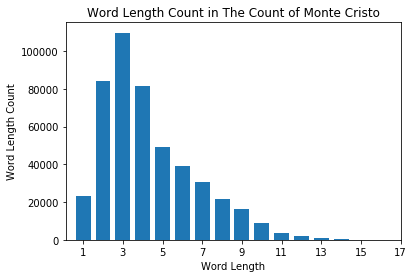

In [23]:
# Sort word length dictionary by length of word
wl_sorted = sorted(word_len_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*wl_sorted)

# Plot the histogram for problem 1'
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.125, len(X_vals)))
plt.xticks(range(1,len(X_vals)+1,2))
plt.xlabel('Word Length')
plt.ylabel('Word Length Count')
plt.title('Word Length Count in The Count of Monte Cristo')
plt.show()

**References:**
- [1: pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [2: zip](https://docs.python.org/3/library/functions.html#zip)
- [3: pyplot.bar](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)

In the cell below, write the code for the visualization of results from problem 2.

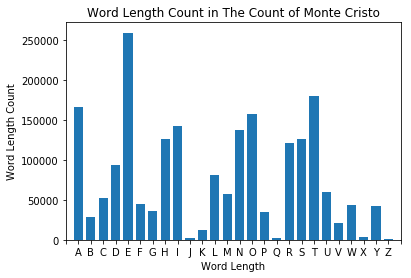

In [24]:
# Sort word length dictionary by length of word
char_count_dict_sorted = sorted(char_count_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*char_count_dict_sorted)


# Plot the histogram for problem 1'
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.5, len(X_vals)))
plt.xticks(range(-1,len(X_vals)+1))
plt.xlabel('Word Length')
plt.ylabel('Word Length Count')
plt.title('Word Length Count in The Count of Monte Cristo')
plt.show()

In the cell below, write the code for the visualization of results from problem 3.

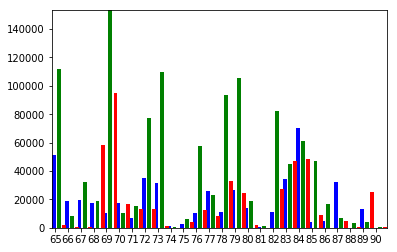

In [25]:
# Sort word length dictionary by length of word
char_pos_dict_sorted = sorted(char_pos_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*char_pos_dict_sorted)
x_1 = [ord(x)-.1 for x in X_vals]
x_2 = [ord(x)+.3 for x in X_vals]
x_3 = [ord(x)+.7 for x in X_vals]

y_1 = [i[0] for i in Y_vals]
y_2 = [i[1] for i in Y_vals]
y_3 = [i[2] for i in Y_vals]

ax = plt.subplot(111)
ax.bar(x_1 , y_1,width=0.3,color='b',align='center')
ax.bar(x_2, y_2,width=0.3,color='g',align='center')
ax.bar(x_3, y_3,width=0.3,color='r',align='center')
plt.xticks(range(-1,len(X_vals)*9+1))
plt.xlim((.5, len(X_vals)))


ax.autoscale(tight=True)
plt.show()




### Things to Consider:
You are reading and analyzing the text in a single, sequential pass. Can you consider a better (faster) way to perform the same tasks?

### Assignment Questions:
**Answer the following questions, in a couple sentences each, in the cell provided below**
* List the key tasks you accomplished during this assignment?
* Describe the challenges you faced in addressing these tasks and how you overcame these challenges?
* Did you work with other students on this assignment? If yes, how did you help them? How did they help you? Be as specific as possible.

*Your answers here*

In [ ]:
For this assignment I performed several text analysis methodologies. For problem 1, I counted the frequency of each words and built
an array associated with their length. This gave me an idea about what length of words are more common
For problem 2, the same analysis has been done for characters instead of words
For problem 3, I analyzed the characted frequency based on the position of the character within the word
Problem 4 is the visualization part of the above tasks


In [ ]:
Plotting the graph for problem 3 was challenging as each X value has 3 Y values. I discussed with my friend

In [ ]:
yes. I helped my friend undersand how to access value in dictionary when it is an array